In [1]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, 'functions')
sys.path.insert(0, 'training')

In [2]:
#from Clusterer import *
from plotting import *
from data_functions import *
import pandas as pd
import numpy as np
import compress_pickle as pickle  

time_TH=150
MIP=0.0006 ## GeV
MIP_TH=0.5 * MIP

/home/bishnu/miniconda3/envs/use_tensorflow/lib/python3.10/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):
2023-05-15 14:23:55.931447: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 14:23:56.517948: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bishnu/Library/root/lib:/usr/local/lib:/usr/local/lib:/usr/local/cuda-11.8/lib64
2023-05-15 14:23:56.51799

### This notebook should remain unchanged, with the exception of editing the values in the cell directly below

## Make a dictionary 
## for given input_dim, latent_size, num_layers, learning_rate get the result

In [3]:
generate=True
def generate_dict(generate=False):
    if generate==False:
        print("NO any dictionary is modified: Meaning May be no any new Files added")
        return
    else:
        input_dims=    ['1D', '2D', '3D', '4D', '4D','4D', '2D', '4D', '4D','1D', '2D', '3D']+['4D']*6
        num_layers=    [4] *7 + [8]*1 + [4]*10
        learning_rates=['e3']*8 + ['e4']*1 + ['e3']*6 +['e2']*1 +['e3']*2
        folders_used=  [3] *9 + [2]*4 + [3]*1 + [2]*1 + [3]*3
        latent_sizes=  [64]*4 + [128, 256, 128] +[64]*11
        data_types=    ['continuous'] * 18
        particles=['pp']*9 + ['ele']*4 + ['pp_cut'] + ['ele_cut'] + ['pp'] +['pp_cut_hcali'] +['pp_cut_mse']
        
        labels = ['Block_20230409_0958_concatTrue', 'Block_20230409_2350_concatTrue', 'Block_20230408_1624_concatTrue',\
                  'Block_20230407_1817_concatTrue', 'Block_20230413_0004_concatTrue','Block_20230413_0857_concatTrue',  \
                'Block_20230412_1428_concatTrue', 'Block_20230413_1524_concatTrue', 'Block_20230413_1922_concatTrue',\
                'Block_20230414_0818_concatTrue','Block_20230414_0029_concatTrue', 'Block_20230414_0449_concatTrue',\
                'Block_20230413_2137_concatTrue','Block_20230419_1554_concatTrue', 'Block_20230420_1307_concatTrue',
                'Block_20230420_2300_concatTrue', 'Block_20230424_1735_concatTrue','Block_20230503_1741_concatTrue']

        #### GENERATE THE DICTIONARY IF NEEDED 

        # Generate the dictionary of file names\
        file_name_dict = generate_file_name_dict(input_dims, latent_sizes,num_layers, learning_rates, folders_used, \
                                                 data_types, labels, particles)

generate_dict(generate)                                            

## Load a file from stored json file

In [3]:
with open('file_name_dict.json', 'r') as f:
    loaded_dict = json.load(f)
    #print(loaded_dict)

In [5]:
#path=loaded_dict['4D_64_4_e3_3_continuous_pp_cut_ecal']
#print(path)

## Hyper parameters tunning with 4D inputs (pion +)
1) Loss curve with different num of layers [4 vs 8]
* Latent size = 64, 4D, and learning rate =$10^{-3}$ (kept constant)

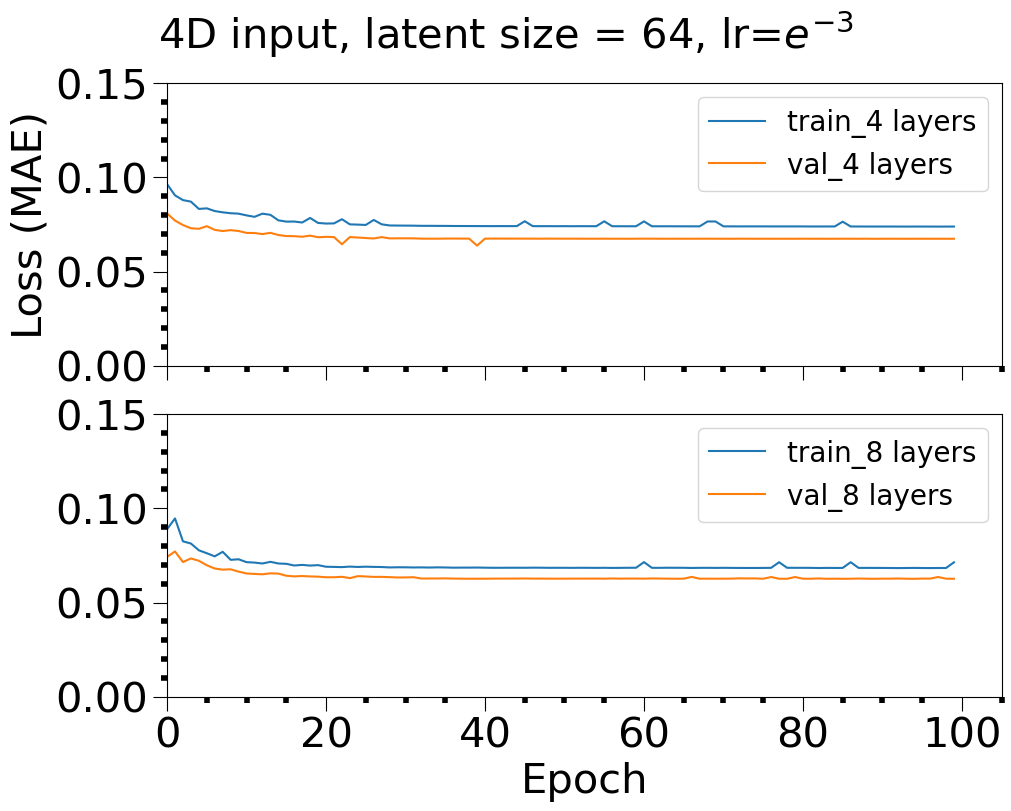

In [6]:
num_repetation=2
data_types=['continuous']*num_repetation
latent_sizes=[64]*num_repetation
learning_rates=['e3']*num_repetation
folders_used=[3]*num_repetation
num_layers=[4, 8]
input_dims=['4D']*num_repetation
particles=['pp']*num_repetation

result_paths=[]
prediction_paths=[]

for dim, size, layer, lr, folder, data_type, part in zip(input_dims, latent_sizes, num_layers, learning_rates, folders_used, data_types, particles):
        key = f"{dim}_{size}_{layer}_{lr}_{folder}_{data_type}_{part}"
        if key in loaded_dict:
            #print(loaded_dict[key_to_access])  # Output: <value corresponding to the key>
            path=loaded_dict[key]
            result_paths.append(path)
        else: 
            print('No any files found')

#print(result_paths)            
#Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],'./',loss_string="MAE") #label loss yourself here
title="4D input, latent size = 64, lr=$e^{-3}$"
legend_name=['4 layers', '8 layers']
xlim=[0, 105]
ylim=[0., 0.15]    
compare_loss_plots(result_paths, legend_name, title, 'pi+', xlim, ylim) 

2)  Different latent sizes (64, 128, 256) for pions (+)
* Input dim =4D , num layer=64, learning rate =$10^{-3}$ kept constant

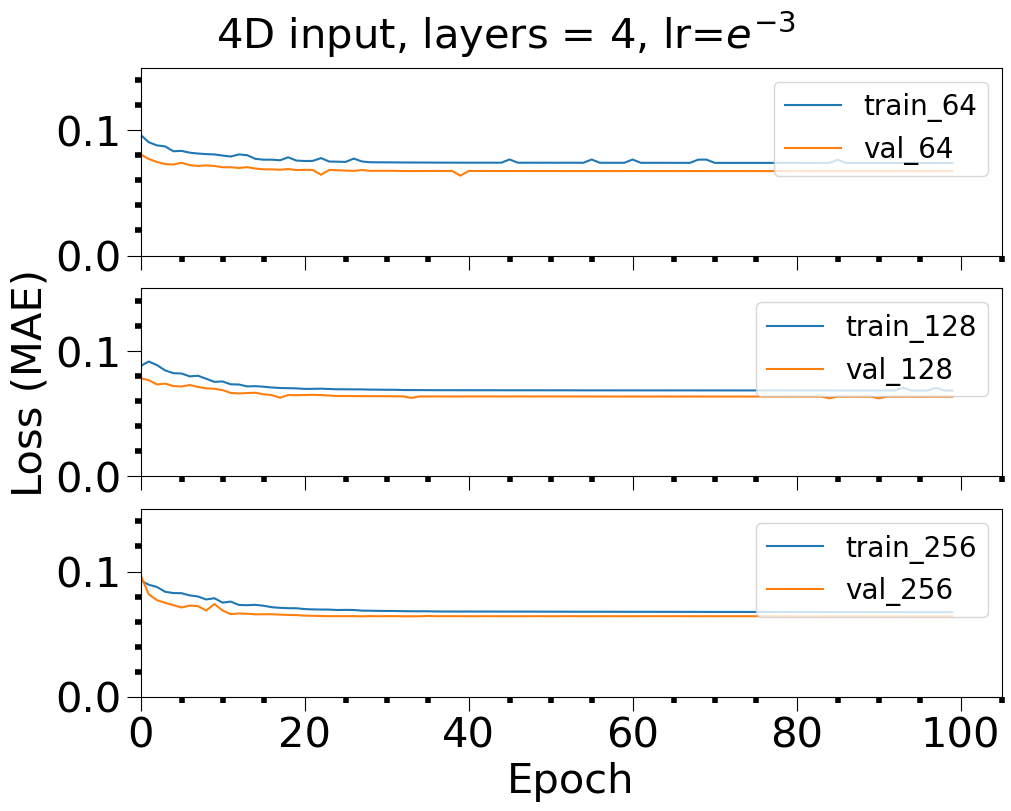

In [7]:
num_repetation=3
data_types=['continuous']*num_repetation
latent_sizes=[64, 128, 256]
learning_rates=['e3']*num_repetation
folders_used=[3]*num_repetation
num_layers=[4]*num_repetation
input_dims=['4D']*num_repetation
particles=['pp']*num_repetation
result_paths=[]
prediction_paths=[]

for dim, size, layer, lr, folder, data_type, parr in zip(input_dims, latent_sizes, num_layers, learning_rates, folders_used, data_types, particles):
        key = f"{dim}_{size}_{layer}_{lr}_{folder}_{data_type}_{part}"
        if key in loaded_dict:
            #print(loaded_dict[key_to_access])  # Output: <value corresponding to the key>
            path=loaded_dict[key]
            result_paths.append(path)

#Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],'./',loss_string="MAE") #label loss yourself here
title="4D input, layers = 4, lr=$e^{-3}$"
legend_name=['64', '128', '256']
xlim=[0, 105]
ylim=[0., 0.15]    
compare_loss_plots(result_paths, legend_name, title, 'pi+', xlim, ylim) 


3) Different num_layers for input '2D' input pion (+)
* Keeping, latent size=64, learning rate =$10^{-3}$ kept constant

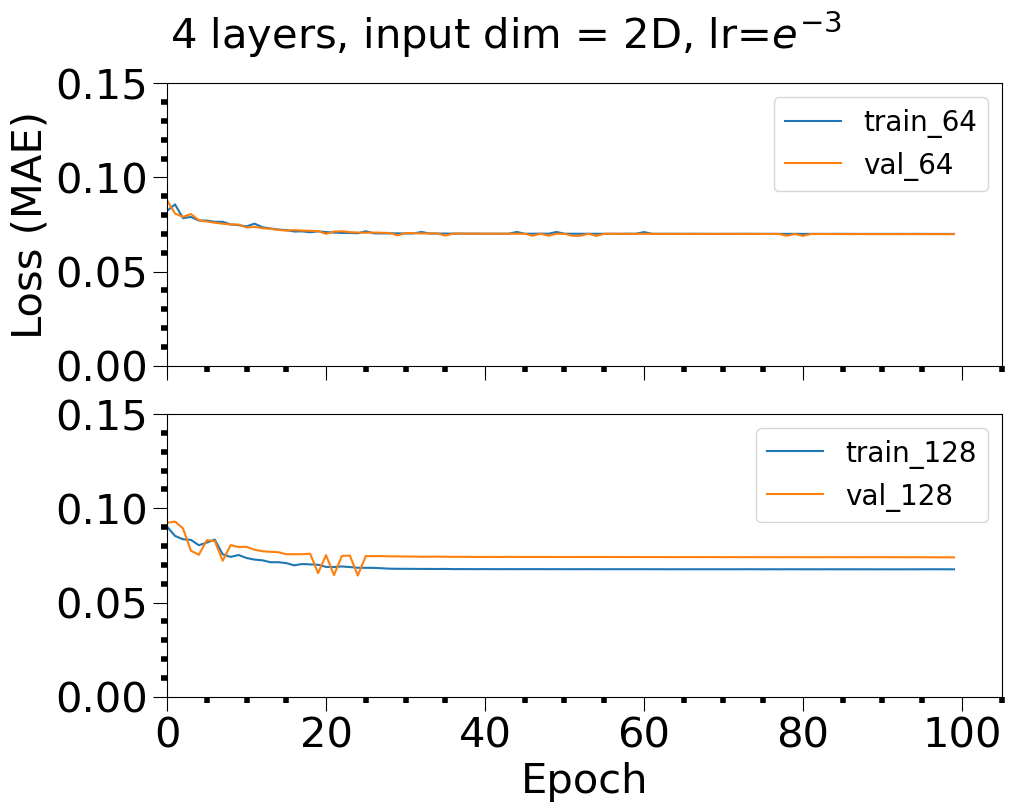

In [8]:
num_repetation=2
data_types=['continuous']*num_repetation
latent_sizes=[64, 128]
learning_rates=['e3']*num_repetation
folders_used=[3]*num_repetation
num_layers=[4]*num_repetation
input_dims=['2D']*num_repetation
particles=['pp']*num_repetation

result_paths=[]
prediction_paths=[]

for dim, size, layer, lr, folder, data_type, part in zip(input_dims, latent_sizes, num_layers, learning_rates, folders_used, data_types, particles):
        key = f"{dim}_{size}_{layer}_{lr}_{folder}_{data_type}_{part}"
        if key in loaded_dict:
            #print(loaded_dict[key_to_access])  # Output: <value corresponding to the key>
            path=loaded_dict[key]
            result_paths.append(path)



xlim=[0, 105]
ylim=[0., 0.15]    
title="4 layers, input dim = 2D, lr=$e^{-3}$"
input_size=['64', '128']
compare_loss_plots(result_paths, input_size, title, 'pi+', xlim, ylim) 

4)  Dependence on Learning rate
* Input dim =4D , latent size=64, learning rate =$10^{-3}$ kept constant

4D_64_4_e2_3_continuous_pp
4D_64_4_e3_3_continuous_pp
4D_64_4_e4_3_continuous_pp


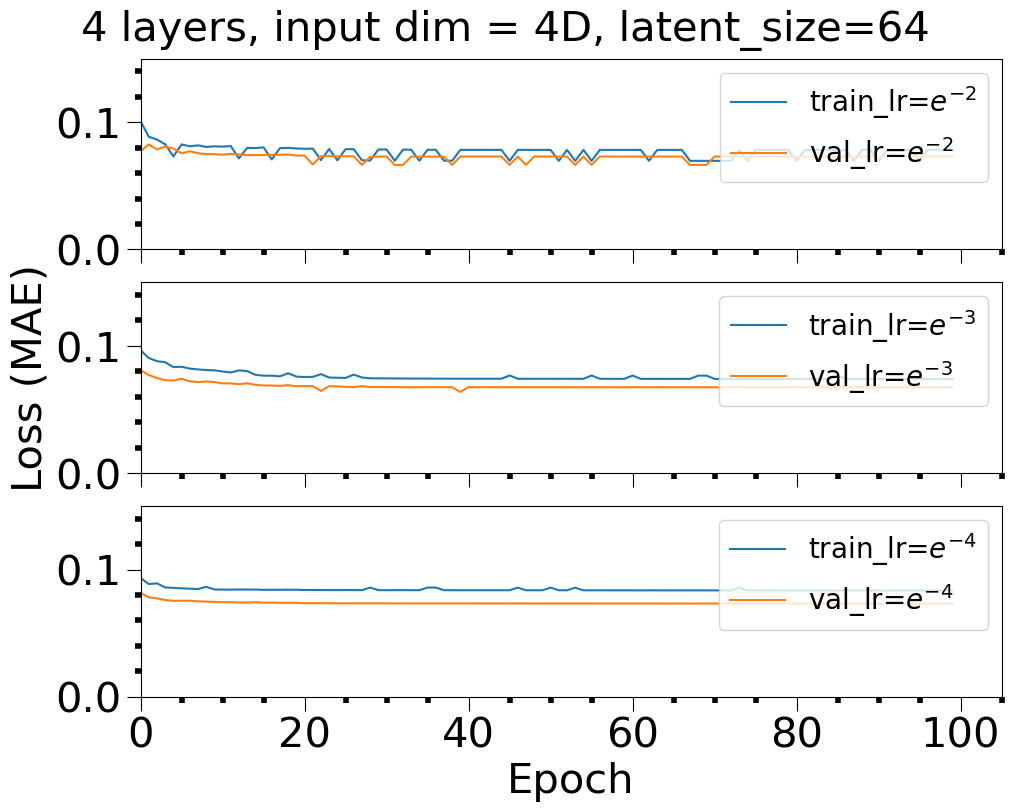

In [9]:
num_repetation=3
data_types=['continuous']*num_repetation
latent_sizes=[64]*num_repetation
learning_rates=['e2','e3', 'e4']
folders_used=[3]*num_repetation
num_layers=[4]*num_repetation
input_dims=['4D']*num_repetation
particles=['pp']*num_repetation

result_paths=[]
prediction_paths=[]

for dim, size, layer, lr, folder, data_type, part in zip(input_dims, latent_sizes, num_layers, learning_rates, folders_used, data_types, particles):
        key = f"{dim}_{size}_{layer}_{lr}_{folder}_{data_type}_{part}"
        print(key)
        if key in loaded_dict:
            #print(loaded_dict[key_to_access])  # Output: <value corresponding to the key>
            path=loaded_dict[key]
            result_paths.append(path)
            #print(key)
            #print(path)
            

#print(result_paths)
xlim=[0, 105]
ylim=[0., 0.15]    
title="4 layers, input dim = 4D, latent_size=64"
input_size=['lr=$e^{-2}$', 'lr=$e^{-3}$', 'lr=$e^{-4}$']  #
compare_loss_plots(result_paths, input_size, title, 'pi+', xlim, ylim) 

5) Different input dimension
* latent size=64 , num layer=64, learning rate =$10^{-3}$ kept constant


0 0
0 1
1 0
1 1


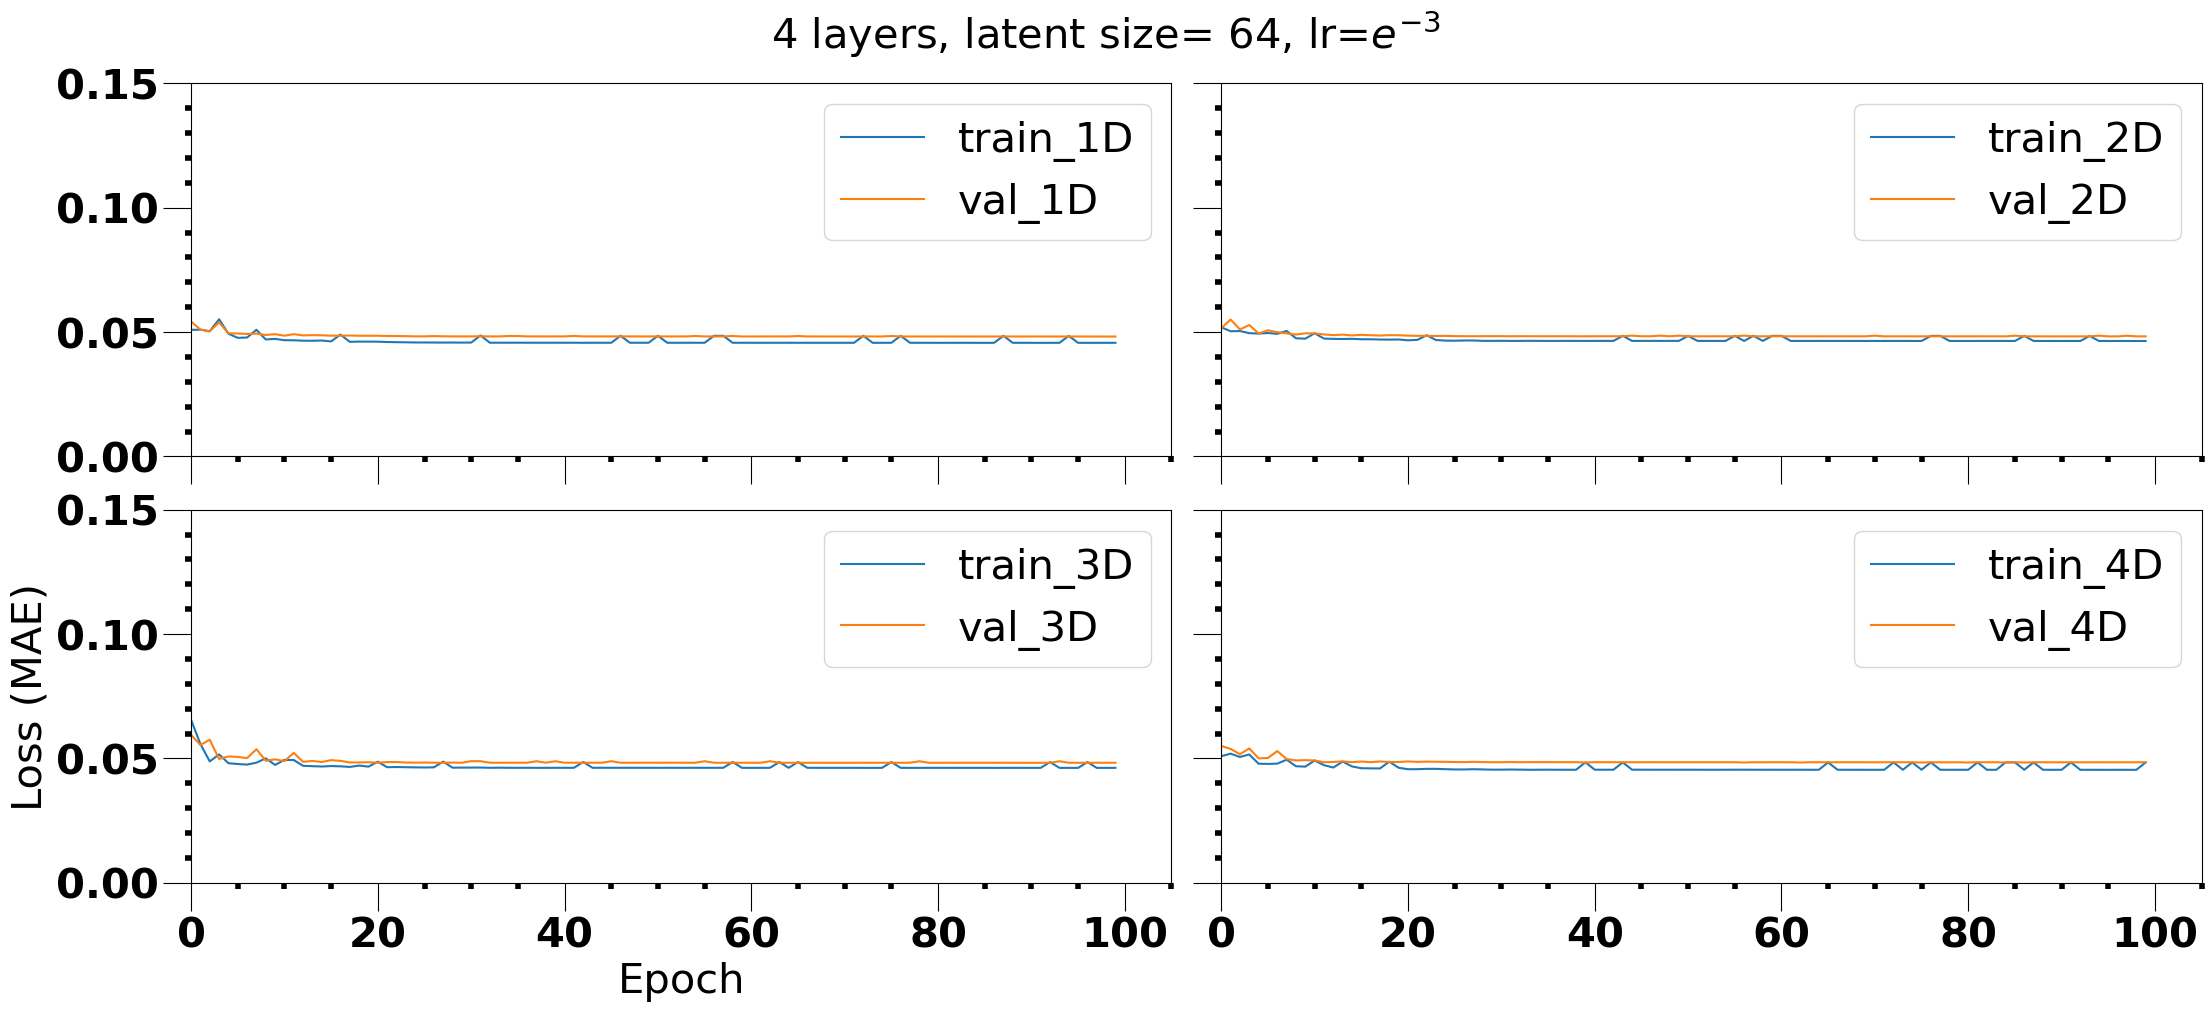

In [33]:
num_repetation=4
data_types=['continuous']*num_repetation
latent_sizes=[64]*num_repetation
learning_rates=['e3']*num_repetation
folders_used=[2]*num_repetation
num_layers=[4]*num_repetation
input_dims=['1D','2D','3D','4D']
particles=['ele']*num_repetation   ## Replace 'pp' if it is pion(+) and 'ele' for electron

result_paths=[]
prediction_paths=[]

for dim, size, layer, lr, folder, data_type, part in zip(input_dims, latent_sizes, num_layers, learning_rates, folders_used, data_types, particles):
        key = f"{dim}_{size}_{layer}_{lr}_{folder}_{data_type}_{part}"
        #print(key)
        if key in loaded_dict:
            #print(loaded_dict[key_to_access])  # Output: <value corresponding to the key>
            path=loaded_dict[key]
            result_paths.append(path)
            
        else:
            print('Sorry could not find any files')

#print(result_paths)
xlim=[0, 105]
ylim=[0., 0.15]    
title="4 layers, latent size= 64, lr=$e^{-3}$"
compare_loss_plots(result_paths, input_dims, title, 'pi+', xlim, ylim) 


## Now pick one specification and get energy response


## Get Resolution and energy scale (Fernando's Function)

In [7]:
input_dim='4D'          ## Input features
latent_size=64          ## hyperparameter 
learning_rate='e3'      ## Learning rate 
folder_used=3        ## number of folder used each folder is 100 Files
num_layer=4       ## hyper parameter num layers
data_type='continuous'
particle='pp_cut' # or 'ele'  or pp  or pp_cut, or ele_cut, pp_cut_hcali, pp_cut_mse

if particle=='ele' or particle=='ele_cut':
    folder_used=2


# Accessing values in the dictionary
key_to_access = f'{input_dim}_{latent_size}_{num_layer}_{learning_rate}_{folder_used}_{data_type}_{particle}'  # Example key to access
print(key_to_access)

if key_to_access in loaded_dict:
    #print(loaded_dict[key_to_access])  # Output: <value corresponding to the key>
    path=loaded_dict[key_to_access]
    print(path)
else:
    print('Key does not exist in the dictionary')
    


4D_64_4_e3_3_continuous_pp_cut
/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/DeepSets_output/results_4D_continuous_3Fol_64_e3_4Lay_pp_cut/Block_20230419_1554_concatTrue


# Loss Curves for Give directory

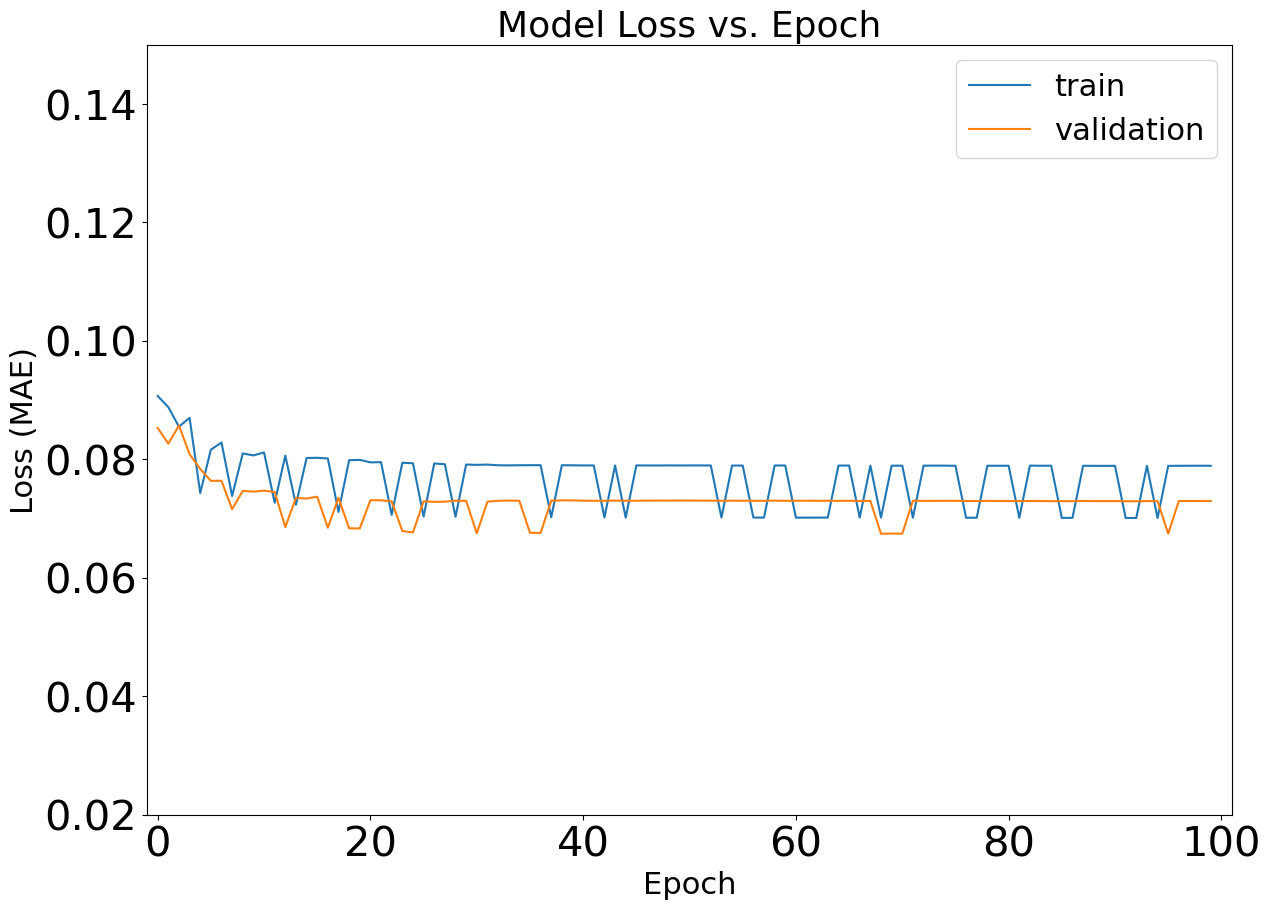

In [64]:
npz_unpacked_loss = np.load(path+"/losses.npz")
loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']
Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],path,loss_string="MAE") #label loss yourself here


## Get Predicted vs truth and leter used for prediction distribuion

In [8]:
take_log10 = False
path_to_result_dir='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/DeepSets_output'
npz_unpacked = np.load(path+"/test_predictions.npz")

predictions = npz_unpacked['outputs']
targets = npz_unpacked['targets']

#means = pickle.load(f"preprocessed_data/means.p")

means = pickle.load(open(f"{path_to_result_dir}/preprocessed_data_{particle}_{data_type}/test/means.p", 'rb'), compression='gzip')
stdvs = pickle.load(open(f"{path_to_result_dir}/preprocessed_data_{particle}_{data_type}/test/stdvs.p", 'rb'), compression='gzip')



means.keys()
#Undo log: Exponentiate
#Averages and STdevs taken AFTER log10 taken. So undo scalar, then exp.
#scalar = (x-mean)/stdev
#undo_scalar = x'*stdev + mean

predictions = predictions*stdvs['genP'] + means['genP']
targets = targets*stdvs['genP'] + means['genP']

predictions = 10**predictions
targets = 10**targets


ClusterSum = predictions
GenP = targets


In [9]:
means.keys()

dict_keys(['.energy', '.position.z', '.position.x', '.position.y', 'clusterE', 'genP'])

In [9]:
#path='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/DeepSets_output/results/Block_20230504_2255_concatTrue'
#Block_20230504_2032_concatTrue'
#npz_unpacked = np.load(path+"/test_predictions.npz")
#means = pickle.load(open(f"{path_to_result_dir}/preprocessed_data/test/means.p", 'rb'), compression='gzip')

#stdvs = pickle.load(open(f"{path_to_result_dir}/preprocessed_data/test/stdvs.p", 'rb'), compression='gzip')

#print(path)
#predictions.keys()
#means['genP']
#means['theta']
#np.shape(npz_unpacked)

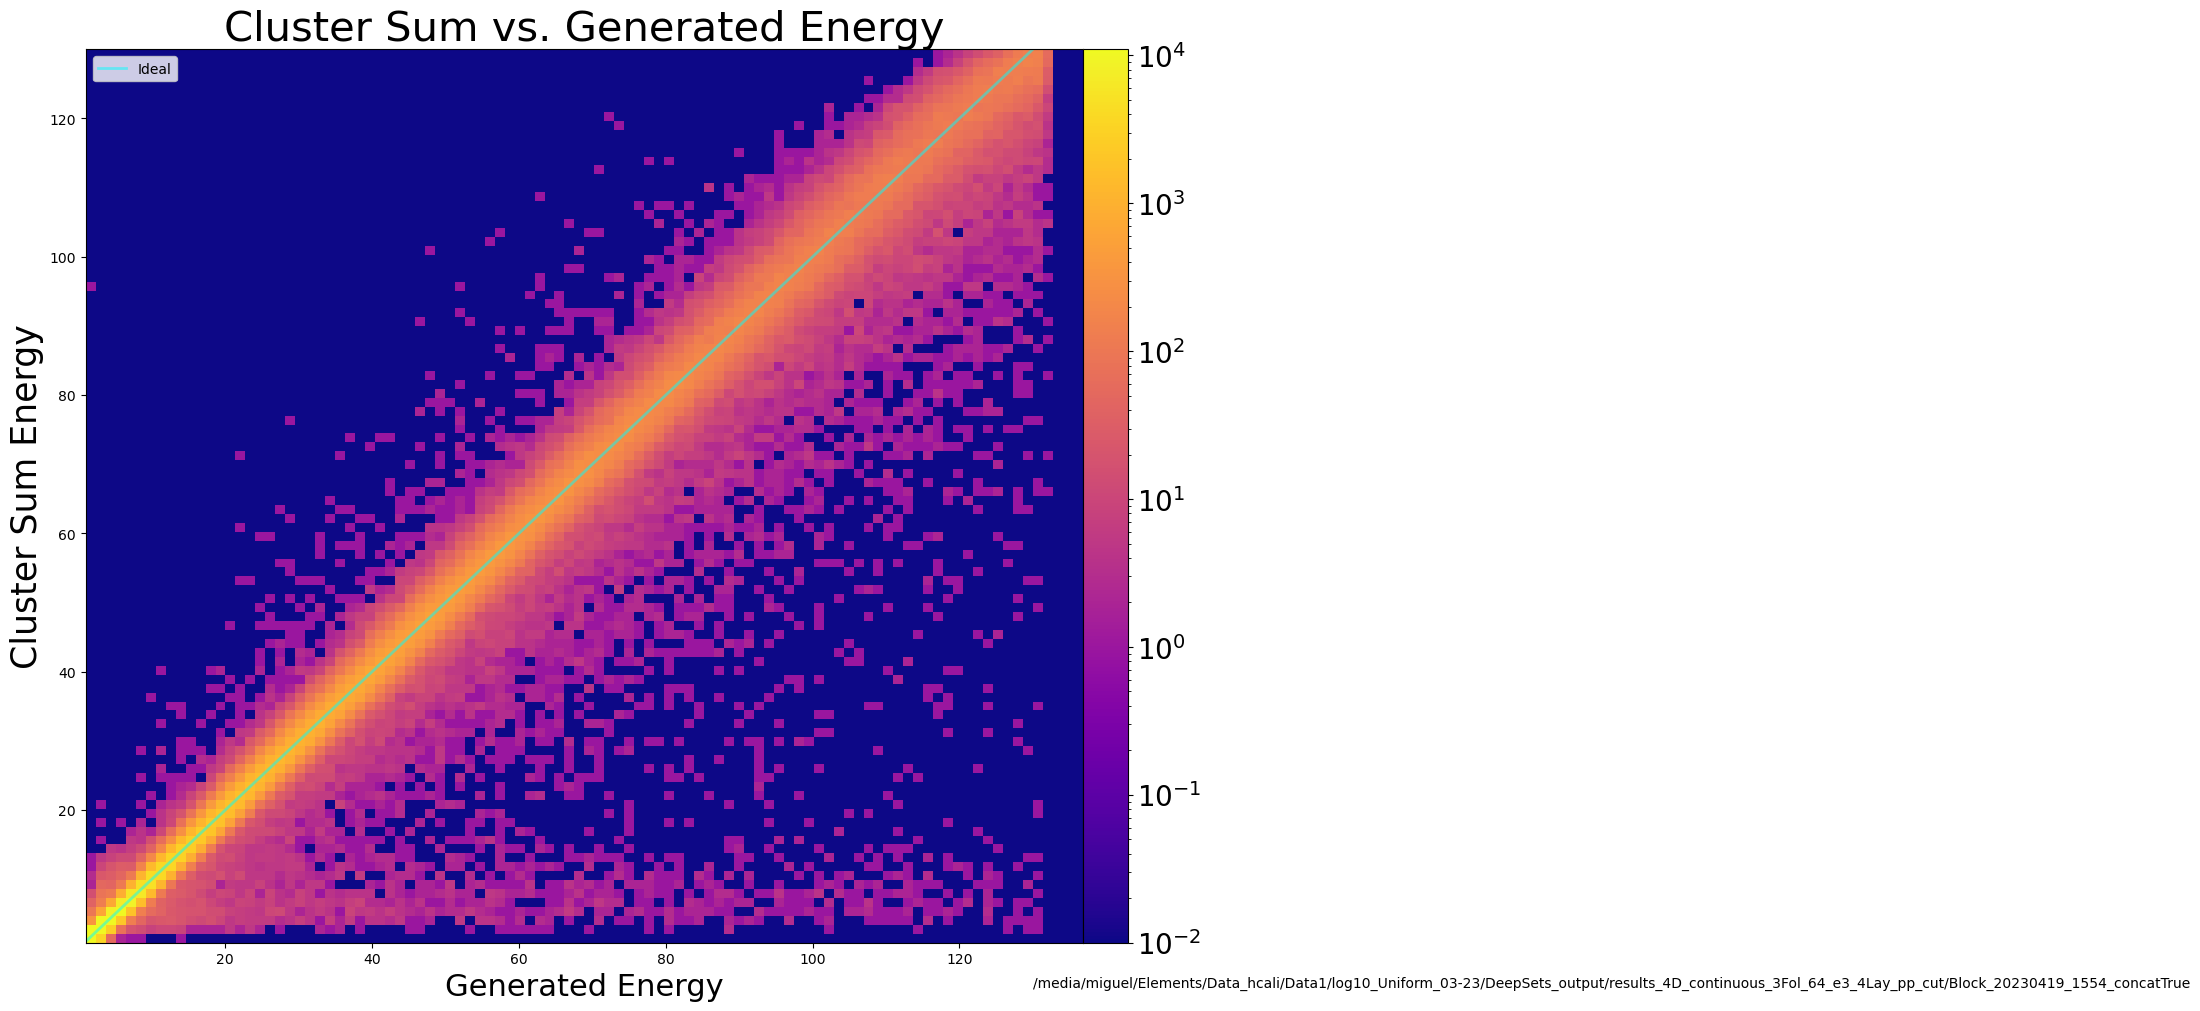

In [6]:
ClusterSum_vs_GenP(ClusterSum, GenP, path, take_log10)

## Get resoltuions and energy scale 

In [9]:
detector='hcal' ## hcal 0r hcal_insert
particle='pp'   ## or ele ## pp
#detector='hcal_insert'
nbins=30
approach='DeepSets'
#particle='ele' ## ele or pi+
output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets/'
NEvents_Max = 1_000_000 #OK if tree has less events than this




if particle=='pp':
    Energy_Bins = binning=np.linspace(0.,110,21) #Plotting
elif particle=='ele':
    Energy_Bins = binning=np.linspace(0.1,92,21) #Plotting

Do_Processing = False
Do_Training = True

#NN = get_res_scale(y_test,preds,Energy_Bins,label)
NN = get_res_scale(targets,predictions,Energy_Bins,path)

print(NN.keys())
strawman=None
#print(NN_in_RecoBins.keys())

dict_keys(['avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])


## Fernando's Function

In [10]:
name_tag='ds21_'
particle_detector=f'{particle}_{detector}_{data_type}_{input_dim}_L{num_layer}_lr{learning_rate}_size{latent_size}'
print_parameter(NN['avg_truth'], name_tag +'energy',particle_detector ) 
#print_parameter(resolution_scale_c21rr_fit, name_tag+'res_cor',particle_detector  )
#print_parameter(pred_over_truth_fit, name_tag +'scale_fit', particle_detector ) 
#print_parameter(resolution_fit, name_tag +'res_sigma', particle_detector ) 
print_parameter(NN['resolution'], name_tag +'res_std_median', particle_detector ) 
#print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
print_parameter(NN['median_scale'], name_tag +'scale_median', particle_detector )

'''
import pandas as pd
df = pd.DataFrame(NN['slices'])
df.to_csv(f'{output_path}/pred_{approach}_{particle_detector}.csv', index=False)  
'''

ds21_energy_pp_hcal_continuous_4D_L4_lre3_size64=np. array([  2.640165,   7.931975,  13.58751 ,  19.114299,  24.651099,
        30.189892,  35.684808,  41.164185,  46.721192,  52.20732 ,
        57.673028,  63.219116,  68.7281  ,  74.239022,  79.714102,
        85.212686,  90.740259,  96.215105, 101.695975, 107.246526,
       120.565754])
ds21_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64=np. array([0.532826, 0.238988, 0.164244, 0.138797, 0.128164, 0.117842,
       0.11511 , 0.111102, 0.105452, 0.109597, 0.111019, 0.102607,
       0.113878, 0.102308, 0.103197, 0.102069, 0.108193, 0.101473,
       0.103741, 0.10443 , 0.109343])
ds21_scale_median_pp_hcal_continuous_4D_L4_lre3_size64=np. array([1.016315, 0.992283, 0.993941, 0.994706, 0.995441, 0.996431,
       0.99703 , 0.998069, 0.999545, 0.99843 , 0.998826, 0.998878,
       0.998727, 0.99876 , 0.999834, 0.997567, 0.998579, 0.999355,
       1.000358, 1.000196, 0.99048 ])


"\nimport pandas as pd\ndf = pd.DataFrame(NN['slices'])\ndf.to_csv(f'{output_path}/pred_{approach}_{particle_detector}.csv', index=False)  \n"

In [8]:
ds64_energy_pp_hcal_continuous_4D_L4_lre3_size64=np. array([  2.668006,   8.024478,  13.672788,  19.195463,  24.728182,
        30.263314,  35.758153,  41.230024,  46.777886,  52.253195,
        57.714365,  63.260005,  68.765503,  74.275714,  79.74317 ,
        85.233774,  90.755624,  96.225052, 101.701513, 107.247721,
       120.565754])
ds64_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64=np. array([0.536502, 0.236861, 0.163597, 0.138664, 0.128031, 0.117476,
       0.114976, 0.111434, 0.105139, 0.10949 , 0.111148, 0.10276 ,
       0.113856, 0.102494, 0.103037, 0.101974, 0.108171, 0.101524,
       0.103789, 0.10445 , 0.109343])
ds64_scale_median_pp_hcal_continuous_4D_L4_lre3_size64=np. array([1.016109, 0.992165, 0.994132, 0.994522, 0.995572, 0.996426,
       0.997084, 0.998061, 0.999545, 0.998477, 0.998867, 0.998888,
       0.998667, 0.998724, 0.999875, 0.9975  , 0.998719, 0.999382,
       1.000348, 1.000196, 0.99048 ])


ds81_energy_pp_hcal_continuous_4D_L4_lre3_size64=np. array([  1.221575,   2.08343 ,   3.490777,   4.875225,   6.254106,
         7.630048,   9.00946 ,  10.383274,  11.764221,  13.13547 ,
        14.507223,  15.889156,  17.271158,  18.636935,  20.014266,
        21.390162,  22.767624,  24.138181,  25.513626,  26.889009,
        28.266228,  29.624266,  31.012114,  32.383622,  33.748799,
        35.134207,  36.493794,  37.881586,  39.240661,  40.619591,
        41.985916,  43.361598,  44.740238,  46.12927 ,  47.487821,
        48.853928,  50.239858,  51.618346,  52.978498,  54.370655,
        55.740361,  57.102132,  58.49675 ,  59.849576,  61.228832,
        62.602793,  63.982453,  65.359403,  66.749974,  68.096961,
        69.477804,  70.857775,  72.223005,  73.591547,  74.971865,
        76.340815,  77.68622 ,  79.088335,  80.454439,  81.846292,
        83.212301,  84.584983,  85.945287,  87.33695 ,  88.709037,
        90.078859,  91.44492 ,  92.817839,  94.216535,  95.558446,
        96.956292,  98.33353 ,  99.698144, 101.076212, 102.440267,
       103.82546 , 105.187513, 106.565184, 107.94237 , 109.312756,
       120.565754])
ds81_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64=np. array([0.190113, 0.369986, 0.249513, 0.192213, 0.157055, 0.14505 ,
       0.134776, 0.128347, 0.129221, 0.121123, 0.120006, 0.111829,
       0.114603, 0.115522, 0.109724, 0.111707, 0.110713, 0.109032,
       0.112776, 0.116034, 0.107338, 0.110778, 0.09909 , 0.10822 ,
       0.101922, 0.10599 , 0.104411, 0.115509, 0.103987, 0.101448,
       0.108359, 0.107407, 0.098491, 0.09814 , 0.106286, 0.096543,
       0.106063, 0.105038, 0.108108, 0.102086, 0.110775, 0.114253,
       0.101947, 0.103021, 0.097457, 0.106555, 0.103073, 0.09009 ,
       0.121696, 0.095919, 0.115838, 0.111604, 0.10578 , 0.102187,
       0.101251, 0.092555, 0.110228, 0.084585, 0.112222, 0.093794,
       0.096875, 0.105743, 0.105432, 0.093764, 0.122991, 0.098672,
       0.102117, 0.102364, 0.085308, 0.116319, 0.094053, 0.102636,
       0.095877, 0.109919, 0.110827, 0.092884, 0.103892, 0.101312,
       0.113853, 0.094219, 0.109343])
ds81_scale_median_pp_hcal_continuous_4D_L4_lre3_size64=np. array([1.086083, 0.989018, 0.994288, 0.993287, 0.991798, 0.991008,
       0.992078, 0.994464, 0.994953, 0.994326, 0.994403, 0.992016,
       0.992756, 0.99517 , 0.994367, 0.995667, 0.995312, 0.995648,
       0.995053, 0.995935, 0.995935, 0.996244, 0.997318, 0.99639 ,
       0.99589 , 0.999759, 0.997153, 0.995457, 0.996825, 0.999926,
       0.997555, 0.997994, 0.999755, 0.998969, 0.999901, 0.99975 ,
       0.997038, 0.997748, 0.998916, 0.999871, 0.998478, 0.998007,
       0.997642, 1.001067, 0.997722, 0.999247, 0.998906, 0.999261,
       0.997566, 1.001308, 0.997588, 0.998876, 0.999347, 0.997098,
       0.998646, 0.999361, 0.998449, 1.000478, 1.001758, 0.998997,
       0.997219, 0.999862, 0.995191, 0.997665, 0.998093, 0.998719,
       0.999046, 0.999125, 0.998556, 0.999504, 0.999019, 1.001056,
       1.00096 , 0.999617, 1.000399, 1.000394, 0.99876 , 1.000296,
       1.000519, 1.001343, 0.99048 ])





In [10]:
print(len(ds81_scale_median_pp_hcal_continuous_4D_L4_lre3_size64))
print(len(ds64_energy_pp_hcal_continuous_4D_L4_lre3_size64))

81
21


In [ ]:
print(len(ds64_energy_pp_hcal_continuous_4D_L4_lre3_size64))
plt.errorbar(ds64_energy_pp_hcal_continuous_4D_L4_lre3_size64, ds64_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64,
            label='21')
plt.errorbar(ds81_energy_pp_hcal_continuous_4D_L4_lre3_size64, ds81_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64,
            label='81')

plt.errorbar(ds810_energy_pp_hcal_continuous_4D_L4_lre3_size64, ds810_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64,
            label='810')
plt.ylim(0,0.6)
plt.legend()

## Bishnu function to evaluate the resolution and scale 

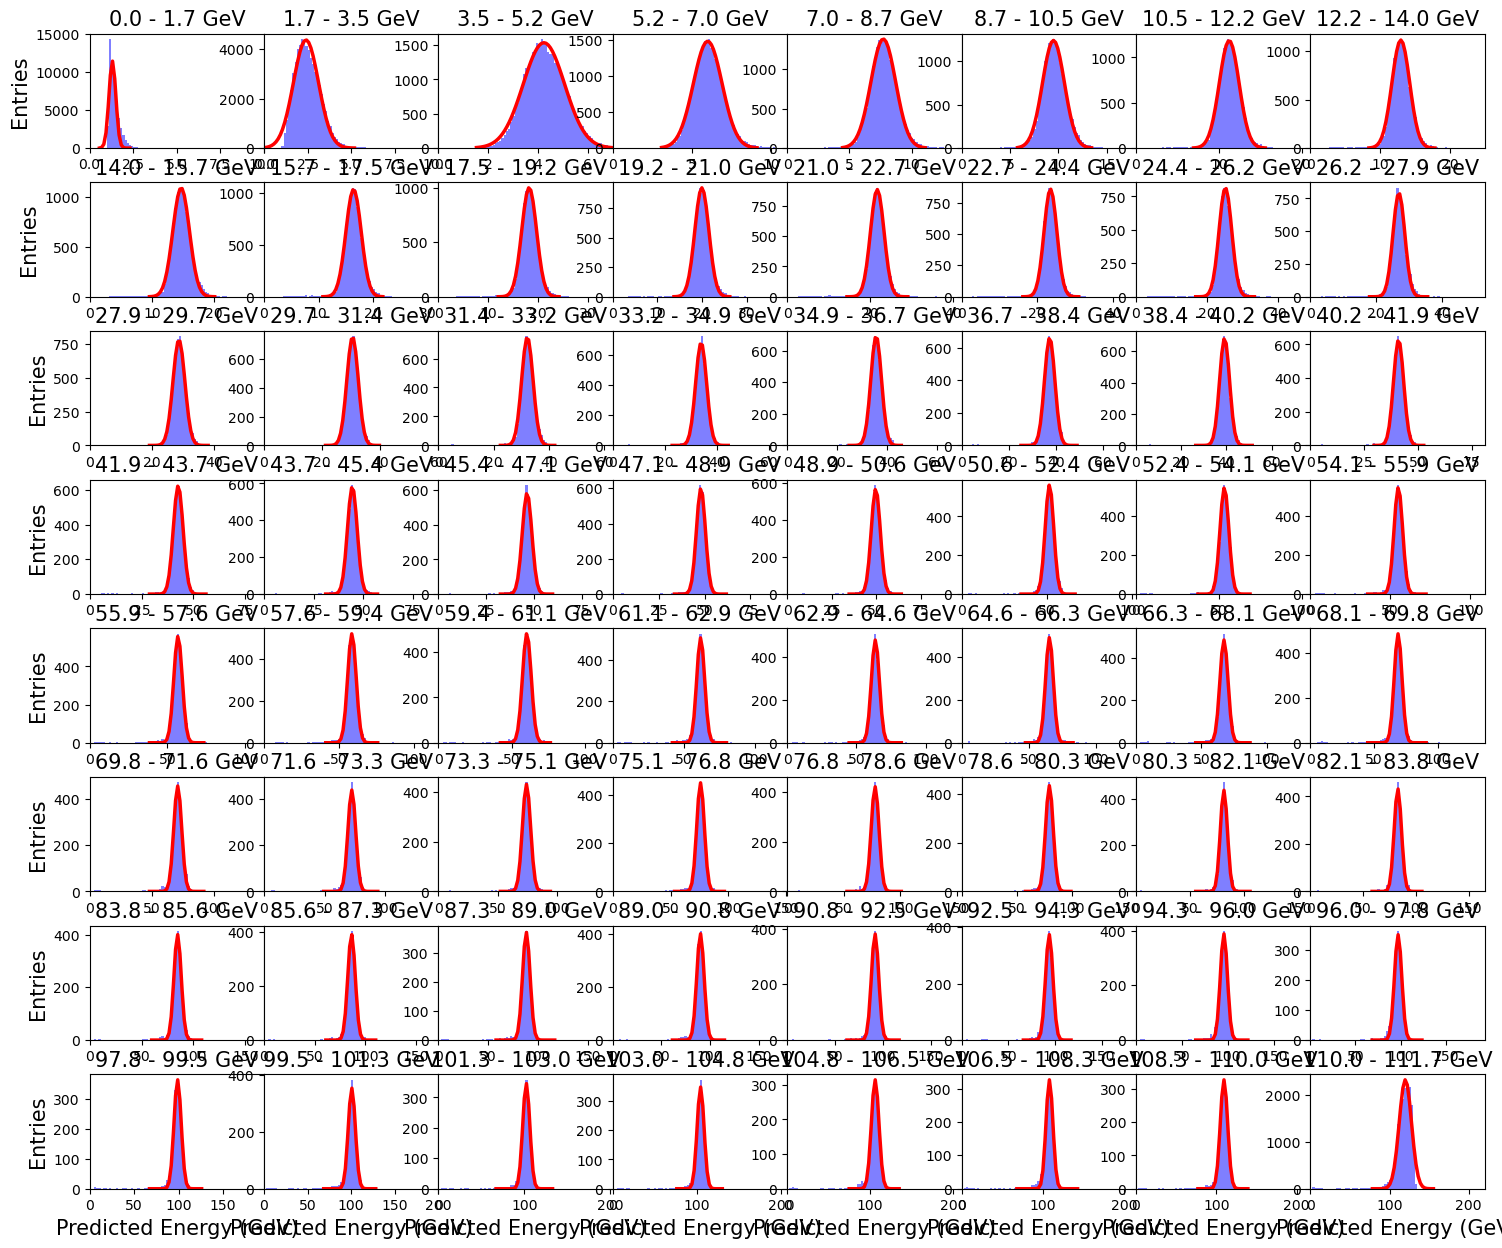

In [7]:
nbins=80
#approach='DeepSets_4D'
output_path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
#detector='hcal'
min_val=0
max_val=110
Nbins=64
binning=np.linspace(min_val, max_val, Nbins)
resolution_fit, pred_over_truth_fit, true_fit,slices_fit,resolution_scale_corr_median, median_scale_fit,\
slices_pred_truth,res_std_median, res_sigma_median =get_res_scale_fit_log10_log2(targets,predictions, binning, nbins, \
data_type, particle)



In [12]:
name_tag='ds212_'
particle_detector=f'{particle}_{detector}_{data_type}_{input_dim}_L{num_layer}_lr{learning_rate}_size{latent_size}_cut'
print_parameter(true_fit, name_tag +'energy',particle_detector ) 
print_parameter(resolution_scale_corr_median, name_tag+'res_cor',particle_detector  ) ## std over median
print_parameter(resolution_fit, name_tag +'res_fit', particle_detector ) ## sigma over mean fit 

print_parameter(res_sigma_median, name_tag +'res_sigma', particle_detector ) 
print_parameter(res_std_median, name_tag +'res_std_median', particle_detector ) 
#print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
print_parameter(median_scale_fit, name_tag +'scale_median', particle_detector )





df = pd.DataFrame(slices_fit)
df.to_csv(f'{output_path}/pred_DeepSets_{particle_detector}.csv', index=False)  
#df_straw_truth = pd.DataFrame(slices_truth)
#df.to_csv(f'{output_path}/true_{approach}_{particle_detector}.csv', index=False)

## Pred over Truth
df_straw_truth = pd.DataFrame(slices_pred_truth)
df_straw_truth.to_csv(f'{output_path}/pred_true_DeepSets_{particle_detector}.csv', index=False)

ds212_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([  2.640165,   7.931975,  13.58751 ,  19.114299,  24.651099,
        30.189892,  35.684808,  41.164185,  46.721192,  52.20732 ,
        57.673028,  63.219116,  68.7281  ,  74.239022,  79.714102,
        85.212686,  90.740259,  96.215105, 101.695975, 107.246526])
ds212_res_cor_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.524272, 0.240846, 0.165245, 0.139536, 0.128751, 0.118264,
       0.115453, 0.111317, 0.1055  , 0.109769, 0.111149, 0.102722,
       0.114023, 0.102435, 0.103214, 0.102318, 0.108347, 0.101538,
       0.103703, 0.10441 ])
ds212_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.567158, 0.258042, 0.160781, 0.121316, 0.09982 , 0.086281,
       0.077029, 0.070505, 0.064287, 0.060597, 0.056669, 0.05314 ,
       0.050936, 0.050785, 0.04737 , 0.047018, 0.046251, 0.045311,
       0.044358, 0.044318])
ds212_res_sigma_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.454589, 0.248504, 0.158924,

## Compare Fernando's vs Bishnu Function's to extract parameter

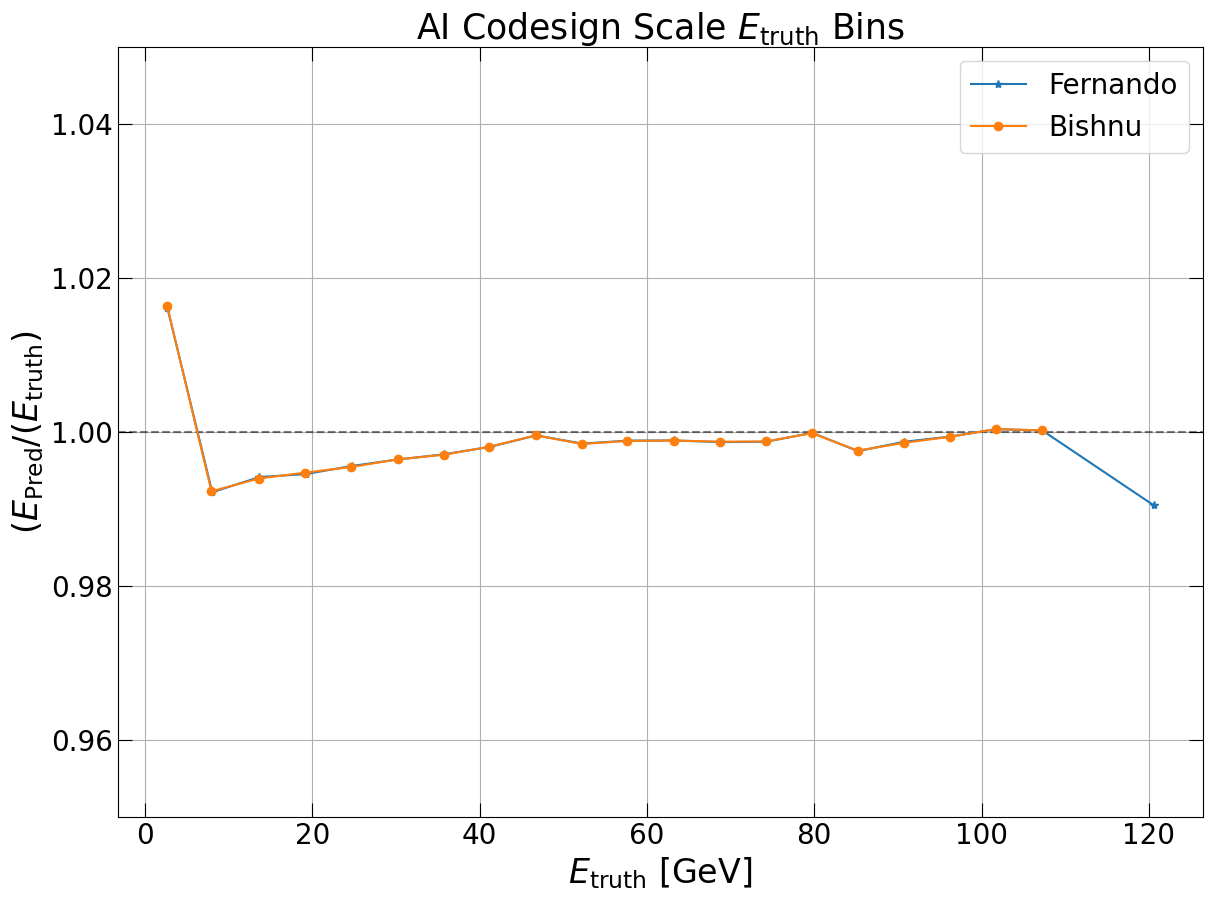

In [21]:
bin_label="truth"
ymin=0.95
ymax=1.05
fig=plt.figure(figsize=(14,10))
plt.title("AI Codesign Scale $E_\mathrm{%s}$ Bins"%(bin_label),fontsize=25)
plt.ylabel("$(E_\mathrm{Pred}/(E_\mathrm{%s})$"%(bin_label),fontsize=24)
plt.xlabel("$E_\mathrm{%s}$ [GeV]"%(bin_label) ,fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(direction='in',right=True,top=True,length=10)
plt.axhline(y=1.0, color='k', linestyle='--',alpha=0.5)#plt.ylim(-0.02,0.4)
plt.ylim(ymin,ymax)

ax = plt.subplot(1,1,1)
mask = ~np.isnan(NN["median_scale"])
first_bin = 0
last_bin = len(NN[f"avg_{bin_label}"][mask])

#NN   
plt.errorbar(NN[f"avg_{bin_label}"][mask][first_bin:last_bin],NN["median_scale"][mask][first_bin:last_bin],
             marker='*',label='Fernando')
plt.errorbar(true_fit, median_scale_fit, label='Bishnu', marker='o')
plt.legend(fontsize=20)
plt.grid(True)


In [22]:
#Plot_Resolutions(NN,strawman,path)

## Check paramters Fernando's vs mine [Resolution]

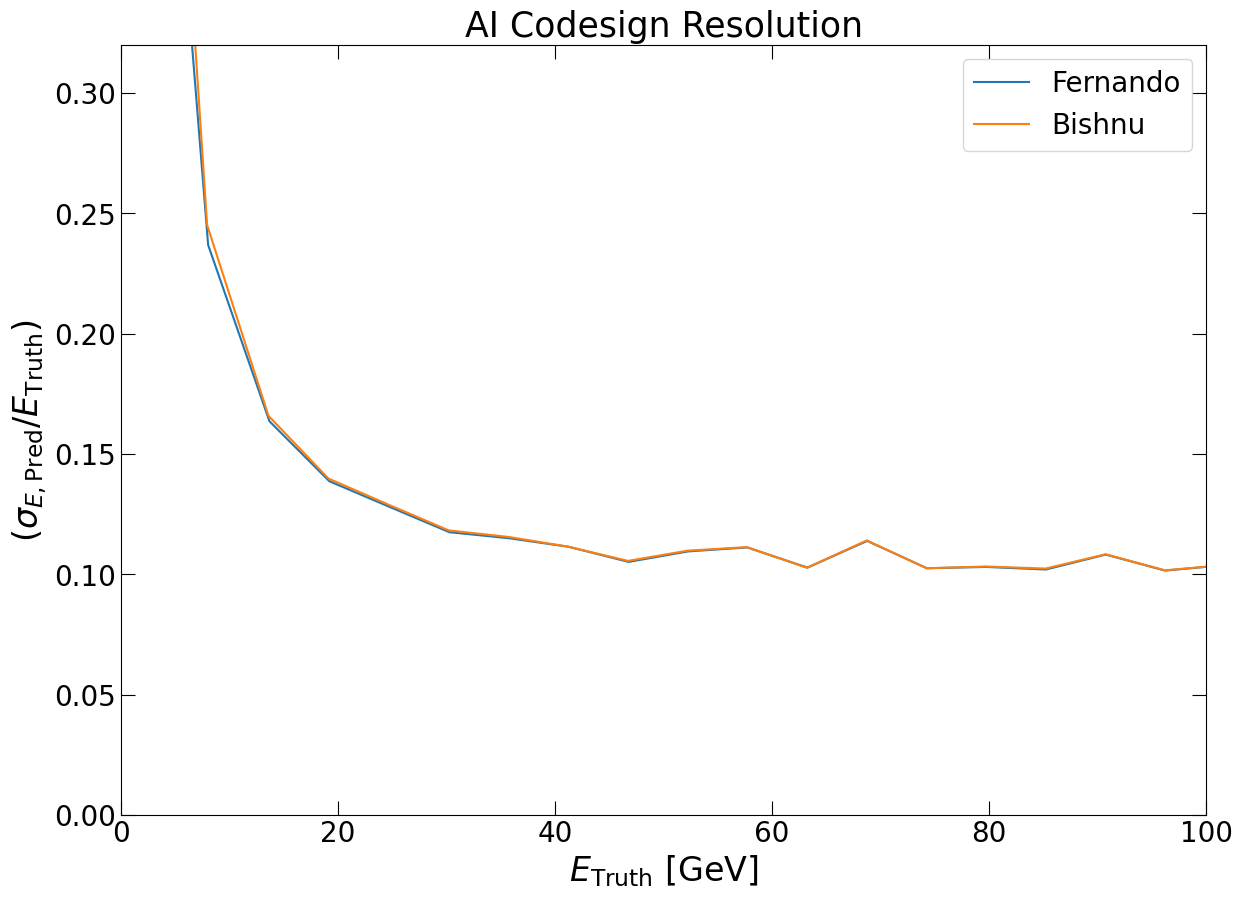

In [23]:
#def Plot_Resolutions(NN, strawman,label):
mask = ~np.isnan(NN["resolution"])
fig=plt.figure(figsize=(14,10))
plt.title("AI Codesign Resolution",fontsize=25)
plt.ylabel("$(\sigma_{E,\mathrm{Pred}}/E_\mathrm{Truth})$",fontsize=24)
plt.xlabel("$E_\mathrm{Truth}$ [GeV]",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(direction='in',right=True,top=True,length=10)
#plt.ylim(-0.02,0.4)
plt.ylim(0,2)
plt.ylim(0,.32)
plt.xlim(-1,100.01)
plt.xlim(0.0,100)
#errors = 1.0/(np.sqrt(2*counter-2))*stdev_pred
ax = plt.subplot(1,1,1)
first_bin = 0
last_bin = len(NN["avg_truth"])

#plt.text(0.8,-0.08,label,transform=ax.transAxes,fontsize=10)
plt.errorbar(NN["avg_truth"][mask][first_bin:last_bin],NN["resolution"][mask], label='Fernando')
plt.errorbar(true_fit,res_std_median, label='Bishnu')
plt.legend(fontsize=20)

## Get Strawman Parameters

Test start   0   test end   100000  total events between test start and end    100000


/home/bishnu/miniconda3/envs/use_tensorflow/lib/python3.10/site-packages/awkward0/array/base.py:622: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(where, (cls.numpy.ndarray, AwkwardArray)) and issubclass(where.dtype.type, (numpy.str, numpy.str_)):
/home/bishnu/miniconda3/envs/use_tensorflow/lib/python3.10/site-packages/awkward0/array/base.py:624: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif is

straw64_energy_pp_hcal_continuous=np. array([  2.636546,   7.926834,  13.565837,  19.103469,  24.643169,
        30.153414,  35.639454,  41.137898,  46.722078,  52.22822 ,
        57.754572,  63.202322,  68.719109,  74.202527,  79.71927 ,
        85.160898,  90.766355,  96.253882, 101.676131, 107.251339])
straw64_res_cor_pp_hcal_continuous=np. array([0.626973, 0.283728, 0.198758, 0.164205, 0.147135, 0.141474,
       0.144386, 0.131781, 0.127764, 0.124801, 0.134254, 0.130518,
       0.121809, 0.128505, 0.142004, 0.129159, 0.122175, 0.125659,
       0.130817, 0.127925])
straw64_res_sigma_pp_hcal_continuous=np. array([0.739868, 0.292566, 0.185775, 0.142368, 0.119773, 0.104635,
       0.096384, 0.082871, 0.08027 , 0.075047, 0.072658, 0.068717,
       0.06662 , 0.066936, 0.062485, 0.058287, 0.057977, 0.054717,
       0.059385, 0.054336])
straw64_res_std_median_pp_hcal_continuous=np. array([0.709899, 0.288358, 0.199789, 0.165225, 0.147512, 0.141606,
       0.144439, 0.131898, 0.128018, 0.125

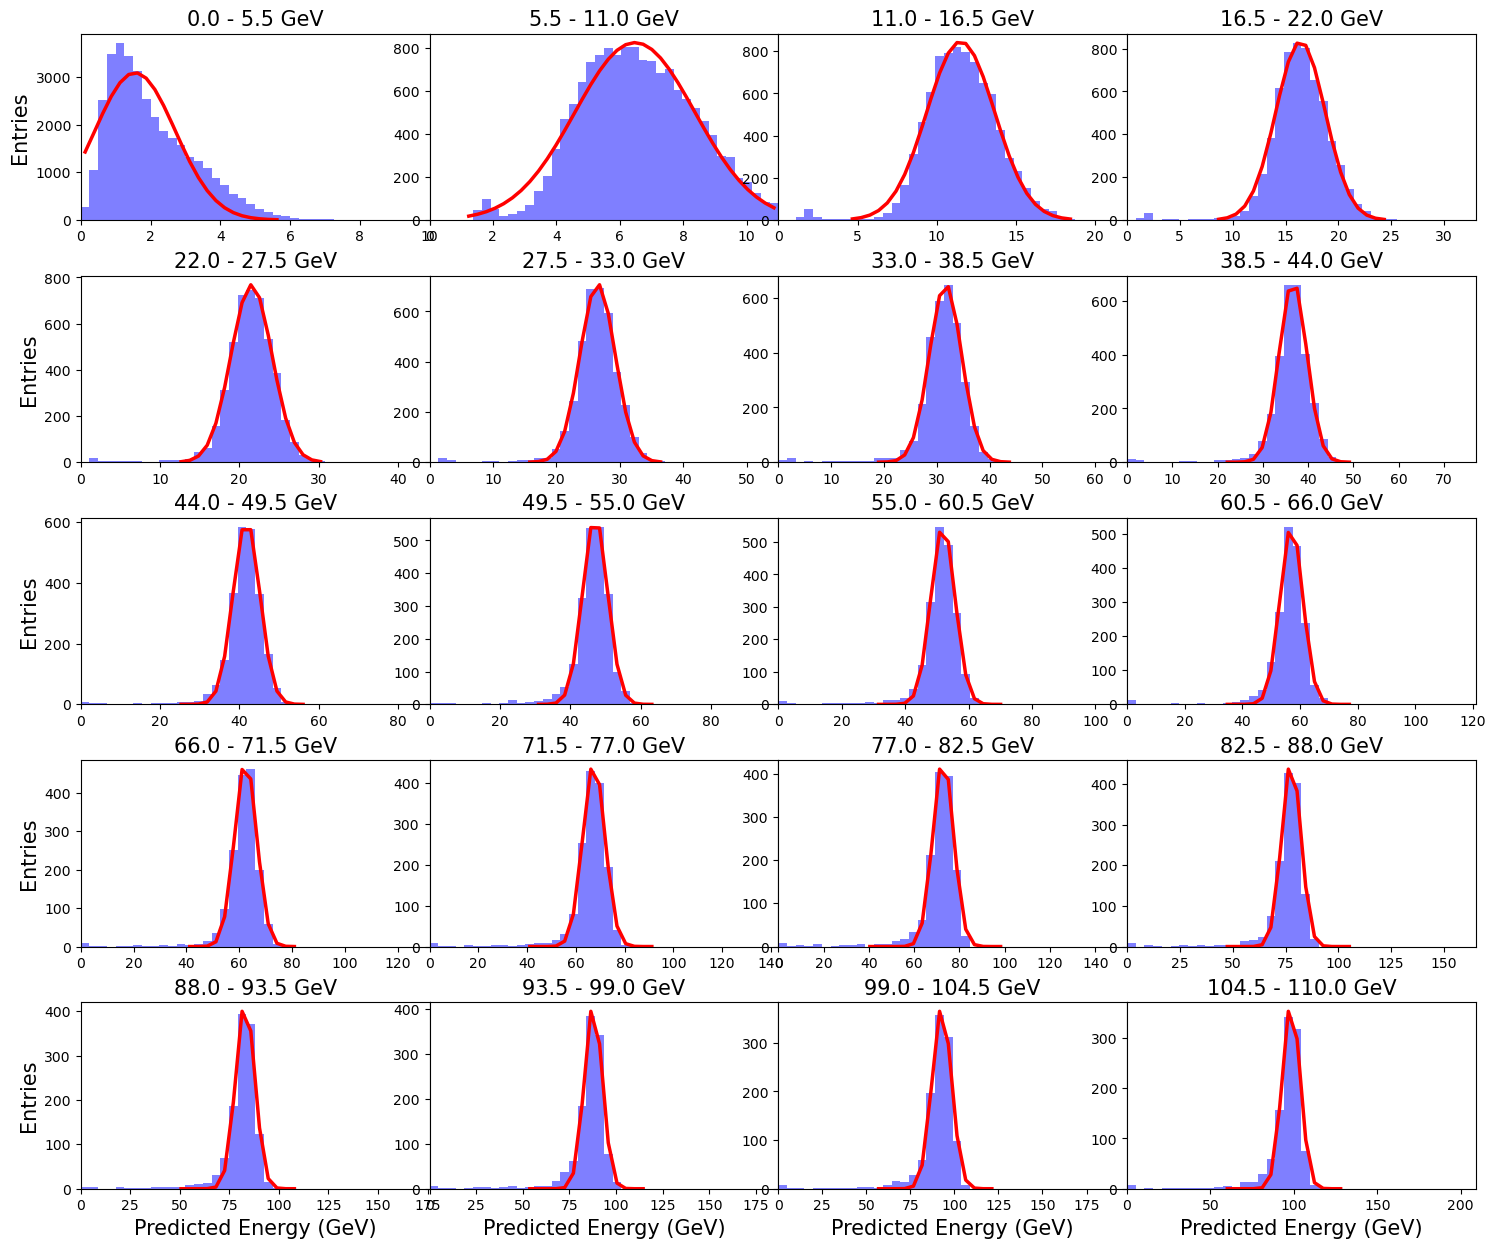

In [6]:
def run_strawman(particle='ele'):
    total_events=100_000
    detector='hcal'
    data_type='continuous'
    min_val=0
    max_val=110
    Nbins=21
    
    
    nbins=40
    approach='straw'
    ## Log10 base file 
    
    
    binning=np.linspace(min_val, max_val, Nbins)
    #root_file="/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_17deg_2.2M.root"    
    if (detector=='hcal'):
        if particle=='pi+' or particle =='pp':
            root_file="/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_17deg_600k_Uniform_1.root"

        elif particle=='e-' or particle =='ele':
            root_file="/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_e-_17deg_halfM_Uniform_1.root"
    elif detector=='hcal_insert':
        if particle=='pi+' or particle =='pp':
            root_file='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log_uniform_pi+_2.83deg_600k_root'
        elif particle=='e-' or particle =='ele':
             root_file='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_uniform_e-_2.83deg_halfM_1.root'
            
    output_straw='/home/bishnu/EIC/output_reg_dnn_straw/strawman_fit_slices_Final'
    get_fit_parameters_strawman(root_file, detector, binning, particle, total_events, data_type, output_straw, nbins, \
                                      time_TH, MIP_TH)
    
    
run_strawman(particle='pp')    

In [5]:
## STRAWMAN FOR CONTINUOUS DATA WITH LOG10 SPACE 
## SAMPLING FRACTION IS USED FOR ELECTRON AND SAME SAMPLING FRACTION IS USED FOR PION
## MIP = 0.5 * MIP cut and time<150 ns is used


## 81 BiNS PION
straw81_energy_pp_hcal_continuous=np. array([  1.181571,   1.982824,   3.390836,   4.780826,   6.158882,
         7.539566,   8.916244,  10.297249,  11.67715 ,  13.048426,
        14.427229,  15.806336,  17.190943,  18.54797 ,  19.928593,
        21.303223,  22.677497,  24.064931,  25.43785 ,  26.818391,
        28.171462,  29.556831,  30.931806,  32.310043,  33.684258,
        35.051628,  36.431443,  37.795223,  39.182553,  40.572912,
        41.936303,  43.307779,  44.677655,  46.047917,  47.438184,
        48.799608,  50.191592,  51.552772,  52.936313,  54.315214,
        55.701107,  57.06033 ,  58.439069,  59.818699,  61.194688,
        62.553251,  63.940564,  65.317418,  66.677011,  68.049735,
        69.425328,  70.793712,  72.190133,  73.551753,  74.914461,
        76.325318,  77.689341,  79.062056,  80.421071,  81.811702,
        83.181535,  84.586976,  85.933776,  87.311674,  88.674429,
        90.049316,  91.440641,  92.819806,  94.180886,  95.575544,
        96.94995 ,  98.314895,  99.697215, 101.065436, 102.419984,
       103.818475, 105.189246, 106.560263, 107.915797, 109.329073,
       120.598693])
straw81_res_cor_pp_hcal_continuous=np. array([0.520106, 0.448036, 0.337248, 0.268901, 0.227603, 0.203716,
       0.186748, 0.176228, 0.167779, 0.164952, 0.158282, 0.148875,
       0.14367 , 0.149506, 0.141387, 0.14186 , 0.138096, 0.133461,
       0.136771, 0.130499, 0.140082, 0.126875, 0.126726, 0.133369,
       0.133001, 0.134571, 0.123019, 0.142691, 0.133089, 0.124721,
       0.130173, 0.120731, 0.121516, 0.135701, 0.124799, 0.125515,
       0.133309, 0.128463, 0.134407, 0.129757, 0.132317, 0.125605,
       0.137681, 0.147097, 0.118897, 0.132897, 0.133838, 0.12155 ,
       0.115062, 0.130768, 0.116628, 0.126789, 0.128307, 0.120332,
       0.137181, 0.132369, 0.115977, 0.135021, 0.134608, 0.120781,
       0.130249, 0.121621, 0.123255, 0.130074, 0.118143, 0.124415,
       0.141859, 0.111261, 0.120002, 0.119763, 0.129036, 0.133066,
       0.127808, 0.12274 , 0.119021, 0.138947, 0.121777, 0.114318,
       0.120776, 0.127261, 0.138957])
straw81_res_sigma_pp_hcal_continuous=np. array([0.431392, 0.392797, 0.302333, 0.242863, 0.197271, 0.173303,
       0.156448, 0.147148, 0.136884, 0.133447, 0.124172, 0.115268,
       0.111789, 0.110732, 0.108208, 0.105279, 0.099442, 0.096736,
       0.092987, 0.089783, 0.092992, 0.087296, 0.087991, 0.085845,
       0.083657, 0.085784, 0.08224 , 0.076414, 0.077822, 0.0791  ,
       0.073467, 0.077258, 0.074003, 0.07393 , 0.068651, 0.069082,
       0.068991, 0.066452, 0.069006, 0.067248, 0.07214 , 0.062546,
       0.06497 , 0.065698, 0.064902, 0.061943, 0.06134 , 0.064301,
       0.0633  , 0.062414, 0.061902, 0.062502, 0.061587, 0.058035,
       0.059142, 0.057002, 0.063192, 0.057524, 0.058853, 0.05442 ,
       0.054878, 0.058476, 0.05393 , 0.056731, 0.057113, 0.053887,
       0.057912, 0.048287, 0.053045, 0.05105 , 0.052566, 0.050714,
       0.052097, 0.05145 , 0.049475, 0.052385, 0.0485  , 0.051088,
       0.057499, 0.049246, 0.080176])
straw81_res_std_median_pp_hcal_continuous=np. array([0.523319, 0.453385, 0.338713, 0.269353, 0.227513, 0.204002,
       0.186798, 0.176516, 0.167761, 0.164923, 0.158786, 0.148825,
       0.1439  , 0.149458, 0.141408, 0.142026, 0.138185, 0.133631,
       0.136942, 0.130516, 0.139925, 0.126906, 0.12672 , 0.133226,
       0.133093, 0.134658, 0.123028, 0.142638, 0.133029, 0.124647,
       0.130236, 0.120888, 0.121572, 0.135598, 0.124912, 0.125559,
       0.13323 , 0.128475, 0.134614, 0.129774, 0.132185, 0.12565 ,
       0.137903, 0.147009, 0.11902 , 0.13288 , 0.133746, 0.1215  ,
       0.115171, 0.130772, 0.116585, 0.12689 , 0.12823 , 0.120334,
       0.137199, 0.132373, 0.115823, 0.135056, 0.134537, 0.120736,
       0.130148, 0.121593, 0.123285, 0.130073, 0.118118, 0.124371,
       0.14184 , 0.111373, 0.120029, 0.119675, 0.129082, 0.133059,
       0.127809, 0.122794, 0.119124, 0.138849, 0.121761, 0.114375,
       0.120837, 0.127175, 0.140205])
straw81_res_sigma_median_pp_hcal_continuous=np. array([0.300346, 0.275493, 0.221321, 0.189368, 0.160695, 0.143802,
       0.131008, 0.124489, 0.116538, 0.114223, 0.106171, 0.099156,
       0.09656 , 0.095999, 0.093824, 0.091751, 0.087003, 0.084721,
       0.081433, 0.078928, 0.081999, 0.076573, 0.077738, 0.076118,
       0.074192, 0.076244, 0.072955, 0.068061, 0.069556, 0.070584,
       0.065595, 0.0691  , 0.066327, 0.066227, 0.061478, 0.06195 ,
       0.062031, 0.059851, 0.06208 , 0.060563, 0.064962, 0.056469,
       0.058588, 0.059343, 0.058585, 0.056069, 0.055618, 0.058142,
       0.057362, 0.056707, 0.056282, 0.056641, 0.056013, 0.052797,
       0.053619, 0.052076, 0.057468, 0.052384, 0.053631, 0.049584,
       0.05011 , 0.053287, 0.049342, 0.051592, 0.051973, 0.049168,
       0.05297 , 0.044119, 0.048615, 0.046754, 0.047919, 0.046303,
       0.047603, 0.047044, 0.045169, 0.04784 , 0.044422, 0.046774,
       0.052457, 0.045207, 0.072595])
straw81_scale_median_pp_hcal_continuous=np. array([0.716977, 0.731176, 0.749197, 0.785957, 0.816197, 0.831896,
       0.838359, 0.847389, 0.851636, 0.85496 , 0.856292, 0.859296,
       0.864201, 0.865665, 0.865586, 0.870452, 0.873181, 0.873809,
       0.874383, 0.877014, 0.878626, 0.875987, 0.880603, 0.883916,
       0.883806, 0.885902, 0.884173, 0.887003, 0.889271, 0.888667,
       0.890293, 0.890791, 0.893554, 0.89166 , 0.893412, 0.892766,
       0.894634, 0.895915, 0.895918, 0.896325, 0.896323, 0.899127,
       0.898213, 0.899563, 0.898692, 0.899684, 0.901615, 0.902195,
       0.901945, 0.903855, 0.905157, 0.901563, 0.90402 , 0.905371,
       0.902732, 0.906878, 0.904844, 0.905088, 0.904885, 0.906929,
       0.906039, 0.905764, 0.911469, 0.904866, 0.906517, 0.90852 ,
       0.907204, 0.910056, 0.909   , 0.910448, 0.906797, 0.910318,
       0.908288, 0.908464, 0.908892, 0.905971, 0.909346, 0.910019,
       0.907444, 0.911913, 0.906736])

## time 150 ns HCAL PION 64 Bins
straw64_energy_pp_hcal_continuous=np. array([  1.344048,   2.515303,   4.306097,   6.06326 ,   7.822686,
         9.574968,  11.32542 ,  13.070908,  14.812804,  16.58605 ,
        18.306812,  20.070577,  21.811688,  23.560976,  25.308007,
        27.055592,  28.788096,  30.559522,  32.296991,  34.02994 ,
        35.79041 ,  37.534718,  39.270535,  41.028624,  42.759277,
        44.515912,  46.243412,  47.998933,  49.756601,  51.499436,
        53.236638,  54.997087,  56.727524,  58.496763,  60.233589,
        61.969151,  63.724332,  65.479129,  67.20732 ,  68.971579,
        70.699542,  72.453108,  74.19779 ,  75.960952,  77.696911,
        79.450146,  81.189498,  82.94052 ,  84.69059 ,  86.417559,
        88.17428 ,  89.925786,  91.690845,  93.409615,  95.182903,
        96.914523,  98.6452  , 100.38112 , 102.127965, 103.878163,
       105.630789, 107.374633, 109.152436, 120.598693])
straw64_res_cor_pp_hcal_continuous=np. array([0.509469, 0.412479, 0.30039 , 0.236137, 0.203817, 0.184494,
       0.172979, 0.166857, 0.156059, 0.145735, 0.149554, 0.142034,
       0.144298, 0.132916, 0.137523, 0.135319, 0.133973, 0.12624 ,
       0.131418, 0.133914, 0.131492, 0.136307, 0.13053 , 0.126081,
       0.130234, 0.119923, 0.132242, 0.125798, 0.131989, 0.126201,
       0.135567, 0.132553, 0.126479, 0.13763 , 0.140024, 0.122271,
       0.136241, 0.119448, 0.121469, 0.119248, 0.131452, 0.126651,
       0.13297 , 0.125907, 0.125885, 0.133186, 0.127954, 0.125135,
       0.121408, 0.133701, 0.118318, 0.120896, 0.133909, 0.117362,
       0.119277, 0.128022, 0.135923, 0.117673, 0.124593, 0.134162,
       0.123178, 0.112001, 0.129119, 0.138957])
straw64_res_sigma_pp_hcal_continuous=np. array([0.434092, 0.369034, 0.279803, 0.210112, 0.174588, 0.156452,
       0.142443, 0.134284, 0.123874, 0.11422 , 0.112905, 0.109138,
       0.105495, 0.097512, 0.095755, 0.091001, 0.089824, 0.08972 ,
       0.085466, 0.084769, 0.084501, 0.078823, 0.077352, 0.078843,
       0.075012, 0.074534, 0.072436, 0.071037, 0.069917, 0.067025,
       0.069684, 0.069425, 0.067402, 0.066258, 0.064475, 0.065344,
       0.062486, 0.06456 , 0.062902, 0.060775, 0.063374, 0.060843,
       0.058365, 0.05676 , 0.062075, 0.056671, 0.05805 , 0.055348,
       0.059312, 0.055145, 0.054288, 0.053194, 0.0556  , 0.050069,
       0.053168, 0.052085, 0.051983, 0.052225, 0.049603, 0.052323,
       0.04855 , 0.052576, 0.050258, 0.080176])

straw64_res_std_median_pp_hcal_continuous=np. array([0.51426 , 0.42088 , 0.301651, 0.236575, 0.204395, 0.184758,
       0.173012, 0.166728, 0.156082, 0.145802, 0.149523, 0.142124,
       0.144483, 0.132928, 0.137636, 0.135503, 0.134007, 0.126249,
       0.131317, 0.133965, 0.131601, 0.136298, 0.130377, 0.126121,
       0.130232, 0.120028, 0.132084, 0.125726, 0.132035, 0.12623 ,
       0.135648, 0.132679, 0.126362, 0.137845, 0.140084, 0.122195,
       0.136302, 0.119455, 0.121574, 0.119214, 0.13151 , 0.126659,
       0.133097, 0.126066, 0.125792, 0.133214, 0.127856, 0.12508 ,
       0.121462, 0.13376 , 0.118564, 0.120811, 0.133967, 0.117388,
       0.119157, 0.128134, 0.135913, 0.117788, 0.124663, 0.134163,
       0.123062, 0.112067, 0.128883, 0.140205])
straw64_res_sigma_median_pp_hcal_continuous=np. array([0.3015  , 0.260168, 0.213272, 0.170276, 0.145164, 0.131658,
       0.121112, 0.114888, 0.106168, 0.098618, 0.09784 , 0.094768,
       0.092081, 0.085352, 0.083844, 0.079951, 0.079167, 0.07895 ,
       0.075706, 0.075225, 0.075199, 0.070096, 0.069073, 0.070343,
       0.06707 , 0.066798, 0.064929, 0.063703, 0.062779, 0.060358,
       0.062642, 0.062577, 0.060677, 0.059783, 0.058255, 0.059091,
       0.056545, 0.058411, 0.057099, 0.055335, 0.057489, 0.055387,
       0.052982, 0.051667, 0.056584, 0.051511, 0.052991, 0.050504,
       0.054171, 0.050251, 0.003957, 0.048565, 0.050938, 0.04573 ,
       0.048711, 0.047449, 0.047489, 0.047748, 0.04527 , 0.047804,
       0.044442, 0.047996, 0.046113, 0.072595])
straw64_scale_median_pp_hcal_continuous=np. array([0.721343, 0.735607, 0.774652, 0.813873, 0.833883, 0.843257,
       0.850011, 0.854822, 0.856556, 0.863056, 0.864634, 0.867021,
       0.871281, 0.873464, 0.874215, 0.87701 , 0.878523, 0.877749,
       0.883647, 0.884247, 0.886051, 0.885904, 0.888691, 0.888979,
       0.890748, 0.893456, 0.892417, 0.892324, 0.893594, 0.896639,
       0.894802, 0.897494, 0.897017, 0.899287, 0.899212, 0.900067,
       0.899858, 0.901485, 0.903163, 0.904832, 0.902265, 0.905317,
       0.902629, 0.906535, 0.906528, 0.904149, 0.906962, 0.905878,
       0.907988, 0.907864, 0.904116, 0.908924, 0.910016, 0.908629,
       0.910448, 0.906967, 0.909249, 0.90933 , 0.909346, 0.907637,
       0.90699 , 0.908738, 0.912228, 0.906736])

### 49  energy bins PION
straw49_energy_pp_hcal_continuous=np. array([  1.563526,   3.303498,   5.650259,   7.966742,  10.268697,
        12.575379,  14.853988,  17.170723,  19.456162,  21.748638,
        24.050543,  26.348257,  28.621751,  30.938702,  33.231276,
        35.501833,  37.809056,  40.091708,  42.375833,  44.696343,
        46.976534,  49.244968,  51.557336,  53.838826,  56.144826,
        58.435352,  60.713368,  63.008795,  65.312507,  67.584481,
        69.877946,  72.193448,  74.460269,  76.787017,  79.065158,
        81.343876,  83.641061,  85.904233,  88.213265,  90.496264,
        92.819798,  95.107579,  97.387725,  99.689374, 101.978143,
       104.250749, 106.581361, 108.876589, 120.598693])
straw49_res_cor_pp_hcal_continuous=np. array([0.510083, 0.384087, 0.263591, 0.208931, 0.186285, 0.171617,
       0.159399, 0.149152, 0.146109, 0.144617, 0.135971, 0.132358,
       0.137358, 0.127495, 0.135228, 0.132745, 0.135868, 0.12937 ,
       0.128689, 0.123931, 0.129272, 0.129725, 0.128032, 0.13422 ,
       0.130031, 0.135369, 0.134194, 0.135411, 0.119326, 0.126501,
       0.120955, 0.127297, 0.130173, 0.125615, 0.131289, 0.127589,
       0.126127, 0.129566, 0.118215, 0.130491, 0.117487, 0.123387,
       0.132783, 0.122262, 0.124295, 0.133851, 0.112821, 0.127644,
       0.138957])
straw49_res_sigma_pp_hcal_continuous=np. array([0.459839, 0.364854, 0.245391, 0.183679, 0.159304, 0.142069,
       0.127339, 0.117089, 0.112404, 0.107173, 0.098997, 0.094706,
       0.091976, 0.090684, 0.08463 , 0.086099, 0.080614, 0.078945,
       0.07517 , 0.075914, 0.071346, 0.070226, 0.069451, 0.070421,
       0.069572, 0.06642 , 0.065612, 0.062941, 0.065518, 0.062813,
       0.063249, 0.061666, 0.05849 , 0.060035, 0.059299, 0.056276,
       0.056555, 0.056543, 0.057014, 0.054252, 0.050152, 0.05137 ,
       0.053382, 0.051992, 0.05202 , 0.052882, 0.051086, 0.051562,
       0.080176])
straw49_res_std_median_pp_hcal_continuous=np. array([0.523301, 0.390208, 0.264564, 0.209715, 0.186731, 0.171868,
       0.159417, 0.149456, 0.146217, 0.144832, 0.136059, 0.132382,
       0.137331, 0.127474, 0.135339, 0.132831, 0.135921, 0.129503,
       0.128733, 0.123982, 0.129399, 0.129775, 0.12814 , 0.134186,
       0.12988 , 0.135677, 0.134262, 0.135425, 0.11936 , 0.126577,
       0.120966, 0.127224, 0.130329, 0.125739, 0.131277, 0.127528,
       0.126122, 0.129642, 0.118423, 0.130398, 0.117572, 0.123228,
       0.132841, 0.122188, 0.124273, 0.133809, 0.112879, 0.127467,
       0.140205])
straw49_res_sigma_median_pp_hcal_continuous=np. array([0.315748, 0.262577, 0.196288, 0.152593, 0.1345  , 0.121058,
       0.109072, 0.100956, 0.097445, 0.093558, 0.086702, 0.0831  ,
       0.081015, 0.079916, 0.075056, 0.076524, 0.071729, 0.070338,
       0.067074, 0.068021, 0.064019, 0.062977, 0.062504, 0.063343,
       0.06276 , 0.059891, 0.059214, 0.05702 , 0.059251, 0.057041,
       0.057453, 0.056061, 0.05311 , 0.054743, 0.053964, 0.051356,
       0.051573, 0.051615, 0.05187 , 0.04948 , 0.045927, 0.047039,
       0.048699, 0.047565, 0.047448, 0.048314, 0.046701, 0.047281,
       0.072595])
straw49_scale_median_pp_hcal_continuous=np. array([0.726773, 0.749054, 0.805554, 0.834879, 0.846669, 0.852997,
       0.856624, 0.864136, 0.865534, 0.871393, 0.873857, 0.876294,
       0.87801 , 0.879013, 0.8845  , 0.885615, 0.886254, 0.889087,
       0.890136, 0.89272 , 0.89285 , 0.891855, 0.897032, 0.895714,
       0.897227, 0.898729, 0.898774, 0.90095 , 0.900948, 0.903294,
       0.903981, 0.904484, 0.903484, 0.905365, 0.905597, 0.906899,
       0.905969, 0.909542, 0.905406, 0.907411, 0.910826, 0.909143,
       0.90818 , 0.909286, 0.90794 , 0.907269, 0.908366, 0.911764,
       0.906736])


## 36 bins  PION
straw36_energy_pp_hcal_continuous=np. array([  1.876197,   4.538017,   7.759849,  10.925549,  14.069943,
        17.244653,  20.398947,  23.534799,  26.689243,  29.853447,
        32.990277,  36.121584,  39.271817,  42.38815 ,  45.546009,
        48.675166,  51.858227,  54.99398 ,  58.143045,  61.264593,
        64.412031,  67.54589 ,  70.693471,  73.834669,  77.015546,
        80.11661 ,  83.294853,  86.385287,  89.555096,  92.731286,
        95.887834,  98.996312, 102.139038, 105.267707, 108.436743,
       120.598693])
straw36_res_cor_pp_hcal_continuous=np. array([0.53272 , 0.343756, 0.227139, 0.189802, 0.169595, 0.1537  ,
       0.147997, 0.141829, 0.137389, 0.131933, 0.133926, 0.133971,
       0.133944, 0.128361, 0.12916 , 0.127152, 0.133722, 0.132932,
       0.135153, 0.130618, 0.131178, 0.120743, 0.126494, 0.129705,
       0.127312, 0.132738, 0.123344, 0.126834, 0.122083, 0.12539 ,
       0.123836, 0.128062, 0.124235, 0.129036, 0.121563, 0.138957])
straw36_res_sigma_pp_hcal_continuous=np. array([0.515607, 0.349758, 0.208681, 0.165552, 0.139582, 0.123115,
       0.11417 , 0.103958, 0.098499, 0.093692, 0.08878 , 0.086155,
       0.081574, 0.078998, 0.075856, 0.072378, 0.070153, 0.070946,
       0.065787, 0.066309, 0.066302, 0.065511, 0.06192 , 0.061313,
       0.061157, 0.059155, 0.057277, 0.056331, 0.056794, 0.052894,
       0.053245, 0.053681, 0.052053, 0.050736, 0.05325 , 0.080176])
straw36_res_std_median_pp_hcal_continuous=np. array([0.555216, 0.348583, 0.228425, 0.190357, 0.169769, 0.153902,
       0.148145, 0.141998, 0.137533, 0.131996, 0.134015, 0.134063,
       0.133995, 0.128343, 0.129263, 0.127237, 0.133856, 0.132953,
       0.135411, 0.130753, 0.131388, 0.120816, 0.126627, 0.12975 ,
       0.127554, 0.132761, 0.123362, 0.126796, 0.12222 , 0.125447,
       0.123745, 0.128098, 0.124144, 0.128983, 0.12159 , 0.140205])
straw36_res_sigma_median_pp_hcal_continuous=np. array([0.344412, 0.264916, 0.172619, 0.140129, 0.119432, 0.106173,
       0.099186, 0.090915, 0.086424, 0.082407, 0.078663, 0.076596,
       0.072656, 0.070548, 0.067937, 0.06493 , 0.063101, 0.063859,
       0.059268, 0.059906, 0.05998 , 0.05944 , 0.056283, 0.055711,
       0.055758, 0.053894, 0.052157, 0.051359, 0.051793, 0.048353,
       0.048683, 0.048986, 0.047481, 0.046448, 0.048717, 0.072595])
straw36_scale_median_pp_hcal_continuous=np. array([0.728807, 0.780535, 0.833097, 0.848435, 0.856134, 0.863103,
       0.867999, 0.873522, 0.876693, 0.877808, 0.884215, 0.88561 ,
       0.888558, 0.890088, 0.892949, 0.892567, 0.896266, 0.896047,
       0.898974, 0.899585, 0.901041, 0.903163, 0.903885, 0.903712,
       0.906595, 0.905685, 0.905775, 0.907601, 0.907833, 0.90906 ,
       0.909419, 0.908851, 0.907472, 0.908665, 0.910615, 0.906736])


## ### 21  energy bins
straw21_energy_pp_hcal_continuous=np. array([  2.64059 ,   7.9403  ,  13.553261,  19.116018,  24.661373,
        30.188384,  35.642627,  41.170233,  46.696652,  52.226277,
        57.720784,  63.203438,  68.689628,  74.204358,  79.684047,
        85.188189,  90.75607 ,  96.246876, 101.738538, 107.281424])
straw21_res_cor_pp_hcal_continuous=np. array([0.626181, 0.285047, 0.197557, 0.166247, 0.149197, 0.142442,
       0.140259, 0.132944, 0.131196, 0.134928, 0.138423, 0.129282,
       0.124417, 0.131194, 0.128295, 0.127487, 0.125376, 0.126509,
       0.128091, 0.122132])
straw21_res_sigma_pp_hcal_continuous=np. array([0.73397 , 0.293758, 0.182689, 0.142635, 0.118364, 0.105665,
       0.096116, 0.086649, 0.080418, 0.076321, 0.072734, 0.069685,
       0.067609, 0.064075, 0.062598, 0.058734, 0.05813 , 0.055825,
       0.054511, 0.054258])
straw21_res_std_median_pp_hcal_continuous=np. array([0.707777, 0.289874, 0.198687, 0.167075, 0.149674, 0.142721,
       0.140467, 0.1331  , 0.131227, 0.13516 , 0.138644, 0.129541,
       0.124426, 0.131419, 0.12828 , 0.127578, 0.125437, 0.12658 ,
       0.128113, 0.122236])
straw21_res_sigma_median_pp_hcal_continuous=np. array([0.435312, 0.239247, 0.155197, 0.123065, 0.103421, 0.093008,
       0.085276, 0.07728 , 0.072026, 0.068567, 0.065549, 0.062953,
       0.061331, 0.058266, 0.056976, 0.053567, 0.053057, 0.051001,
       0.049748, 0.04964 ])
straw21_scale_median_pp_hcal_continuous=np. array([0.745645, 0.832469, 0.855374, 0.866273, 0.874691, 0.879691,
       0.885307, 0.889737, 0.892828, 0.895801, 0.898149, 0.900418,
       0.903156, 0.904777, 0.905513, 0.906928, 0.908334, 0.90935 ,
       0.908128, 0.909714])


##  TIME 50 NS PION HCAL 
straw64_50energy_pp_hcal_continuous=np. array([  1.34447 ,   2.513435,   4.30212 ,   6.066736,   7.819075,
         9.576679,  11.328826,  13.067336,  14.815816,  16.590882,
        18.309178,  20.071384,  21.811305,  23.560734,  25.30677 ,
        27.060692,  28.79032 ,  30.562298,  32.29734 ,  34.025649,
        35.789321,  37.530279,  39.268901,  41.03106 ,  42.75648 ,
        44.514709,  46.258952,  48.00144 ,  49.758994,  51.506   ,
        53.234744,  55.004055,  56.723975,  58.490804,  60.233074,
        61.967852,  63.72674 ,  65.480472,  67.203706,  68.975477,
        70.700606,  72.455138,  74.207524,  75.960951,  77.711158,
        79.436222,  81.194575,  82.945002,  84.683551,  86.405872,
        88.18109 ,  89.920102,  91.692249,  93.408344,  95.186132,
        96.913164,  98.647856, 100.371372, 102.102518, 103.871913,
       105.631679, 107.38628 , 109.153738, 120.637768])
straw64_50res_cor_pp_hcal_continuous=np. array([0.512863, 0.415567, 0.302833, 0.237792, 0.206817, 0.189178,
       0.174353, 0.170619, 0.159132, 0.148675, 0.152495, 0.14523 ,
       0.144612, 0.139251, 0.13788 , 0.139542, 0.134318, 0.130265,
       0.128941, 0.134373, 0.130697, 0.141764, 0.132456, 0.131595,
       0.130861, 0.1277  , 0.13383 , 0.121072, 0.136042, 0.127107,
       0.133673, 0.129612, 0.126852, 0.137143, 0.134128, 0.12243 ,
       0.134641, 0.121428, 0.127641, 0.121302, 0.128473, 0.126011,
       0.131076, 0.125199, 0.130656, 0.134615, 0.134   , 0.125323,
       0.125077, 0.136988, 0.121587, 0.124263, 0.125588, 0.118181,
       0.119249, 0.128088, 0.135999, 0.113258, 0.127892, 0.134132,
       0.122753, 0.106263, 0.11788 , 0.139894])
straw64_50res_sigma_pp_hcal_continuous=np. array([0.438322, 0.371764, 0.283901, 0.213661, 0.179459, 0.161283,
       0.146488, 0.138046, 0.128462, 0.118587, 0.115835, 0.112912,
       0.108148, 0.103126, 0.099503, 0.097121, 0.093056, 0.094015,
       0.088439, 0.088381, 0.087826, 0.082187, 0.081752, 0.081547,
       0.078907, 0.078961, 0.075186, 0.071838, 0.072448, 0.071797,
       0.073085, 0.072848, 0.067487, 0.06952 , 0.068611, 0.067033,
       0.064981, 0.067622, 0.065438, 0.065242, 0.067827, 0.062589,
       0.063875, 0.061711, 0.066573, 0.059369, 0.059989, 0.058155,
       0.060527, 0.05836 , 0.057978, 0.055843, 0.05808 , 0.053989,
       0.056907, 0.053485, 0.057193, 0.056489, 0.052135, 0.053292,
       0.055401, 0.055852, 0.050997, 0.080704])
straw64_50res_std_median_pp_hcal_continuous=np. array([0.518449, 0.423534, 0.304345, 0.238148, 0.207344, 0.189147,
       0.174293, 0.170676, 0.158969, 0.148592, 0.152562, 0.145156,
       0.1448  , 0.139079, 0.13793 , 0.139552, 0.134611, 0.130334,
       0.128898, 0.134609, 0.130818, 0.141573, 0.13232 , 0.131517,
       0.130869, 0.127778, 0.133581, 0.121007, 0.135898, 0.127276,
       0.133886, 0.129632, 0.126896, 0.137283, 0.134191, 0.122353,
       0.134635, 0.121285, 0.127662, 0.121181, 0.128479, 0.125998,
       0.131095, 0.125405, 0.130712, 0.134544, 0.133969, 0.125308,
       0.125079, 0.136895, 0.121694, 0.124192, 0.125639, 0.118292,
       0.119196, 0.128219, 0.135863, 0.113345, 0.127966, 0.134206,
       0.122674, 0.106318, 0.117819, 0.140905])
straw64_50res_sigma_median_pp_hcal_continuous=np. array([0.301033, 0.259043, 0.213681, 0.170936, 0.147685, 0.134268,
       0.123101, 0.116804, 0.108847, 0.10109 , 0.099026, 0.096694,
       0.09322 , 0.089079, 0.085913, 0.084174, 0.080817, 0.081707,
       0.077384, 0.077429, 0.077027, 0.072162, 0.072033, 0.07176 ,
       0.069527, 0.069875, 0.066381, 0.063521, 0.064246, 0.063731,
       0.0646  , 0.064621, 0.060038, 0.061832, 0.061055, 0.059675,
       0.057947, 0.060512, 0.058521, 0.058556, 0.060698, 0.056017,
       0.057118, 0.055504, 0.059694, 0.053225, 0.05395 , 0.052322,
       0.054515, 0.052526, 0.051947, 0.050309, 0.052507, 0.048642,
       0.051461, 0.048167, 0.051613, 0.050952, 0.04694 , 0.048084,
       0.049975, 0.050377, 0.046269, 0.07214 ])
straw64_50scale_median_pp_hcal_continuous=np. array([0.714087, 0.726673, 0.765416, 0.803672, 0.825694, 0.833059,
       0.839996, 0.846385, 0.846591, 0.851984, 0.854675, 0.853799,
       0.860741, 0.860902, 0.861734, 0.865712, 0.86697 , 0.866506,
       0.873389, 0.872454, 0.875081, 0.873845, 0.877396, 0.876028,
       0.877601, 0.882467, 0.879825, 0.879172, 0.880626, 0.885181,
       0.881168, 0.883234, 0.886431, 0.885424, 0.886696, 0.886739,
       0.887351, 0.889405, 0.88983 , 0.891488, 0.890486, 0.890104,
       0.888097, 0.895444, 0.892536, 0.89192 , 0.894277, 0.893536,
       0.894838, 0.89485 , 0.892322, 0.895953, 0.898635, 0.89575 ,
       0.898165, 0.895889, 0.896237, 0.897027, 0.896308, 0.897205,
       0.895724, 0.897094, 0.902668, 0.893844])





### 81 bins with more precision pion hcal
ds811_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([  1.177498758 ,   1.9811773089,   3.3937733802,   4.7820148577,
         6.1600477237,   7.5375290871,   8.9209087383,  10.2974994554,
        11.6775482845,  13.0465003516,  14.4173861138,  15.8026027136,
        17.1818372682,  18.553239562 ,  19.9317879675,  21.3063133201,
        22.6878870021,  24.0572419001,  25.4334952949,  26.8132156416,
        28.1900737645,  29.5493141742,  30.9386289881,  32.3118636295,
        33.67795258  ,  35.0678194061,  36.4291640849,  37.8137071717,
        39.1790209494,  40.5598021158,  41.9239114087,  43.301561511 ,
        44.6814802944,  46.0707860336,  47.4294332817,  48.8055403503,
        50.1864288213,  51.5599205566,  52.9220544276,  54.3207451466,
        55.6979301217,  57.0585396866,  58.4509099864,  59.8005811643,
        61.1851568327,  62.5569373256,  63.9362337422,  65.3201192154,
        66.7127920184,  68.0639720504,  69.4448862892,  70.8208431855,
        72.1842368924,  73.5552655923,  74.936199908 ,  76.3038736591,
        77.6521902167,  79.0546515641,  80.4259133669,  81.8223522266,
        83.1889422547,  84.5643645107,  85.9320523727,  87.3219757551,
        88.6860487486,  90.058593588 ,  91.4254582465,  92.8017474296,
        94.2033717233,  95.5435732253,  96.9433582791,  98.323771503 ,
        99.688004965 , 101.0640027506, 102.4318522737, 103.8218853741,
       105.1863424009, 106.5633806234, 107.9386560732, 109.3109963974,
       120.5657538262])
ds811_res_cor_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.1631717849, 0.3799304459, 0.2563882428, 0.1952847145,
       0.1603789095, 0.1469129613, 0.1362663635, 0.1288991559,
       0.1305722327, 0.1214698399, 0.1212627164, 0.1127384432,
       0.1149521612, 0.1165447863, 0.1109104632, 0.111402507 ,
       0.112018728 , 0.1089843586, 0.111820412 , 0.1180545435,
       0.1047816379, 0.1144333877, 0.0991026354, 0.1092679548,
       0.1016455403, 0.1063598389, 0.1049876685, 0.1167202844,
       0.1024696455, 0.1026157689, 0.1067066557, 0.1088401518,
       0.0987549376, 0.0999847934, 0.1054953565, 0.0964072903,
       0.1062041983, 0.1063822193, 0.1035276735, 0.1066598868,
       0.1069622229, 0.116426047 , 0.1043779003, 0.1027689839,
       0.0980687691, 0.1065660565, 0.1033561643, 0.0892513533,
       0.1211156489, 0.0973471764, 0.1145466639, 0.1131779328,
       0.1061734841, 0.1015181572, 0.1022813034, 0.0911933457,
       0.1116257856, 0.0836805183, 0.1122579985, 0.0933615694,
       0.0976525324, 0.1051545225, 0.1033586666, 0.0969698262,
       0.1209991504, 0.1011293191, 0.098389493 , 0.1065780846,
       0.0854117447, 0.1164232212, 0.0940456047, 0.1023998792,
       0.0958440758, 0.1100020055, 0.1104982018, 0.0928385034,
       0.1039381902, 0.1014040551, 0.1108077225, 0.0973766887,
       0.110394337 ])
ds811_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.0875147505, 0.291264977 , 0.2082069009, 0.165314109 ,
       0.1379857514, 0.1246055461, 0.1158250633, 0.108116946 ,
       0.1004980939, 0.093757168 , 0.0882109207, 0.0851487513,
       0.0816681751, 0.0788091126, 0.07754136  , 0.0756181065,
       0.072647206 , 0.069843123 , 0.0707106382, 0.0661832548,
       0.0658252651, 0.064528122 , 0.0630776475, 0.0620417257,
       0.0612133791, 0.0588694244, 0.0585640027, 0.0592236198,
       0.0546367601, 0.0576849424, 0.0541870631, 0.0571692441,
       0.0539274806, 0.0550456397, 0.0513413312, 0.0520480787,
       0.0497269432, 0.0479346212, 0.0496105494, 0.0482980919,
       0.0487786228, 0.0451421657, 0.0483398461, 0.048464018 ,
       0.0486630109, 0.045653538 , 0.0466975875, 0.0422426922,
       0.0449154471, 0.0460687511, 0.0439405611, 0.044566758 ,
       0.0440564813, 0.0490222248, 0.0428868758, 0.0441079316,
       0.0449720758, 0.0441760225, 0.0402666148, 0.039548289 ,
       0.0422069736, 0.0427842138, 0.0431605642, 0.0421129197,
       0.0412070488, 0.0428909302, 0.0419010633, 0.0438283498,
       0.0412768953, 0.039314938 , 0.041208897 , 0.0395031737,
       0.042466368 , 0.0410663062, 0.0391185719, 0.0388985774,
       0.0435377015, 0.0406338347, 0.0395365209, 0.0415125379,
       0.0647853643])
ds811_res_sigma_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.0908540839, 0.2744858169, 0.2041138624, 0.1632338447,
       0.1363543703, 0.123074045 , 0.1143859738, 0.107498442 ,
       0.099814644 , 0.0929781501, 0.08751278  , 0.0843854033,
       0.0810547977, 0.0783040566, 0.0769755125, 0.0752425651,
       0.0722775878, 0.0695314686, 0.0702696222, 0.0658846337,
       0.0654936135, 0.0643636861, 0.0628436841, 0.061723552 ,
       0.0610118751, 0.0588523379, 0.0584841022, 0.059064536 ,
       0.0544552826, 0.0576297125, 0.0541447093, 0.0570949026,
       0.0539786119, 0.0550493981, 0.0513366452, 0.0520952858,
       0.0496859346, 0.0478563058, 0.0496367153, 0.0483835503,
       0.0487690425, 0.0451507333, 0.0482869571, 0.0485982965,
       0.0486962322, 0.045705373 , 0.0467315526, 0.042267301 ,
       0.0449218318, 0.0461849603, 0.0439103375, 0.044593439 ,
       0.0441091977, 0.0489746382, 0.0429223536, 0.0441065536,
       0.0449737904, 0.0442473998, 0.0403506034, 0.0395401493,
       0.0421406853, 0.0428737137, 0.0430299431, 0.0420620161,
       0.0413060831, 0.0429040426, 0.0419969368, 0.0439216348,
       0.0413094932, 0.0394116007, 0.0413188354, 0.0396156053,
       0.0425945393, 0.0411960244, 0.0391673912, 0.0389987624,
       0.0436622859, 0.0408452002, 0.039739561 , 0.0416564702,
       0.0644554635])
ds811_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.1682463688, 0.3897833787, 0.2580595894, 0.1953857218,
       0.1604169548, 0.1470062865, 0.1365101489, 0.128800135 ,
       0.1305663482, 0.1213628168, 0.1213584959, 0.1128149506,
       0.1150738105, 0.1165047428, 0.1110596526, 0.1113938081,
       0.1120139339, 0.1089422591, 0.1118756195, 0.1180721553,
       0.104758884 , 0.1142495262, 0.0991680053, 0.1092812179,
       0.1016710786, 0.1064298891, 0.104970187 , 0.1166946168,
       0.1024770916, 0.1027008009, 0.1067647975, 0.1089517577,
       0.0987512021, 0.0999274088, 0.1054668011, 0.0964460574,
       0.1061423675, 0.1062900455, 0.1035509081, 0.1065339603,
       0.1068529728, 0.1163597718, 0.1043194552, 0.1027378175,
       0.0980963419, 0.1065801808, 0.1034531007, 0.0892729337,
       0.1210278918, 0.0973757591, 0.1146017482, 0.1131442932,
       0.1061948068, 0.1015508057, 0.1022398881, 0.0912215741,
       0.1116358942, 0.0836845563, 0.1122670766, 0.093373629 ,
       0.0976923889, 0.1050969984, 0.1034253069, 0.0969514783,
       0.1210510874, 0.1011267216, 0.0983413006, 0.1066006619,
       0.0854543205, 0.11642838  , 0.0939492462, 0.1024545212,
       0.0957898078, 0.1100740234, 0.1104591727, 0.0927510141,
       0.1038394178, 0.1014462764, 0.1108123126, 0.0973782855,
       0.1105261434])
ds811_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([1.0972174406, 0.9904474616, 0.9942920208, 0.9931890965,
       0.9926421642, 0.9906216562, 0.992067337 , 0.9943514764,
       0.9950134754, 0.9936208725, 0.9945808053, 0.9919878244,
       0.9936651886, 0.9952127039, 0.9942643046, 0.9956670403,
       0.9952055812, 0.9959836602, 0.9942710996, 0.9959082007,
       0.9961803854, 0.9961256981, 0.9977298379, 0.9956995249,
       0.9964500666, 0.9997188449, 0.997237891 , 0.9952029586,
       0.9970521331, 0.9995351434, 0.9978725314, 0.9978697896,
       1.0003997087, 0.9986043572, 0.9998517931, 0.9998863935,
       0.9970378876, 0.998072207 , 0.9988365471, 0.9996395111,
       0.9984506071, 0.9985342026, 0.9976410866, 1.0002783537,
       0.9983929694, 0.9993364811, 0.9988069534, 0.9985931516,
       0.9977523088, 1.0012521744, 0.9971612096, 0.9991776943,
       0.9994926155, 0.9965970218, 0.9983026385, 0.9994632602,
       0.9984540045, 1.0005399585, 1.0016251802, 0.9989215732,
       0.9972250462, 0.9998959303, 0.9956237078, 0.9976649284,
       0.998008877 , 0.9986438453, 0.9997418821, 0.998831898 ,
       0.9986011982, 0.9991547763, 0.999204278 , 1.000831008 ,
       1.0010092258, 0.9996174574, 1.0003584623, 1.0003939271,
       0.9987600446, 1.0003744364, 1.0003882051, 1.001336813 ,
       0.9904804826])




## This is with cut in ML pion HCAL 
### 81  energy bins
ds81_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([  1.1775 ,   1.98118,   3.39377,   4.78201,   6.16005,   7.53753,
         8.92091,  10.2975 ,  11.67755,  13.0465 ,  14.41739,  15.8026 ,
        17.18184,  18.55324,  19.93179,  21.30631,  22.68789,  24.05724,
        25.4335 ,  26.81322,  28.19007,  29.54931,  30.93863,  32.31186,
        33.67795,  35.06782,  36.42916,  37.81371,  39.17902,  40.5598 ,
        41.92391,  43.30156,  44.68148,  46.07079,  47.42943,  48.80554,
        50.18643,  51.55992,  52.92205,  54.32075,  55.69793,  57.05854,
        58.45091,  59.80058,  61.18516,  62.55694,  63.93623,  65.32012,
        66.71279,  68.06397,  69.44489,  70.82084,  72.18424,  73.55527,
        74.9362 ,  76.30387,  77.65219,  79.05465,  80.42591,  81.82235,
        83.18894,  84.56436,  85.93205,  87.32198,  88.68605,  90.05859,
        91.42546,  92.80175,  94.20337,  95.54357,  96.94336,  98.32377,
        99.688  , 101.064  , 102.43185, 103.82189, 105.18634, 106.56338,
       107.93866, 109.311  , 120.56575])
ds81_res_cor_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.16317, 0.37993, 0.25639, 0.19528, 0.16038, 0.14691, 0.13627,
       0.1289 , 0.13057, 0.12147, 0.12126, 0.11274, 0.11495, 0.11654,
       0.11091, 0.1114 , 0.11202, 0.10898, 0.11182, 0.11805, 0.10478,
       0.11443, 0.0991 , 0.10927, 0.10165, 0.10636, 0.10499, 0.11672,
       0.10247, 0.10262, 0.10671, 0.10884, 0.09875, 0.09998, 0.1055 ,
       0.09641, 0.1062 , 0.10638, 0.10353, 0.10666, 0.10696, 0.11643,
       0.10438, 0.10277, 0.09807, 0.10657, 0.10336, 0.08925, 0.12112,
       0.09735, 0.11455, 0.11318, 0.10617, 0.10152, 0.10228, 0.09119,
       0.11163, 0.08368, 0.11226, 0.09336, 0.09765, 0.10515, 0.10336,
       0.09697, 0.121  , 0.10113, 0.09839, 0.10658, 0.08541, 0.11642,
       0.09405, 0.1024 , 0.09584, 0.11   , 0.1105 , 0.09284, 0.10394,
       0.1014 , 0.11081, 0.09738, 0.11039])
ds81_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.08751, 0.29126, 0.20821, 0.16531, 0.13799, 0.12461, 0.11583,
       0.10812, 0.1005 , 0.09376, 0.08821, 0.08515, 0.08167, 0.07881,
       0.07754, 0.07562, 0.07265, 0.06984, 0.07071, 0.06618, 0.06583,
       0.06453, 0.06308, 0.06204, 0.06121, 0.05887, 0.05856, 0.05922,
       0.05464, 0.05768, 0.05419, 0.05717, 0.05393, 0.05505, 0.05134,
       0.05205, 0.04973, 0.04793, 0.04961, 0.0483 , 0.04878, 0.04514,
       0.04834, 0.04846, 0.04866, 0.04565, 0.0467 , 0.04224, 0.04492,
       0.04607, 0.04394, 0.04457, 0.04406, 0.04902, 0.04289, 0.04411,
       0.04497, 0.04418, 0.04027, 0.03955, 0.04221, 0.04278, 0.04316,
       0.04211, 0.04121, 0.04289, 0.0419 , 0.04383, 0.04128, 0.03931,
       0.04121, 0.0395 , 0.04247, 0.04107, 0.03912, 0.0389 , 0.04354,
       0.04063, 0.03954, 0.04151, 0.06479])
ds81_res_sigma_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.09085, 0.27449, 0.20411, 0.16323, 0.13635, 0.12307, 0.11439,
       0.1075 , 0.09981, 0.09298, 0.08751, 0.08439, 0.08105, 0.0783 ,
       0.07698, 0.07524, 0.07228, 0.06953, 0.07027, 0.06588, 0.06549,
       0.06436, 0.06284, 0.06172, 0.06101, 0.05885, 0.05848, 0.05906,
       0.05446, 0.05763, 0.05414, 0.05709, 0.05398, 0.05505, 0.05134,
       0.0521 , 0.04969, 0.04786, 0.04964, 0.04838, 0.04877, 0.04515,
       0.04829, 0.0486 , 0.0487 , 0.04571, 0.04673, 0.04227, 0.04492,
       0.04618, 0.04391, 0.04459, 0.04411, 0.04897, 0.04292, 0.04411,
       0.04497, 0.04425, 0.04035, 0.03954, 0.04214, 0.04287, 0.04303,
       0.04206, 0.04131, 0.0429 , 0.042  , 0.04392, 0.04131, 0.03941,
       0.04132, 0.03962, 0.04259, 0.0412 , 0.03917, 0.039  , 0.04366,
       0.04085, 0.03974, 0.04166, 0.06446])
ds81_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.16825, 0.38978, 0.25806, 0.19539, 0.16042, 0.14701, 0.13651,
       0.1288 , 0.13057, 0.12136, 0.12136, 0.11281, 0.11507, 0.1165 ,
       0.11106, 0.11139, 0.11201, 0.10894, 0.11188, 0.11807, 0.10476,
       0.11425, 0.09917, 0.10928, 0.10167, 0.10643, 0.10497, 0.11669,
       0.10248, 0.1027 , 0.10676, 0.10895, 0.09875, 0.09993, 0.10547,
       0.09645, 0.10614, 0.10629, 0.10355, 0.10653, 0.10685, 0.11636,
       0.10432, 0.10274, 0.0981 , 0.10658, 0.10345, 0.08927, 0.12103,
       0.09738, 0.1146 , 0.11314, 0.10619, 0.10155, 0.10224, 0.09122,
       0.11164, 0.08368, 0.11227, 0.09337, 0.09769, 0.1051 , 0.10343,
       0.09695, 0.12105, 0.10113, 0.09834, 0.1066 , 0.08545, 0.11643,
       0.09395, 0.10245, 0.09579, 0.11007, 0.11046, 0.09275, 0.10384,
       0.10145, 0.11081, 0.09738, 0.11053])
ds81_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([1.09722, 0.99045, 0.99429, 0.99319, 0.99264, 0.99062, 0.99207,
       0.99435, 0.99501, 0.99362, 0.99458, 0.99199, 0.99367, 0.99521,
       0.99426, 0.99567, 0.99521, 0.99598, 0.99427, 0.99591, 0.99618,
       0.99613, 0.99773, 0.9957 , 0.99645, 0.99972, 0.99724, 0.9952 ,
       0.99705, 0.99954, 0.99787, 0.99787, 1.0004 , 0.9986 , 0.99985,
       0.99989, 0.99704, 0.99807, 0.99884, 0.99964, 0.99845, 0.99853,
       0.99764, 1.00028, 0.99839, 0.99934, 0.99881, 0.99859, 0.99775,
       1.00125, 0.99716, 0.99918, 0.99949, 0.9966 , 0.9983 , 0.99946,
       0.99845, 1.00054, 1.00163, 0.99892, 0.99723, 0.9999 , 0.99562,
       0.99766, 0.99801, 0.99864, 0.99974, 0.99883, 0.9986 , 0.99915,
       0.9992 , 1.00083, 1.00101, 0.99962, 1.00036, 1.00039, 0.99876,
       1.00037, 1.00039, 1.00134, 0.99048])


### 64 bins HCAL PION
ds64_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([  1.33748,   2.5165 ,   4.30726,   6.06772,   7.81916,   9.57779,
        11.3253 ,  13.07546,  14.8145 ,  16.56521,  18.32169,  20.06899,
        21.81674,  23.558  ,  25.3043 ,  27.05506,  28.80817,  30.54864,
        32.29481,  34.03584,  35.79317,  37.53854,  39.27682,  41.02344,
        42.77358,  44.51421,  46.27359,  48.02338,  49.75457,  51.50318,
        53.22594,  54.99965,  56.72902,  58.49464,  60.22893,  61.9885 ,
        63.7221 ,  65.46124,  67.21689,  68.966  ,  70.71272,  72.46808,
        74.21288,  75.93265,  77.66166,  79.4469 ,  81.18488,  82.93483,
        84.66999,  86.43678,  88.15508,  89.92478,  91.65774,  93.39385,
        95.14302,  96.90256,  98.66292, 100.40172, 102.13303, 103.89229,
       105.63422, 107.37603, 109.13507, 120.56575])
ds64_res_cor_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.21456, 0.36147, 0.22444, 0.17088, 0.14881, 0.13746, 0.13334,
       0.12489, 0.12132, 0.11538, 0.11602, 0.11053, 0.11552, 0.10814,
       0.11347, 0.11367, 0.11273, 0.10339, 0.1067 , 0.10773, 0.10169,
       0.11105, 0.10864, 0.0981 , 0.11121, 0.10405, 0.09918, 0.10191,
       0.10201, 0.10744, 0.10435, 0.11284, 0.10971, 0.1027 , 0.10084,
       0.1068 , 0.10261, 0.09585, 0.10952, 0.11371, 0.11062, 0.10965,
       0.09638, 0.09796, 0.10589, 0.08864, 0.10747, 0.09808, 0.1017 ,
       0.10044, 0.1146 , 0.10403, 0.10423, 0.09666, 0.10214, 0.09831,
       0.10266, 0.10366, 0.11076, 0.09   , 0.09979, 0.11734, 0.09743,
       0.11039])
ds64_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.15117, 0.29889, 0.19635, 0.15096, 0.129  , 0.11921, 0.10583,
       0.09807, 0.0909 , 0.08554, 0.08194, 0.07912, 0.07546, 0.07257,
       0.07119, 0.06696, 0.06696, 0.06461, 0.06418, 0.0623 , 0.06004,
       0.05913, 0.05645, 0.05766, 0.05528, 0.05534, 0.0542 , 0.0511 ,
       0.0513 , 0.04888, 0.05038, 0.04904, 0.04803, 0.04847, 0.04966,
       0.04539, 0.04569, 0.04412, 0.04625, 0.04435, 0.04509, 0.04441,
       0.04653, 0.04337, 0.0445 , 0.04335, 0.0406 , 0.04179, 0.0417 ,
       0.04269, 0.04297, 0.04198, 0.04163, 0.04199, 0.04051, 0.04174,
       0.04122, 0.0408 , 0.04065, 0.03962, 0.04319, 0.03941, 0.04187,
       0.06479])
ds64_res_sigma_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.14748, 0.28583, 0.19305, 0.14902, 0.12734, 0.11813, 0.10498,
       0.09736, 0.09015, 0.08485, 0.08147, 0.07855, 0.07507, 0.07229,
       0.07075, 0.06666, 0.06665, 0.06444, 0.06387, 0.06215, 0.05994,
       0.05894, 0.05627, 0.05766, 0.05513, 0.0554 , 0.0542 , 0.05109,
       0.05134, 0.04882, 0.05045, 0.04909, 0.04806, 0.04844, 0.04977,
       0.0454 , 0.04569, 0.04417, 0.04622, 0.04437, 0.04509, 0.04442,
       0.04657, 0.04341, 0.04451, 0.04345, 0.04062, 0.04175, 0.04172,
       0.04263, 0.043  , 0.04201, 0.04167, 0.04207, 0.0406 , 0.04187,
       0.04129, 0.04091, 0.04072, 0.03975, 0.04334, 0.0396 , 0.04204,
       0.06446])
ds64_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.22596, 0.36832, 0.2255 , 0.1709 , 0.14891, 0.13748, 0.13351,
       0.1249 , 0.12125, 0.11536, 0.1159 , 0.11046, 0.11542, 0.10813,
       0.11356, 0.11364, 0.1127 , 0.10337, 0.10674, 0.10764, 0.10165,
       0.11111, 0.10877, 0.09811, 0.11124, 0.10408, 0.09916, 0.10191,
       0.10198, 0.10735, 0.10433, 0.1129 , 0.10965, 0.10266, 0.10087,
       0.10677, 0.10264, 0.09587, 0.10953, 0.11379, 0.11062, 0.10968,
       0.09635, 0.098  , 0.1059 , 0.08868, 0.1074 , 0.09809, 0.10162,
       0.10038, 0.11453, 0.10399, 0.10415, 0.09671, 0.10213, 0.09825,
       0.10266, 0.10365, 0.11078, 0.08995, 0.09976, 0.11734, 0.09743,
       0.11053])
ds64_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([1.06461, 0.99067, 0.99332, 0.99216, 0.99057, 0.99376, 0.99481,
       0.99485, 0.99279, 0.99274, 0.99499, 0.99379, 0.99505, 0.99639,
       0.99536, 0.99608, 0.99566, 0.99747, 0.99578, 0.99726, 0.9981 ,
       0.99573, 0.9978 , 0.99914, 0.99707, 1.00015, 0.99857, 0.99892,
       0.99956, 0.99789, 0.99884, 0.99954, 0.99887, 0.99764, 0.99979,
       0.99891, 0.99881, 0.99941, 0.99838, 0.99869, 0.99866, 0.9988 ,
       0.99831, 0.99911, 0.99901, 1.0005 , 0.99968, 0.99768, 0.9986 ,
       0.99605, 0.99818, 0.99872, 0.9981 , 0.99916, 0.99991, 0.99962,
       1.00026, 1.00056, 0.99939, 1.00042, 0.99854, 1.0005 , 1.00134,
       0.99048])

### 49  energy bins
ds49_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([  1.55888,   3.31196,   5.6491 ,   7.9587 ,  10.26709,  12.57038,
        14.85933,  17.15979,  19.44469,  21.75065,  24.04639,  26.34676,
        28.64037,  30.9294 ,  33.20006,  35.52257,  37.81531,  40.09233,
        42.38065,  44.66923,  46.96442,  49.25461,  51.56943,  53.8547 ,
        56.14358,  58.43818,  60.72873,  63.00856,  65.31203,  67.60392,
        69.89428,  72.1868 ,  74.48828,  76.7691 ,  79.09006,  81.35216,
        83.63017,  85.93641,  88.20509,  90.50277,  92.79964,  95.08894,
        97.39678,  99.68388, 101.97883, 104.2707 , 106.54406, 108.8628 ,
       120.56575])
ds49_res_cor_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.36942, 0.30248, 0.19598, 0.15768, 0.14095, 0.13085, 0.12307,
       0.11861, 0.11645, 0.11631, 0.11004, 0.11796, 0.11148, 0.10575,
       0.10469, 0.10637, 0.11241, 0.10331, 0.10709, 0.10397, 0.10328,
       0.09949, 0.10863, 0.10493, 0.11209, 0.10391, 0.1029 , 0.106  ,
       0.09734, 0.10937, 0.10991, 0.11415, 0.09924, 0.09921, 0.09252,
       0.10651, 0.10506, 0.09685, 0.11253, 0.1011 , 0.10203, 0.10337,
       0.09261, 0.10377, 0.11169, 0.09117, 0.10939, 0.10327, 0.11039])
ds49_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.23324, 0.2846 , 0.18138, 0.14143, 0.12213, 0.10539, 0.09494,
       0.0887 , 0.08353, 0.07921, 0.07359, 0.07162, 0.06883, 0.06544,
       0.06359, 0.06131, 0.05971, 0.05828, 0.05662, 0.05679, 0.05363,
       0.05284, 0.05036, 0.05088, 0.04934, 0.04898, 0.04976, 0.04628,
       0.04532, 0.04675, 0.04521, 0.04601, 0.0461 , 0.04437, 0.04335,
       0.04046, 0.04335, 0.04264, 0.04208, 0.04321, 0.04416, 0.04078,
       0.04185, 0.04118, 0.04141, 0.04114, 0.04184, 0.04053, 0.06479])
ds49_res_sigma_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.21475, 0.27492, 0.17852, 0.13933, 0.12131, 0.10455, 0.09417,
       0.08806, 0.08295, 0.07879, 0.07321, 0.07129, 0.06857, 0.06517,
       0.06335, 0.06126, 0.05952, 0.05817, 0.05653, 0.05681, 0.05363,
       0.05282, 0.05029, 0.05097, 0.04936, 0.04894, 0.0498 , 0.0463 ,
       0.04538, 0.0468 , 0.04521, 0.04599, 0.04614, 0.04434, 0.04347,
       0.0405 , 0.04332, 0.04257, 0.04214, 0.04327, 0.04425, 0.04084,
       0.04199, 0.04129, 0.04154, 0.04123, 0.04202, 0.04071, 0.06446])
ds49_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.39846, 0.30689, 0.19656, 0.1579 , 0.14095, 0.13094, 0.12299,
       0.11865, 0.11649, 0.11616, 0.10998, 0.11786, 0.11148, 0.1058 ,
       0.10483, 0.10638, 0.1124 , 0.10335, 0.10709, 0.10396, 0.10341,
       0.09946, 0.10862, 0.10479, 0.11206, 0.10394, 0.1029 , 0.106  ,
       0.09735, 0.10946, 0.11005, 0.11419, 0.09919, 0.09925, 0.09255,
       0.1065 , 0.10507, 0.09688, 0.11246, 0.10105, 0.10202, 0.10339,
       0.09267, 0.10382, 0.11168, 0.09119, 0.10939, 0.10339, 0.11053])
ds49_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([1.0437 , 0.99316, 0.9929 , 0.99027, 0.99487, 0.99433, 0.99313,
       0.9941 , 0.9948 , 0.99506, 0.99568, 0.99562, 0.99595, 0.99688,
       0.99646, 0.99852, 0.99576, 0.99876, 0.99766, 0.99945, 0.99952,
       0.99853, 0.99802, 0.99929, 0.99911, 0.99812, 0.99903, 0.99885,
       0.99899, 0.99954, 0.99837, 0.9986 , 0.99814, 0.99855, 1.00078,
       0.99998, 0.99798, 0.99653, 0.99814, 0.99836, 0.99881, 0.99943,
       1.00057, 1.00009, 1.0001 , 0.99981, 0.99976, 1.0013 , 0.99048])





ds36_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([  1.86738,   4.53162,   7.74498,  10.91684,  14.08691,  17.24506,
        20.3831 ,  23.5434 ,  26.68696,  29.8229 ,  32.95244,  36.12131,
        39.25946,  42.39934,  45.56256,  48.69829,  51.84847,  55.02154,
        58.12628,  61.28685,  64.43077,  67.57088,  70.67742,  73.86751,
        76.97075,  80.12158,  83.26655,  86.44382,  89.59098,  92.69429,
        95.82103,  99.00757, 102.12586, 105.27947, 108.44854, 120.56575])
ds36_res_cor_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.41831, 0.27163, 0.17893, 0.14959, 0.13368, 0.12355, 0.11927,
       0.11606, 0.1173 , 0.11118, 0.10902, 0.10873, 0.108  , 0.10858,
       0.10085, 0.10245, 0.10933, 0.10698, 0.10733, 0.10565, 0.09802,
       0.11366, 0.11064, 0.10394, 0.09973, 0.10011, 0.10126, 0.09858,
       0.10879, 0.10211, 0.10265, 0.09954, 0.10713, 0.09772, 0.10791,
       0.11039])
ds36_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.34479, 0.26908, 0.17258, 0.1329 , 0.11039, 0.09826, 0.08932,
       0.08059, 0.07576, 0.07197, 0.06844, 0.06401, 0.062  , 0.05926,
       0.05733, 0.05433, 0.05268, 0.05076, 0.05011, 0.0488 , 0.04695,
       0.04704, 0.04673, 0.04823, 0.04504, 0.0435 , 0.04339, 0.04367,
       0.04278, 0.04303, 0.04253, 0.04137, 0.04178, 0.04278, 0.04107,
       0.06479])
ds36_res_sigma_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.30239, 0.26007, 0.16948, 0.13182, 0.10951, 0.09753, 0.08875,
       0.08023, 0.07543, 0.07178, 0.06817, 0.06395, 0.06183, 0.05916,
       0.05735, 0.0543 , 0.05263, 0.0508 , 0.05009, 0.04885, 0.04699,
       0.0471 , 0.04674, 0.04825, 0.04504, 0.04358, 0.04339, 0.04363,
       0.04282, 0.04312, 0.0426 , 0.04148, 0.04189, 0.0429 , 0.04124,
       0.06446])
ds36_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.46208, 0.27529, 0.17963, 0.14978, 0.13373, 0.12357, 0.1192 ,
       0.11599, 0.11729, 0.11114, 0.10908, 0.10881, 0.10799, 0.10861,
       0.10079, 0.1025 , 0.10934, 0.10698, 0.1074 , 0.10564, 0.09798,
       0.11366, 0.11063, 0.10398, 0.09982, 0.10009, 0.1013 , 0.09862,
       0.1088 , 0.1021 , 0.10273, 0.09962, 0.10715, 0.09773, 0.10794,
       0.11053])
ds36_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([1.02983, 0.99379, 0.99065, 0.99476, 0.99397, 0.99384, 0.99479,
       0.99545, 0.9958 , 0.99645, 0.99585, 0.99823, 0.99738, 0.99775,
       0.99921, 0.99932, 0.9984 , 0.99924, 0.99831, 0.99914, 0.99883,
       0.999  , 0.9988 , 0.99804, 0.99929, 1.00026, 0.99823, 0.99742,
       0.99802, 0.99883, 0.99966, 1.00088, 0.99975, 0.99975, 1.00065,
       0.99048])


## 21 bins HCAL PION
ds21_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([  2.64017,   7.93197,  13.58751,  19.1143 ,  24.6511 ,  30.18989,
        35.68481,  41.16419,  46.72119,  52.20732,  57.67303,  63.21912,
        68.7281 ,  74.23902,  79.7141 ,  85.21269,  90.74026,  96.21511,
       101.69597, 107.24653])
ds21_res_cor_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.52427, 0.24085, 0.16525, 0.13954, 0.12875, 0.11826, 0.11545,
       0.11132, 0.1055 , 0.10977, 0.11115, 0.10272, 0.11402, 0.10244,
       0.10321, 0.10232, 0.10835, 0.10154, 0.1037 , 0.10441])
ds21_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.56716, 0.25804, 0.16078, 0.12132, 0.09982, 0.08628, 0.07703,
       0.0705 , 0.06429, 0.0606 , 0.05667, 0.05314, 0.05094, 0.05078,
       0.04737, 0.04702, 0.04625, 0.04531, 0.04436, 0.04432])
ds21_res_sigma_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.45459, 0.2485 , 0.15892, 0.12031, 0.09923, 0.08596, 0.07683,
       0.07034, 0.06433, 0.06057, 0.05666, 0.05318, 0.05094, 0.05081,
       0.04745, 0.04698, 0.0463 , 0.04539, 0.04448, 0.0445 ])
ds21_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.60581, 0.24515, 0.16583, 0.13978, 0.12892, 0.11824, 0.11553,
       0.11151, 0.10555, 0.10981, 0.11127, 0.1027 , 0.11406, 0.10249,
       0.10322, 0.10237, 0.10832, 0.10164, 0.10379, 0.10441])
ds21_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([1.01632, 0.99228, 0.99394, 0.99471, 0.99544, 0.99643, 0.99703,
       0.99807, 0.99955, 0.99843, 0.99883, 0.99888, 0.99873, 0.99876,
       0.99983, 0.99757, 0.99858, 0.99936, 1.00036, 1.0002 ])


### With MSE ERROR HCAL PIONS
ds64_mse_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([  1.339097,   2.522326,   4.303471,   6.070117,   7.824864,
         9.576022,  11.336409,  13.079987,  14.827993,  16.575761,
        18.320296,  20.069239,  21.813849,  23.560581,  25.303156,
        27.057476,  28.804698,  30.55408 ,  32.291063,  34.04478 ,
        35.795059,  37.5281  ,  39.277929,  41.028532,  42.77267 ,
        44.511078,  46.248108,  48.018147,  49.759641,  51.498552,
        53.260167,  54.991186,  56.733315,  58.496783,  60.23138 ,
        61.982035,  63.731355,  65.48609 ,  67.229577,  68.9653  ,
        70.704196,  72.451471,  74.206527,  75.945593,  77.691904,
        79.446966,  81.184316,  82.92371 ,  84.701676,  86.434757,
        88.19404 ,  89.900704,  91.670978,  93.419703,  95.172228,
        96.902592,  98.631903, 100.401498, 102.138682, 103.892241,
       105.616586, 107.3745  , 109.117792, 120.597687])
ds64_mse_res_cor_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.20242 , 0.402368, 0.274332, 0.211136, 0.173177, 0.149727,
       0.134466, 0.128538, 0.121075, 0.121582, 0.114818, 0.111625,
       0.117305, 0.110254, 0.109817, 0.107295, 0.106467, 0.109721,
       0.104675, 0.105444, 0.104662, 0.101254, 0.105632, 0.098772,
       0.104752, 0.102148, 0.104518, 0.106268, 0.1008  , 0.099221,
       0.098128, 0.104619, 0.098478, 0.098573, 0.096293, 0.098088,
       0.100319, 0.101789, 0.105052, 0.090286, 0.103786, 0.097713,
       0.096074, 0.090313, 0.096728, 0.08854 , 0.106911, 0.109282,
       0.104837, 0.1005  , 0.100752, 0.104558, 0.096516, 0.103509,
       0.103585, 0.111422, 0.095771, 0.099983, 0.098023, 0.092605,
       0.10384 , 0.085946, 0.090848, 0.101577])
ds64_mse_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.141486, 0.297366, 0.192839, 0.154801, 0.131524, 0.116302,
       0.108425, 0.09942 , 0.093153, 0.0912  , 0.084908, 0.079106,
       0.076433, 0.074444, 0.075041, 0.073251, 0.069113, 0.068007,
       0.063199, 0.064015, 0.062413, 0.061077, 0.060534, 0.060386,
       0.058303, 0.056101, 0.054655, 0.055035, 0.055442, 0.055433,
       0.05577 , 0.053131, 0.052061, 0.05105 , 0.048129, 0.046985,
       0.051077, 0.049473, 0.051738, 0.048771, 0.048843, 0.049227,
       0.047202, 0.045517, 0.048003, 0.045322, 0.046368, 0.046124,
       0.044758, 0.044597, 0.04577 , 0.043647, 0.043995, 0.04293 ,
       0.044773, 0.045295, 0.042567, 0.044676, 0.043516, 0.040665,
       0.043942, 0.040567, 0.042298, 0.06061 ])
ds64_mse_res_sigma_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.142477, 0.282686, 0.188972, 0.15259 , 0.130014, 0.115056,
       0.107388, 0.09852 , 0.092333, 0.090585, 0.084379, 0.07863 ,
       0.075822, 0.073822, 0.074501, 0.072889, 0.06889 , 0.06789 ,
       0.063064, 0.063793, 0.062277, 0.06103 , 0.060605, 0.060414,
       0.058264, 0.056033, 0.054498, 0.055033, 0.055412, 0.0555  ,
       0.055856, 0.053275, 0.052203, 0.051176, 0.048224, 0.04706 ,
       0.051246, 0.049461, 0.051787, 0.048861, 0.048981, 0.049366,
       0.047359, 0.045706, 0.048192, 0.045433, 0.046551, 0.046415,
       0.044915, 0.044707, 0.045964, 0.043866, 0.044153, 0.04304 ,
       0.044961, 0.045471, 0.042745, 0.044907, 0.043699, 0.040858,
       0.04412 , 0.040743, 0.042426, 0.060011])
ds64_mse_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.213196, 0.409756, 0.275604, 0.211608, 0.173359, 0.149745,
       0.134401, 0.128424, 0.121141, 0.121514, 0.114782, 0.111586,
       0.117247, 0.110199, 0.109765, 0.107219, 0.106575, 0.109718,
       0.104734, 0.105478, 0.104681, 0.101291, 0.105592, 0.098792,
       0.104767, 0.102214, 0.104576, 0.106185, 0.100692, 0.099157,
       0.098126, 0.104594, 0.098427, 0.098573, 0.096255, 0.098108,
       0.100278, 0.101822, 0.105044, 0.090283, 0.103774, 0.097652,
       0.096084, 0.090297, 0.096763, 0.088552, 0.106958, 0.109228,
       0.104848, 0.10052 , 0.10083 , 0.104538, 0.096501, 0.103459,
       0.103611, 0.111401, 0.095693, 0.099946, 0.098045, 0.092571,
       0.103741, 0.085969, 0.090861, 0.101751])
ds64_mse_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut=np. array([1.091118, 0.989135, 0.993504, 0.993741, 0.994885, 0.992463,
       0.993583, 0.993268, 0.994439, 0.99527 , 0.994868, 0.996034,
       0.993934, 0.993217, 0.994397, 0.99625 , 0.998167, 0.99806 ,
       0.998833, 0.997979, 0.997777, 0.999352, 1.001401, 1.001186,
       0.999326, 0.999387, 0.99779 , 0.999469, 0.998726, 1.000859,
       1.001335, 1.001722, 1.001329, 1.002324, 1.001501, 1.001679,
       1.002353, 0.999992, 0.999705, 1.002279, 1.000822, 1.001346,
       1.0018  , 1.002126, 1.004091, 1.002044, 1.002235, 1.004132,
       1.001931, 1.002033, 1.002021, 1.002314, 1.001413, 1.000549,
       1.000645, 1.000826, 1.001432, 1.000823, 1.001445, 1.001911,
       1.000517, 1.001825, 0.99951 , 0.986901])









#### ELECTRON HCAL 

straw64_energy_ele_hcal_continuous=np. array([ 1.215282,  2.108215,  3.598388,  5.077573,  6.547692,  8.010391,
        9.471828, 10.935077, 12.399039, 13.862238, 15.327278, 16.783509,
       18.240141, 19.709534, 21.168425, 22.622513, 24.090158, 25.552943,
       27.009421, 28.46936 , 29.938407, 31.409291, 32.855043, 34.30763 ,
       35.776993, 37.23277 , 38.686016, 40.160326, 41.610528, 43.090791,
       44.545162, 45.983744, 47.455127, 48.907106, 50.379777, 51.847077,
       53.283727, 54.755175, 56.193829, 57.671546, 59.140998, 60.609025,
       62.063771, 63.518402, 64.985585, 66.451817, 67.89224 , 69.356444,
       70.820588, 72.282367, 73.740251, 75.193969, 76.659226, 78.128868,
       79.582892, 81.034446, 82.532253, 83.968254, 85.433228, 86.890727,
       88.343911, 89.800431, 91.25392 , 92.644412])
straw64_res_cor_ele_hcal_continuous=np. array([0.238573, 0.256855, 0.167468, 0.128755, 0.109425, 0.095323,
       0.085499, 0.077101, 0.071704, 0.065307, 0.063431, 0.058682,
       0.057158, 0.054492, 0.051693, 0.050112, 0.048416, 0.046277,
       0.046341, 0.04263 , 0.042578, 0.041381, 0.040482, 0.039151,
       0.038371, 0.038507, 0.037667, 0.036153, 0.035843, 0.035115,
       0.03401 , 0.033286, 0.033854, 0.032702, 0.032216, 0.030855,
       0.031028, 0.030003, 0.030552, 0.030553, 0.029889, 0.029575,
       0.02812 , 0.028555, 0.029245, 0.029475, 0.029948, 0.030568,
       0.031156, 0.033575, 0.0337  , 0.035652, 0.036633, 0.039634,
       0.039556, 0.041962, 0.042817, 0.044128, 0.047208, 0.048464,
       0.048849, 0.051429, 0.052895, 0.054347])
straw64_res_sigma_ele_hcal_continuous=np. array([0.242985, 0.277555, 0.175399, 0.134116, 0.112251, 0.096891,
       0.08716 , 0.079601, 0.073613, 0.06594 , 0.06504 , 0.060021,
       0.058927, 0.057612, 0.054159, 0.051665, 0.051026, 0.047917,
       0.048368, 0.043697, 0.045253, 0.0433  , 0.042778, 0.042265,
       0.042031, 0.040656, 0.040043, 0.038083, 0.039586, 0.037818,
       0.037964, 0.035884, 0.036771, 0.034556, 0.034416, 0.033814,
       0.033637, 0.033965, 0.034591, 0.034209, 0.033815, 0.033036,
       0.03154 , 0.032408, 0.031689, 0.032677, 0.032   , 0.032339,
       0.033897, 0.036078, 0.037195, 0.039106, 0.040045, 0.042476,
       0.044968, 0.045643, 0.048737, 0.050375, 0.052268, 0.054115,
       0.054496, 0.058352, 0.059521, 0.061287])
straw64_res_std_median_ele_hcal_continuous=np. array([0.238847, 0.259975, 0.167947, 0.128848, 0.10957 , 0.09536 ,
       0.085459, 0.077211, 0.071708, 0.065344, 0.063401, 0.058678,
       0.057156, 0.054495, 0.051717, 0.050142, 0.04839 , 0.04628 ,
       0.046374, 0.042639, 0.04256 , 0.041397, 0.040465, 0.03913 ,
       0.038367, 0.038511, 0.037705, 0.036142, 0.035821, 0.03512 ,
       0.034006, 0.033292, 0.033844, 0.032703, 0.032215, 0.030867,
       0.031022, 0.030025, 0.030541, 0.030563, 0.029887, 0.029587,
       0.028113, 0.028568, 0.029239, 0.029467, 0.029939, 0.030571,
       0.03115 , 0.033566, 0.033715, 0.035646, 0.036679, 0.039662,
       0.03956 , 0.041958, 0.042825, 0.044064, 0.047191, 0.048471,
       0.048837, 0.051418, 0.052937, 0.054326])
straw64_res_sigma_median_ele_hcal_continuous=np. array([0.230823, 0.265499, 0.17174 , 0.132457, 0.111193, 0.096341,
       0.086715, 0.079343, 0.073624, 0.065846, 0.065041, 0.060107,
       0.059003, 0.057703, 0.054274, 0.051837, 0.051237, 0.04813 ,
       0.048569, 0.04381 , 0.045421, 0.043494, 0.042953, 0.042505,
       0.042272, 0.040857, 0.04024 , 0.038295, 0.039795, 0.038058,
       0.038234, 0.036143, 0.036983, 0.034771, 0.034632, 0.034024,
       0.03386 , 0.034167, 0.034844, 0.034346, 0.033988, 0.033178,
       0.031616, 0.032435, 0.031689, 0.032626, 0.03189 , 0.03217 ,
       0.033638, 0.03574 , 0.036684, 0.038584, 0.039348, 0.041498,
       0.043773, 0.044217, 0.04705 , 0.048354, 0.050024, 0.051441,
       0.051649, 0.054962, 0.055603, 0.057341])
straw64_scale_median_ele_hcal_continuous=np. array([0.959149, 0.976146, 0.986221, 0.990771, 0.993277, 0.99609 ,
       0.995981, 0.997999, 1.000217, 0.999974, 1.000508, 1.001744,
       1.002092, 1.002098, 1.002914, 1.003852, 1.004623, 1.004119,
       1.004115, 1.003695, 1.00355 , 1.004418, 1.004316, 1.005479,
       1.006361, 1.005155, 1.0059  , 1.006052, 1.005102, 1.005885,
       1.006868, 1.007792, 1.00626 , 1.006589, 1.006576, 1.005887,
       1.006629, 1.00599 , 1.006522, 1.003841, 1.003714, 1.003932,
       1.002526, 1.001551, 1.000724, 0.997974, 0.996966, 0.994676,
       0.991804, 0.989268, 0.986218, 0.985612, 0.982688, 0.976405,
       0.974639, 0.968786, 0.965024, 0.95945 , 0.956999, 0.950714,
       0.946494, 0.941542, 0.934717, 0.935053])




### ELECTRON HCAL 
ds64_energy_ele_hcal_continuous_4D_L4_lre3_size64_cut=np. array([ 1.216523,  2.110401,  3.602505,  5.071755,  6.548573,  8.018641,
        9.472255, 10.935955, 12.400567, 13.858648, 15.324343, 16.778587,
       18.243398, 19.700287, 21.16412 , 22.637626, 24.080698, 25.560576,
       27.000297, 28.469216, 29.933505, 31.386916, 32.854892, 34.327575,
       35.777419, 37.246732, 38.687309, 40.166611, 41.625733, 43.068341,
       44.532655, 46.006398, 47.458404, 48.920796, 50.375076, 51.859441,
       53.322595, 54.76209 , 56.209616, 57.668335, 59.120426, 60.607119,
       62.065152, 63.52056 , 64.961187, 66.435496, 67.899668, 69.348021,
       70.842248, 72.274318, 73.740119, 75.209052, 76.6674  , 78.116676,
       79.582211, 81.050011, 82.520482, 83.967695, 85.412785, 86.877907,
       88.354904, 89.811129, 91.265151, 92.668894])
ds64_res_cor_ele_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.150097, 0.245232, 0.163434, 0.126397, 0.105615, 0.092659,
       0.084081, 0.07534 , 0.069655, 0.065439, 0.062008, 0.058951,
       0.056002, 0.052101, 0.051537, 0.048431, 0.048757, 0.046697,
       0.044591, 0.04347 , 0.042464, 0.040914, 0.040837, 0.038827,
       0.03925 , 0.038487, 0.036465, 0.036361, 0.035761, 0.035004,
       0.034065, 0.034247, 0.033482, 0.033003, 0.032934, 0.031849,
       0.032082, 0.032459, 0.03171 , 0.030641, 0.031867, 0.03077 ,
       0.029061, 0.030283, 0.031747, 0.031959, 0.034052, 0.036973,
       0.035886, 0.036721, 0.037316, 0.037768, 0.038139, 0.039301,
       0.039355, 0.038134, 0.036853, 0.037626, 0.037698, 0.035974,
       0.035241, 0.03506 , 0.035526, 0.035025])
ds64_res_fit_ele_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.116875, 0.269654, 0.171891, 0.129081, 0.10813 , 0.093772,
       0.085579, 0.075907, 0.069247, 0.065494, 0.061801, 0.060238,
       0.056444, 0.052192, 0.051914, 0.048818, 0.048573, 0.047183,
       0.044476, 0.044963, 0.043104, 0.041456, 0.041142, 0.039008,
       0.039355, 0.03775 , 0.036166, 0.036424, 0.036358, 0.036056,
       0.034949, 0.03611 , 0.033855, 0.03312 , 0.034193, 0.032244,
       0.03239 , 0.032911, 0.032124, 0.030164, 0.032548, 0.032216,
       0.029513, 0.029619, 0.031764, 0.032128, 0.034149, 0.03742 ,
       0.036111, 0.037669, 0.037849, 0.038114, 0.037741, 0.040732,
       0.039618, 0.040108, 0.037344, 0.03738 , 0.036885, 0.036415,
       0.03529 , 0.035845, 0.035422, 0.035488])
ds64_res_sigma_ele_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.117869, 0.261246, 0.169367, 0.128051, 0.107596, 0.093346,
       0.085274, 0.075521, 0.068987, 0.065314, 0.061677, 0.060171,
       0.056336, 0.052108, 0.051807, 0.048703, 0.048479, 0.047196,
       0.044452, 0.044934, 0.043055, 0.041418, 0.041109, 0.038984,
       0.039366, 0.037748, 0.03608 , 0.036398, 0.03635 , 0.035971,
       0.034866, 0.036145, 0.033858, 0.033133, 0.034186, 0.032257,
       0.032415, 0.032852, 0.032116, 0.030198, 0.032561, 0.032249,
       0.029536, 0.029553, 0.031725, 0.032027, 0.034095, 0.037473,
       0.036185, 0.037777, 0.038036, 0.038345, 0.037981, 0.041004,
       0.039794, 0.040282, 0.037428, 0.037365, 0.036714, 0.03611 ,
       0.034846, 0.035078, 0.034496, 0.034388])
ds64_res_std_median_ele_hcal_continuous_4D_L4_lre3_size64_cut=np. array([0.154696, 0.248546, 0.163961, 0.126698, 0.105725, 0.092706,
       0.08418 , 0.07542 , 0.069667, 0.065445, 0.062036, 0.059033,
       0.056011, 0.05207 , 0.051551, 0.048428, 0.048755, 0.046721,
       0.044612, 0.043475, 0.042482, 0.040922, 0.040817, 0.038829,
       0.039246, 0.038457, 0.036444, 0.03633 , 0.035763, 0.035007,
       0.034054, 0.034249, 0.033484, 0.033015, 0.032934, 0.031846,
       0.032103, 0.032442, 0.031729, 0.030644, 0.031877, 0.030783,
       0.029058, 0.030289, 0.031732, 0.031976, 0.034073, 0.036963,
       0.035882, 0.036726, 0.037298, 0.037747, 0.038136, 0.039329,
       0.039345, 0.038155, 0.036858, 0.037642, 0.03767 , 0.035958,
       0.035219, 0.03506 , 0.035533, 0.035009])
ds64_scale_median_ele_hcal_continuous_4D_L4_lre3_size64_cut=np. array([1.056183, 0.990543, 0.992612, 0.996407, 0.997411, 0.997301,
       0.998229, 0.996641, 0.99716 , 0.997879, 0.998755, 1.000031,
       0.99866 , 0.998345, 0.998664, 0.999034, 0.99886 , 1.000881,
       0.999899, 0.999536, 0.999296, 0.999744, 0.999995, 1.000059,
       1.000526, 0.998829, 0.997711, 0.999214, 1.000449, 0.998514,
       0.998385, 1.001433, 1.001023, 1.000278, 1.000502, 1.001001,
       1.001451, 0.998655, 1.000554, 1.001031, 1.000923, 1.002044,
       1.000754, 0.999296, 0.99927 , 0.997861, 0.999519, 1.001182,
       1.001641, 1.004832, 1.004469, 1.00515 , 1.006022, 1.006785,
       1.004466, 1.00336 , 1.001523, 0.998663, 0.993767, 0.990346,
       0.98539 , 0.977606, 0.972   , 0.967092])



### HCAL INSERT PION WITH CUTS 150 NS AND 0.5 * MIP
## ELECTRON 
straw64_energy_ele_hcal_insert_continuous=np. array([ 1.216055,  2.108225,  3.600907,  5.072735,  6.545793,  8.004603,
        9.474322, 10.937797, 12.396447, 13.856521, 15.319353, 16.781171,
       18.244865, 19.717182, 21.167261, 22.621379, 24.074995, 25.550173,
       27.003441, 28.471267, 29.936095, 31.398315, 32.853084, 34.307373,
       35.772017, 37.244273, 38.699764, 40.17034 , 41.625765, 43.087273,
       44.53524 , 45.992299, 47.449481, 48.911911, 50.367636, 51.832022,
       53.301882, 54.756404, 56.220023, 57.671722, 59.129566, 60.60893 ,
       62.083667, 63.51779 , 64.966509, 66.440876, 67.911206, 69.357625,
       70.805815, 72.270454, 73.755628, 75.197219, 76.673638, 78.124579,
       79.582226, 81.03724 , 82.504725, 83.982136, 85.426238, 86.88002 ,
       88.322911, 89.814471, 91.267273, 92.659858])
straw64_res_cor_ele_hcal_insert_continuous=np. array([0.538807, 0.438635, 0.300294, 0.238468, 0.205897, 0.178634,
       0.162873, 0.150535, 0.140215, 0.130946, 0.123292, 0.114647,
       0.111898, 0.106644, 0.100775, 0.097771, 0.095247, 0.090084,
       0.091419, 0.086315, 0.084613, 0.081772, 0.081329, 0.077193,
       0.076058, 0.075373, 0.073021, 0.072169, 0.069465, 0.068533,
       0.065202, 0.070147, 0.065462, 0.063847, 0.060148, 0.059302,
       0.061978, 0.059017, 0.058478, 0.057666, 0.057275, 0.05589 ,
       0.055171, 0.057066, 0.056213, 0.057551, 0.056544, 0.058773,
       0.060132, 0.059818, 0.06275 , 0.06293 , 0.065568, 0.06517 ,
       0.068602, 0.06796 , 0.069286, 0.07248 , 0.074675, 0.07548 ,
       0.078774, 0.080003, 0.079134, 0.081547])
straw64_res_sigma_ele_hcal_insert_continuous=np. array([0.588975, 0.457436, 0.300211, 0.236215, 0.203503, 0.174114,
       0.161238, 0.14758 , 0.13793 , 0.12814 , 0.119962, 0.114413,
       0.110894, 0.105509, 0.100335, 0.096669, 0.094839, 0.089775,
       0.08899 , 0.086508, 0.0819  , 0.079842, 0.081107, 0.076427,
       0.076467, 0.07629 , 0.073814, 0.072889, 0.06902 , 0.067479,
       0.065754, 0.06949 , 0.064401, 0.064684, 0.06146 , 0.060656,
       0.060957, 0.062698, 0.061372, 0.058355, 0.059714, 0.056821,
       0.056725, 0.057364, 0.056404, 0.058429, 0.057907, 0.060035,
       0.063204, 0.06315 , 0.067193, 0.06615 , 0.068671, 0.070114,
       0.073482, 0.075177, 0.076715, 0.080315, 0.079799, 0.082134,
       0.085541, 0.086441, 0.084644, 0.089345])
straw64_res_std_median_ele_hcal_insert_continuous=np. array([0.540842, 0.447208, 0.30291 , 0.239173, 0.206238, 0.178943,
       0.162932, 0.150689, 0.140106, 0.130969, 0.123346, 0.114714,
       0.111976, 0.106745, 0.100713, 0.097777, 0.095247, 0.090203,
       0.091455, 0.086363, 0.084588, 0.081751, 0.081289, 0.077272,
       0.075994, 0.075394, 0.073082, 0.072122, 0.069482, 0.068651,
       0.065233, 0.070104, 0.065434, 0.063861, 0.06012 , 0.059325,
       0.061955, 0.059042, 0.058495, 0.057638, 0.057261, 0.055901,
       0.055159, 0.057043, 0.056227, 0.057593, 0.056503, 0.058797,
       0.060201, 0.059891, 0.062668, 0.062947, 0.065692, 0.065154,
       0.068612, 0.067945, 0.069299, 0.07248 , 0.074642, 0.075469,
       0.078792, 0.080055, 0.079105, 0.081469])
straw64_res_sigma_median_ele_hcal_insert_continuous=np. array([0.415242, 0.364877, 0.263933, 0.216878, 0.190303, 0.165319,
       0.154716, 0.142304, 0.134123, 0.125261, 0.117677, 0.112372,
       0.109321, 0.104002, 0.099157, 0.095738, 0.093987, 0.089111,
       0.088701, 0.086322, 0.082063, 0.079861, 0.080889, 0.076282,
       0.076726, 0.076394, 0.073946, 0.072992, 0.069254, 0.067741,
       0.065831, 0.069668, 0.064698, 0.064914, 0.061641, 0.060799,
       0.061112, 0.062707, 0.061383, 0.058279, 0.059663, 0.056439,
       0.056118, 0.056729, 0.055636, 0.057282, 0.056599, 0.058253,
       0.061208, 0.060846, 0.064441, 0.0629  , 0.065207, 0.066435,
       0.069191, 0.070197, 0.071103, 0.07462 , 0.073259, 0.074835,
       0.077512, 0.07803 , 0.075962, 0.080071])
straw64_scale_median_ele_hcal_insert_continuous=np. array([0.735898, 0.827134, 0.89042 , 0.921473, 0.938177, 0.94988 ,
       0.960953, 0.965739, 0.970518, 0.976854, 0.980537, 0.982314,
       0.985308, 0.985604, 0.987063, 0.989641, 0.990842, 0.993424,
       0.99616 , 0.996956, 1.001069, 0.999569, 0.996637, 0.998483,
       1.001839, 1.000283, 1.002246, 1.000634, 1.002181, 1.0029  ,
       1.000375, 1.002344, 1.004161, 1.004357, 1.002666, 1.003095,
       1.002319, 0.999276, 0.998403, 0.997834, 0.998531, 0.993404,
       0.988843, 0.988027, 0.986758, 0.980485, 0.975907, 0.970775,
       0.968078, 0.963156, 0.957252, 0.951448, 0.950383, 0.947961,
       0.941896, 0.934122, 0.926551, 0.929488, 0.918918, 0.9112  ,
       0.907278, 0.90466 , 0.89803 , 0.895393])





## HCAL INSERT PIONS WITH CUTS 150 NS AND 0.5 * MIP
straw64_energy_pp_hcal_insert_continuous=np. array([  1.344787,   2.521362,   4.305825,   6.068897,   7.82306 ,
         9.582163,  11.328497,  13.075399,  14.826544,  16.571358,
        18.317041,  20.074721,  21.805649,  23.554824,  25.312236,
        27.046694,  28.797754,  30.546856,  32.30199 ,  34.03849 ,
        35.783165,  37.533612,  39.265976,  41.040063,  42.775869,
        44.518344,  46.271279,  48.018741,  49.742822,  51.50812 ,
        53.247634,  54.999266,  56.742614,  58.479543,  60.22873 ,
        61.984291,  63.720156,  65.463958,  67.203231,  68.971848,
        70.72486 ,  72.455632,  74.211496,  75.947439,  77.68836 ,
        79.443094,  81.189524,  82.928817,  84.677764,  86.428057,
        88.159206,  89.901135,  91.680433,  93.394485,  95.175371,
        96.897051,  98.634826, 100.391869, 102.118146, 103.877599,
       105.630064, 107.400827, 109.133844, 120.626071])
straw64_res_cor_pp_hcal_insert_continuous=np. array([0.907574, 0.709415, 0.555089, 0.468205, 0.415343, 0.377862,
       0.355857, 0.338084, 0.325185, 0.315266, 0.304819, 0.298473,
       0.279034, 0.276592, 0.271587, 0.265552, 0.259414, 0.25833 ,
       0.246272, 0.252859, 0.244113, 0.237369, 0.241538, 0.233401,
       0.236679, 0.224512, 0.22141 , 0.217364, 0.219959, 0.212241,
       0.219715, 0.211993, 0.206318, 0.21985 , 0.208253, 0.211584,
       0.205165, 0.19574 , 0.197899, 0.20583 , 0.196791, 0.189809,
       0.203077, 0.193015, 0.189891, 0.188479, 0.183732, 0.18666 ,
       0.17579 , 0.177368, 0.19199 , 0.187953, 0.175873, 0.178039,
       0.176478, 0.176654, 0.181497, 0.179199, 0.173673, 0.177218,
       0.168335, 0.171587, 0.163819, 0.175725])
straw64_res_sigma_pp_hcal_insert_continuous=np. array([-3.164819,  1.067307,  0.452182,  0.33503 ,  0.270013,  0.231614,
        0.205712,  0.193989,  0.180414,  0.173563,  0.160059,  0.151842,
        0.146116,  0.143377,  0.136565,  0.1357  ,  0.128783,  0.125942,
        0.120781,  0.118219,  0.11538 ,  0.112811,  0.107354,  0.106787,
        0.104849,  0.103208,  0.101235,  0.102419,  0.097152,  0.095547,
        0.091258,  0.091412,  0.088857,  0.087666,  0.091215,  0.092221,
        0.086941,  0.086395,  0.089807,  0.087765,  0.084481,  0.080827,
        0.08928 ,  0.082479,  0.084074,  0.082788,  0.081929,  0.080018,
        0.079692,  0.079656,  0.080094,  0.076362,  0.08162 ,  0.078367,
        0.082757,  0.077918,  0.076074,  0.076756,  0.075163,  0.075192,
        0.079569,  0.076177,  0.071755,  0.09751 ])
straw64_res_std_median_pp_hcal_insert_continuous=np. array([0.921312, 0.724813, 0.558986, 0.469743, 0.416803, 0.378329,
       0.35614 , 0.338134, 0.32534 , 0.315476, 0.304502, 0.298527,
       0.278889, 0.27646 , 0.271564, 0.265424, 0.25942 , 0.258188,
       0.245887, 0.252828, 0.244338, 0.237324, 0.24143 , 0.233593,
       0.236533, 0.224669, 0.221316, 0.217244, 0.219948, 0.212584,
       0.219682, 0.21194 , 0.206103, 0.219878, 0.208228, 0.211622,
       0.205301, 0.195653, 0.197873, 0.20589 , 0.196779, 0.18995 ,
       0.203016, 0.193017, 0.189873, 0.188467, 0.183703, 0.186531,
       0.175939, 0.177278, 0.191886, 0.18797 , 0.17598 , 0.17802 ,
       0.176463, 0.176675, 0.181522, 0.179134, 0.173627, 0.177316,
       0.168391, 0.171296, 0.163867, 0.176222])
straw64_res_sigma_median_pp_hcal_insert_continuous=np. array([1.245189, 0.673742, 0.377934, 0.301741, 0.253176, 0.221323,
       0.198668, 0.18874 , 0.175717, 0.170255, 0.157691, 0.149999,
       0.145494, 0.1425  , 0.13635 , 0.135609, 0.129054, 0.126564,
       0.121853, 0.119267, 0.116186, 0.114007, 0.108641, 0.108315,
       0.1064  , 0.1047  , 0.103224, 0.104601, 0.099079, 0.097269,
       0.093257, 0.093131, 0.091027, 0.089671, 0.093595, 0.094533,
       0.088895, 0.088691, 0.092275, 0.090224, 0.086814, 0.082932,
       0.092472, 0.085224, 0.086349, 0.085238, 0.084829, 0.082914,
       0.082263, 0.08213 , 0.082654, 0.078804, 0.084492, 0.081017,
       0.085657, 0.080942, 0.07868 , 0.079558, 0.077805, 0.078051,
       0.08259 , 0.079269, 0.074478, 0.10105 ])
straw64_scale_median_pp_hcal_insert_continuous=np. array([0.768237, 0.810341, 0.840434, 0.888039, 0.922547, 0.94051 ,
       0.952816, 0.959168, 0.961758, 0.968866, 0.973285, 0.976402,
       0.985287, 0.983339, 0.988967, 0.989841, 0.992924, 0.996539,
       0.999637, 1.001015, 1.00046 , 1.002929, 1.004744, 1.010194,
       1.006613, 1.008492, 1.011655, 1.015132, 1.012154, 1.015856,
       1.016327, 1.014662, 1.01974 , 1.017033, 1.020504, 1.020729,
       1.019565, 1.021104, 1.022924, 1.024431, 1.022063, 1.022265,
       1.029585, 1.028519, 1.022345, 1.025014, 1.030308, 1.031336,
       1.027233, 1.02846 , 1.028301, 1.028955, 1.029587, 1.031391,
       1.030689, 1.035155, 1.030226, 1.031824, 1.030446, 1.032135,
       1.034732, 1.034652, 1.033084, 1.034037])


ds64_energy_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut=np. array([  1.339866,   2.527255,   4.313048,   6.073218,   7.817744,
         9.579355,  11.329086,  13.073093,  14.832221,  16.571616,
        18.313983,  20.071181,  21.819321,  23.561655,  25.310995,
        27.046903,  28.793319,  30.552935,  32.296174,  34.041774,
        35.791119,  37.525649,  39.290849,  41.019901,  42.773319,
        44.511223,  46.258706,  48.014076,  49.762448,  51.497012,
        53.250799,  54.987223,  56.714351,  58.492045,  60.232333,
        61.98986 ,  63.71986 ,  65.46059 ,  67.220403,  68.966874,
        70.697408,  72.447298,  74.204653,  75.9302  ,  77.701451,
        79.448259,  81.173635,  82.942665,  84.675997,  86.425658,
        88.1907  ,  89.899527,  91.655217,  93.392168,  95.174675,
        96.903983,  98.638725, 100.377781, 102.1291  , 103.901485,
       105.644556, 107.388708, 109.100377, 120.52006 ])
ds64_res_cor_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut=np. array([0.480226, 0.423569, 0.34661 , 0.306953, 0.290349, 0.27819 ,
       0.268623, 0.254256, 0.242047, 0.232997, 0.223657, 0.218966,
       0.210583, 0.200483, 0.189966, 0.184322, 0.172309, 0.170148,
       0.172089, 0.158215, 0.15588 , 0.153287, 0.148309, 0.146773,
       0.142515, 0.144491, 0.142405, 0.132653, 0.129982, 0.135094,
       0.136443, 0.124726, 0.119486, 0.13126 , 0.125244, 0.119983,
       0.135247, 0.122337, 0.116152, 0.12526 , 0.115744, 0.113497,
       0.10475 , 0.116891, 0.103237, 0.110849, 0.117771, 0.106413,
       0.112334, 0.102693, 0.10065 , 0.113123, 0.104491, 0.101405,
       0.123155, 0.100311, 0.096568, 0.096881, 0.108047, 0.094519,
       0.101453, 0.109888, 0.100782, 0.098113])
ds64_res_fit_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut=np. array([0.156479, 0.345026, 0.260515, 0.231535, 0.197438, 0.178167,
       0.16195 , 0.151594, 0.143463, 0.134799, 0.130046, 0.1227  ,
       0.123035, 0.115062, 0.112073, 0.107542, 0.103961, 0.101108,
       0.100195, 0.096491, 0.095275, 0.093305, 0.089604, 0.088257,
       0.092018, 0.084756, 0.082863, 0.083641, 0.081924, 0.080184,
       0.083347, 0.078507, 0.079397, 0.077891, 0.072307, 0.076997,
       0.077681, 0.073391, 0.073883, 0.074393, 0.07084 , 0.069551,
       0.068621, 0.066351, 0.068109, 0.068318, 0.065377, 0.065229,
       0.064734, 0.066078, 0.061557, 0.064714, 0.066443, 0.063571,
       0.064859, 0.062992, 0.062913, 0.062652, 0.060814, 0.062449,
       0.059237, 0.061157, 0.061469, 0.068023])
ds64_res_sigma_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut=np. array([0.16393 , 0.328649, 0.25138 , 0.224845, 0.193252, 0.17537 ,
       0.159879, 0.149098, 0.14138 , 0.133094, 0.129027, 0.121341,
       0.121895, 0.114066, 0.111221, 0.106749, 0.103112, 0.100783,
       0.099368, 0.096176, 0.094918, 0.09284 , 0.088826, 0.087696,
       0.091657, 0.084685, 0.082501, 0.083187, 0.08164 , 0.079841,
       0.082874, 0.077923, 0.079023, 0.077598, 0.072165, 0.076607,
       0.077534, 0.073444, 0.073862, 0.074461, 0.070799, 0.06958 ,
       0.068682, 0.066349, 0.068054, 0.06845 , 0.065172, 0.065171,
       0.064602, 0.065927, 0.061545, 0.064595, 0.066329, 0.063493,
       0.064753, 0.063202, 0.062951, 0.062703, 0.060583, 0.062325,
       0.059063, 0.061067, 0.061592, 0.067382])
ds64_res_std_median_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut=np. array([0.500862, 0.431745, 0.349551, 0.30805 , 0.290853, 0.278608,
       0.269   , 0.254429, 0.242247, 0.232851, 0.224232, 0.218754,
       0.210717, 0.200436, 0.18988 , 0.184417, 0.172285, 0.170264,
       0.172255, 0.158312, 0.155872, 0.153118, 0.148088, 0.146929,
       0.142501, 0.144467, 0.142328, 0.132745, 0.129952, 0.135113,
       0.136397, 0.124713, 0.119466, 0.131164, 0.125328, 0.120131,
       0.135247, 0.122532, 0.116159, 0.12527 , 0.115735, 0.113382,
       0.104801, 0.116848, 0.103261, 0.110749, 0.117732, 0.1065  ,
       0.112365, 0.102638, 0.100834, 0.113105, 0.10457 , 0.101324,
       0.123283, 0.100345, 0.096503, 0.09694 , 0.108054, 0.09465 ,
       0.101529, 0.109871, 0.100809, 0.09798 ])
ds64_scale_median_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut=np. array([1.152207, 1.006916, 0.986178, 0.979567, 0.977986, 0.979746,
       0.982686, 0.980834, 0.982774, 0.984342, 0.991283, 0.98579 ,
       0.989403, 0.989352, 0.991923, 0.992526, 0.992724, 0.995005,
       0.989704, 0.995904, 0.994434, 0.993645, 0.990632, 0.994155,
       0.995777, 0.997684, 0.99499 , 0.994298, 0.995593, 0.994374,
       0.991621, 0.991696, 0.994934, 0.995427, 0.996849, 0.993879,
       0.998404, 0.999441, 0.998398, 0.998066, 0.998509, 0.998876,
       1.002169, 0.997309, 0.996118, 0.999403, 0.995704, 0.998387,
       0.996545, 0.997901, 0.999241, 0.996446, 0.99625 , 0.99759 ,
       0.996159, 1.000978, 0.997484, 0.997487, 0.992374, 0.995193,
       0.995053, 0.994643, 0.996543, 0.982556])


 


calice_energy_hcal_insert_pp_cor=np.array([9.89, 15.1, 19.9, 25.0, 29.8, 40.1, 49.9, 59.8, 79.7])
calice_res_hcal_insert_pp_uncor=np.array([0.172, 0.144, 0.126, 0.112, 0.106, 0.0964, 0.0908, 0.0851, 0.0781])

 


calice_energy_hcal_insert_pp_uncor=np.array([9.89, 15.0,  19.8, 24.9, 29.9, 40.1, 50.1, 60.2, 79.9])
calice_res_hcal_insert_pp_cor=np.array([0.161,0.133, 0.118, 0.105, 0.101, 0.0930, 0.0850, 0.0793, 0.0755])





'''
calice_energy_hcal_insert_pp=np.array([2.11, 4.42, 5.96, 6.74, 8.62, 9.39, 24.7, 29.5, 39.6, 49.2, 60.0, 80.0, 99.6, 
                                      120, 150])
calice_res_hcal_insert_pp=np.array([0.317, 0.270, 0.235, 0.215, 0.197, 0.186, 0.109, 0.103, 0.0892, 0.0803, 0.0750,
                                   0.0682, 0.0651, 0.0649, 0.0683])

energies_pi=[10,20,30,40,50,60,80, 100]
pi_resolutions_30W_24Fe=[ 0.20852,0.14612,0.12162,0.09958,0.09383,0.09256,0.07652,0.07253 ]  



'''



### CALICE UNCORRECTED
ene_calice_uncorr_pm=[9.85, 14.8, 17.9, 20.0, 24.9, 34.9, 39.8, 45.0, 49.9, 59.8, 79.9]
res_calice_uncorr_pm=[0.174, 0.147, 0.133, 0.131, 0.118, 0.0980, 0.0945, 0.0895, 0.083, 0.0760, 0.0646]

### CALICE CORRECTED GLOBAL SC
ene_calice_corr_pm=[10.1, 15.0, 18.0, 19.8, 24.8, 35.1, 40.0, 44.8, 49.8, 60.1, 80.0]
res_calice_corr_pm=[0.150, 0.121, 0.108, 0.106, 0.0920, 0.0798, 0.0740, 0.0700, 0.0650, 0.0596, 0.0537]



In [6]:
print(len(straw81_energy_pp_hcal_continuous))

81


## Compare the resoltuion and scale with diffenent bins in generated continuous energy

In [57]:
var_X_ds=[ds21_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut, ds36_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut,
      ds49_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut, 
    ds64_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut, 
    ds81_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut] 

var_X_straw=[straw21_energy_pp_hcal_continuous, straw36_energy_pp_hcal_continuous,
            straw49_energy_pp_hcal_continuous,straw64_energy_pp_hcal_continuous,straw81_energy_pp_hcal_continuous]



var_Y_res_straw=[straw21_res_sigma_pp_hcal_continuous, straw36_res_sigma_pp_hcal_continuous,
             straw49_res_sigma_pp_hcal_continuous, straw64_res_sigma_pp_hcal_continuous,
                 straw81_res_sigma_pp_hcal_continuous]

var_Y_res_ds=[ds21_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut,
              ds36_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut,
               ds49_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut,
               ds64_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut,
              ds81_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut]
           
           
var_Y_scale_straw=[straw21_scale_median_pp_hcal_continuous, straw36_scale_median_pp_hcal_continuous, 
                   straw49_scale_median_pp_hcal_continuous,straw64_scale_median_pp_hcal_continuous,
                   straw81_scale_median_pp_hcal_continuous]


var_Y_scale_ds=[ds21_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut,
                ds36_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut,
                ds49_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut,
                ds64_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut,
               ds81_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut]

Deep Sets (21)
Deep Sets (36)
Deep Sets (49)
Deep Sets (64)
Deep Sets (81)


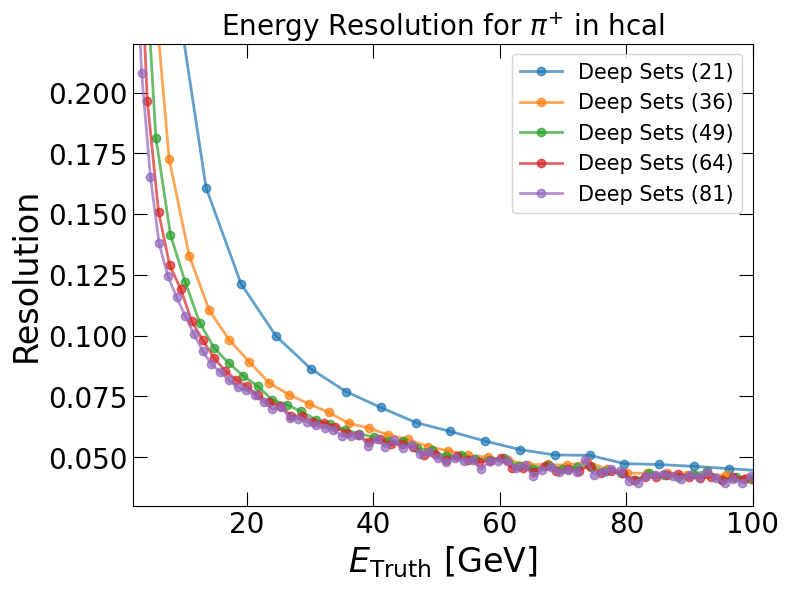

In [58]:
labels=["Deep Sets (21)","Deep Sets (36)","Deep Sets (49)","Deep Sets (64)",'Deep Sets (81)']
particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[2,100]
ylim_max=[0.03,0.22]##
draw_plot_res_scale(var_X_ds, var_Y_res_ds, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

## Compare Resolution different binning for strawman 

Strawman (21)
Strawman (36)
Strawman (49)
Strawman (64)
Strawman (81)


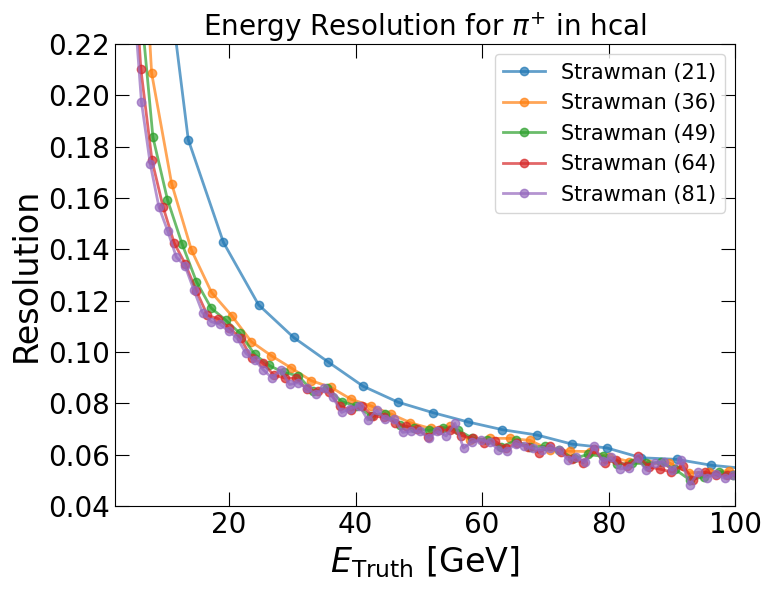

In [59]:
labels=["Strawman (21)","Strawman (36)",'Strawman (49)', 'Strawman (64)', 'Strawman (81)']
particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[2,100]
ylim_max=[0.04,0.22]
draw_plot_res_scale(var_X_straw, var_Y_res_straw, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

## Study the scale with different binning size

Deep Sets (21)
Deep Sets (36)
Deep Sets (49)
Deep Sets (64)
Deep Sets (81)


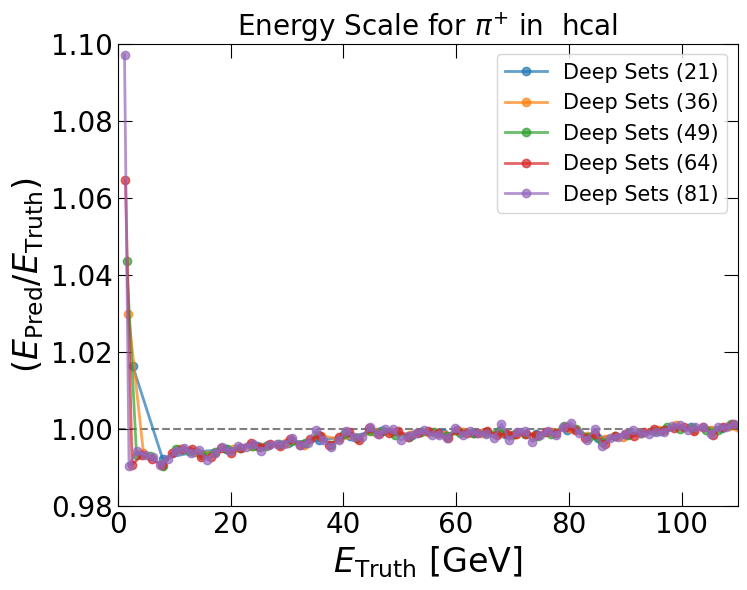

In [60]:
labels=["Deep Sets (21)","Deep Sets (36)","Deep Sets (49)","Deep Sets (64)",'Deep Sets (81)']
particle='pi+'
title='scale'
xlim_max=[0,110]
ylim_max=[0.98,1.10]
draw_plot_res_scale(var_X_ds, var_Y_scale_ds, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

Strawman (21)
Strawman (36)
Strawman (49)
Strawman (64)
Strawman (81)


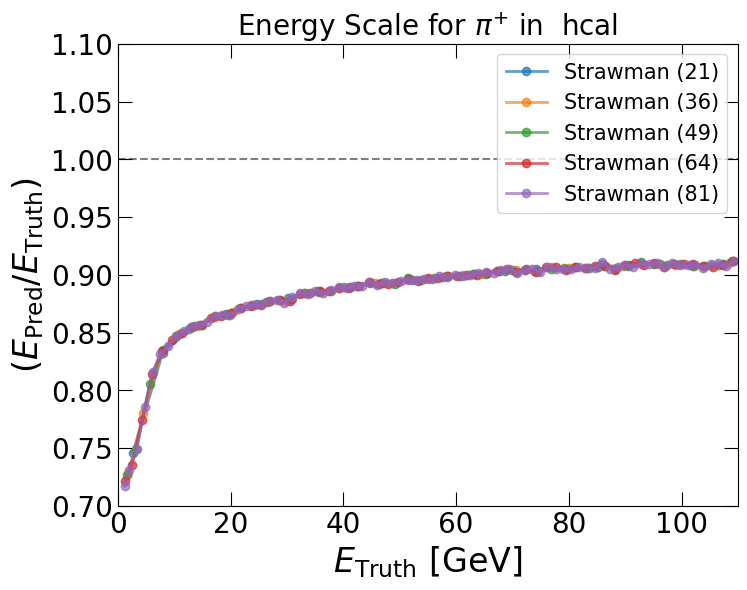

In [61]:
#labels=["Deep Sets (21)","Deep Sets (36)","Deep Sets (49)","Deep Sets (64)",'Deep Sets (81)']
labels=["Strawman (21)","Strawman (36)",'Strawman (49)', 'Strawman (64)', 'Strawman (81)']
particle='pi+'
title='scale'
xlim_max=[0,110]
ylim_max=[0.7,1.10]
draw_plot_res_scale(var_X_straw, var_Y_scale_straw, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

## Compare 150 ns vs 50 ns timing cut with 0.5*MIP cut

Strawman (150)
Strawman (50)


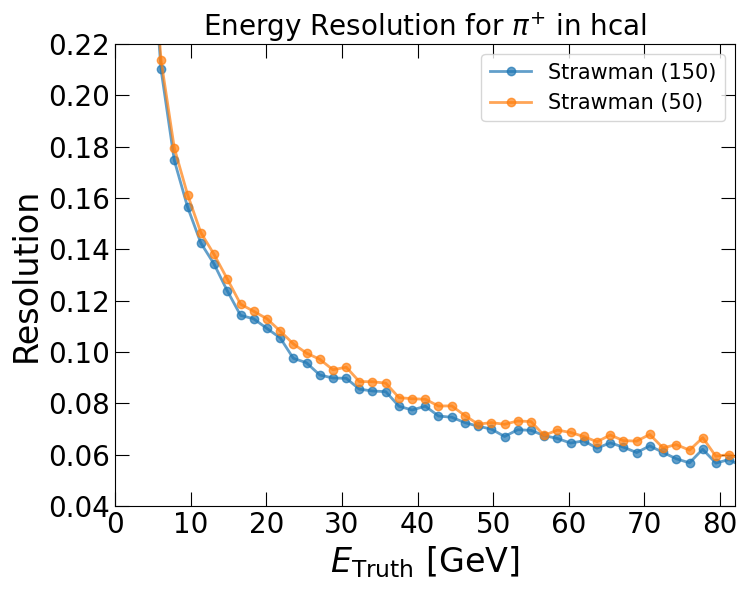

In [29]:
var_X_straw=[straw64_energy_pp_hcal_continuous,straw64_50energy_pp_hcal_continuous]



var_Y_res_straw=[straw64_res_sigma_pp_hcal_continuous, 
                 straw64_50res_sigma_pp_hcal_continuous]

labels=["Strawman (150)", 'Strawman (50)']
particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,82]
ylim_max=[0.04,0.22]
draw_plot_res_scale(var_X_straw, var_Y_res_straw, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

## Compare with CALICE data with and without correction (software compensation)
## For Pions HCAL
## FIT PARAMETERS

In [62]:
var_X=[straw64_energy_pp_hcal_continuous, ds64_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut, ene_calice_uncorr_pm,
      ene_calice_uncorr_pm]

labels=["Strawman","Deepset 4D hit",'CALICE Uncorrected', 'CALICE corrected']

var_Y_res=[straw64_res_sigma_pp_hcal_continuous, ds64_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut, 
               res_calice_uncorr_pm, res_calice_corr_pm]


           
var_Y_scale=[straw64_scale_median_pp_hcal_continuous, ds64_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut]


Strawman
Deepset 4D hit
CALICE Uncorrected
CALICE corrected


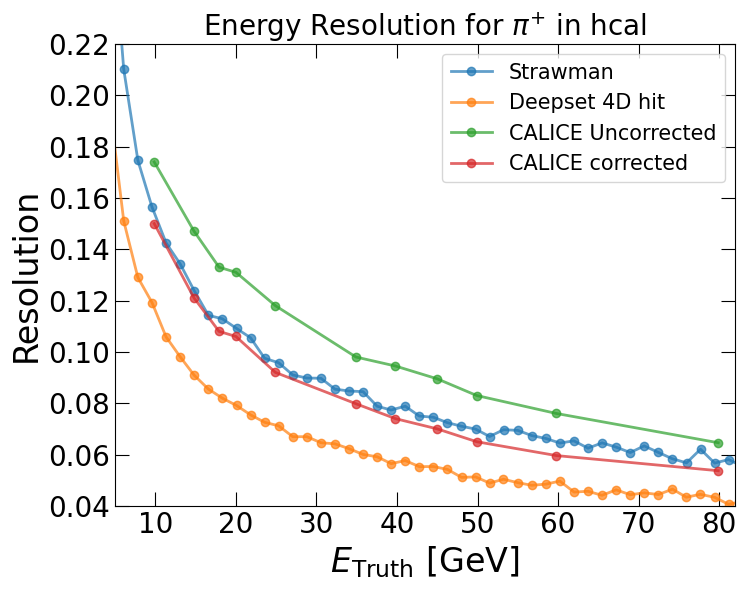

In [63]:
particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[5,82]
ylim_max=[0.04,0.22]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

## Comparsion between Strawman vs Deep Sets 
## (sigma/mean) from fit
## Pion (+) HCAL

In [64]:
var_X=[straw64_energy_pp_hcal_continuous, ds64_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut]

labels=["Strawman","Deepset 4D hit"]

#labels=["with Precision (2)","no precision"]

var_Y_res=[straw64_res_sigma_pp_hcal_continuous , 
          ds64_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut]

var_Y_scale=[straw64_scale_median_pp_hcal_continuous ,
             ds64_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut]
            

Strawman
Deepset 4D hit


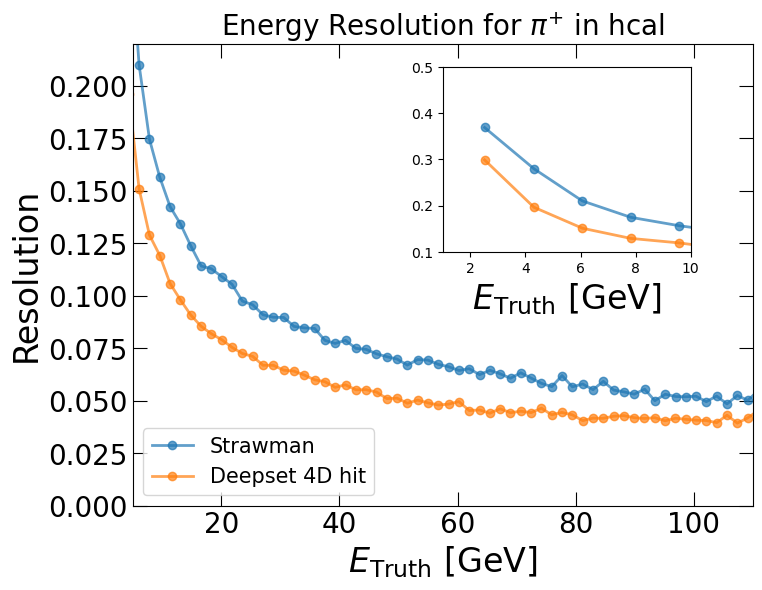

In [65]:
particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[5,110]
ylim_max=[0.0,0.22]
draw_plot_res_scale_withInset(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'lower left')

Strawman
Deepset 4D hit


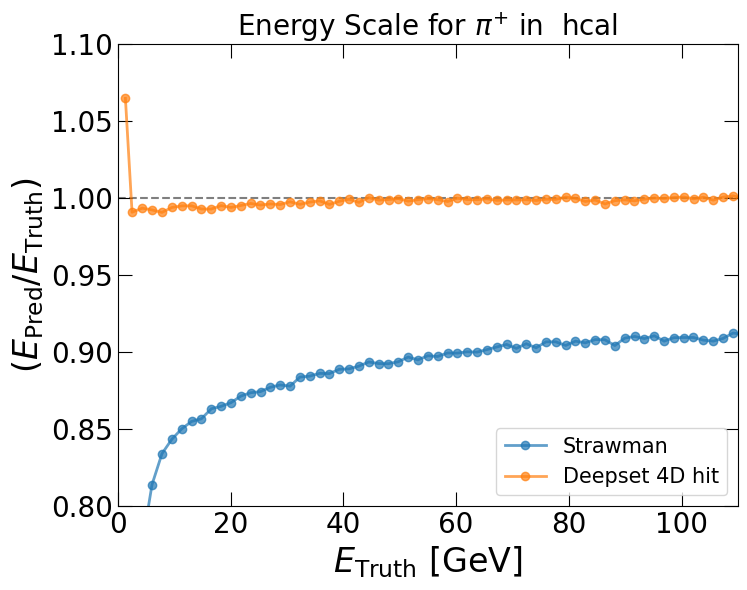

In [66]:
particle='pi+'
title='scale'
xlim_max=[0,110]
ylim_max=[0.80,1.10]
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector, 'lower right')

## HCAL , PION, 
## MSE, Vs MAE

Deep Set 4D hits (MAE)
Deep Set 4D hits (MSE)


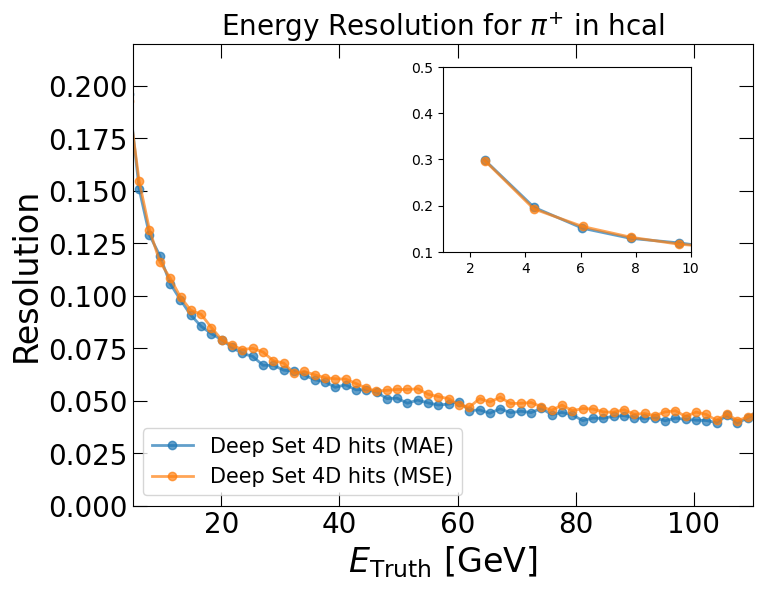

In [12]:
var_X=[ds64_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut, ds64_mse_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut]


labels=["Deep Set 4D hits (MAE)","Deep Set 4D hits (MSE)"]

#labels=["with Precision (2)","no precision"]

var_Y_res=[ds64_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut, 
          ds64_mse_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut]

var_Y_scale=[ds64_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut,
             ds64_mse_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut]

particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[5,110]
ylim_max=[0.0,0.22]
draw_plot_res_scale_withInset(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'lower left')
            

## SCALE PION, HCAL 

Deep Set 4D hits (MAE)
Deep Set 4D hits (MSE)


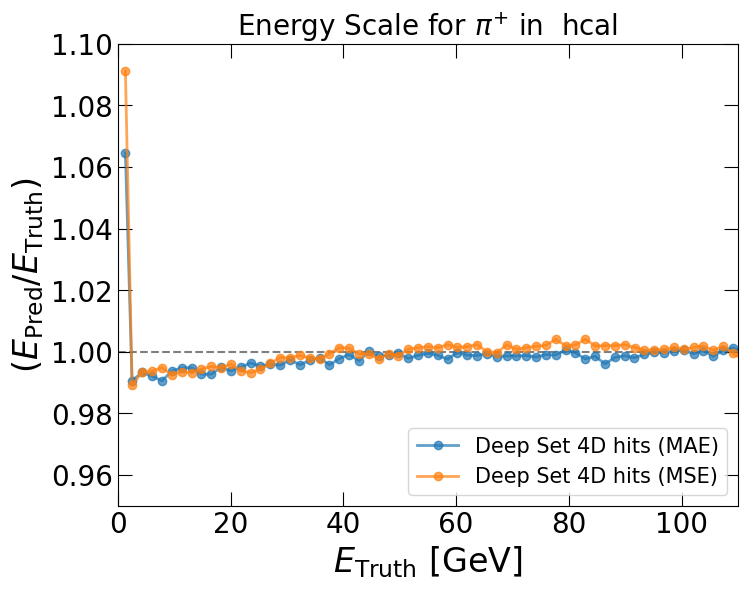

In [14]:
particle='pi+'
title='scale'
xlim_max=[0,110]
ylim_max=[0.95,1.10]
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector, 'lower right')

## For ELECTRON  Fitted paramter resoltuion HCAL
## Sigma /mean

In [75]:
var_X=[straw64_energy_ele_hcal_continuous, ds64_energy_ele_hcal_continuous_4D_L4_lre3_size64_cut]

labels=["Strawman","Deepset 4D hit"]

var_Y_res=[straw64_res_sigma_ele_hcal_continuous, ds64_res_fit_ele_hcal_continuous_4D_L4_lre3_size64_cut]

var_Y_scale=[straw64_scale_median_ele_hcal_continuous, ds64_scale_median_ele_hcal_continuous_4D_L4_lre3_size64_cut]

Strawman
Deepset 4D hit


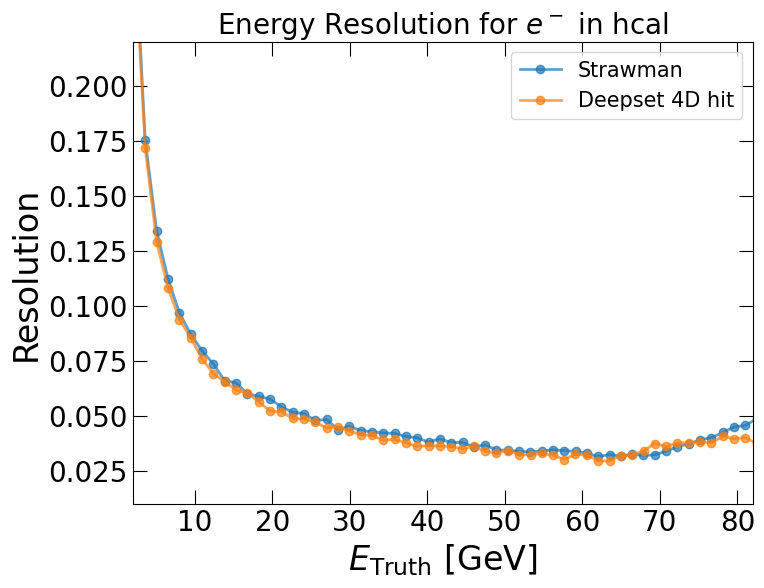

In [76]:
particle='e-'
title='resolution'
detector='hcal'
xlim_max=[2,82]
ylim_max=[0.01,0.22]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

Strawman
Deepset 4D hit


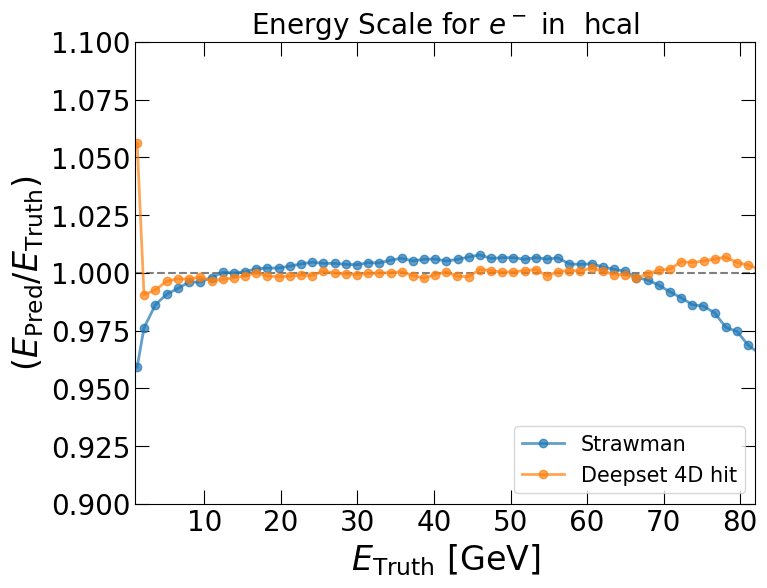

In [74]:
particle='e-'
title='scale'
xlim_max=[1,82]
ylim_max=[0.90,1.10]
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector, 'lower right')

## Hcal Insert pion fit result


In [85]:
energies_pi=[10,20,30,40,50,60,80, 100]
pi_resolutions_40W_14Fe=[ 0.19711,0.14279,0.11321,0.09973,0.08995,0.08095,0.07184,0.06634 ]


var_X=[straw64_energy_pp_hcal_insert_continuous, ds64_energy_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut,
        calice_energy_hcal_insert_pp_uncor, calice_energy_hcal_insert_pp_cor, energies_pi]

labels=["Strawman (30 W + 25 Fe)","Deepset 4D hit insert (30 W + 25 Fe)" ,
          'CALICE uncorrected (W-Fe, 2:1)', 'CALICE corrected (W-Fe, 2:1)', 'Strawman(40W + 15 Fe)',]



var_Y_res=[straw64_res_sigma_pp_hcal_insert_continuous, ds64_res_fit_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut,
           calice_res_hcal_insert_pp_uncor, calice_res_hcal_insert_pp_cor, pi_resolutions_40W_14Fe] 

var_Y_scale=[straw64_scale_median_pp_hcal_insert_continuous, ds64_scale_median_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut]



## Hcal insert resolution PION

Strawman (30 W + 25 Fe)
Deepset 4D hit insert (30 W + 25 Fe)
CALICE uncorrected (W-Fe, 2:1)
CALICE corrected (W-Fe, 2:1)
Strawman(40W + 15 Fe)


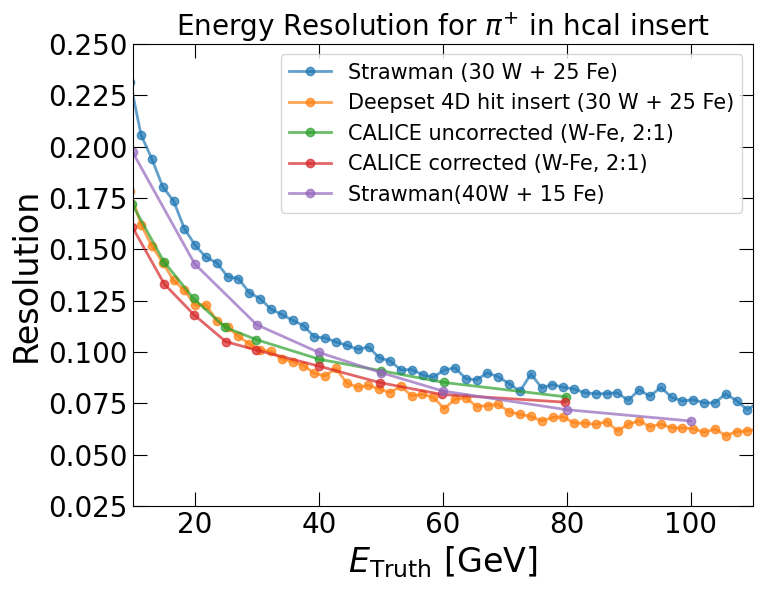

In [86]:
particle='pi+'
title='resolution'
detector='hcal insert'
xlim_max=[10,110]
ylim_max=[0.025,0.25]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

Strawman (30 W + 25 Fe)
Deep sets (30 W + 25 Fe)


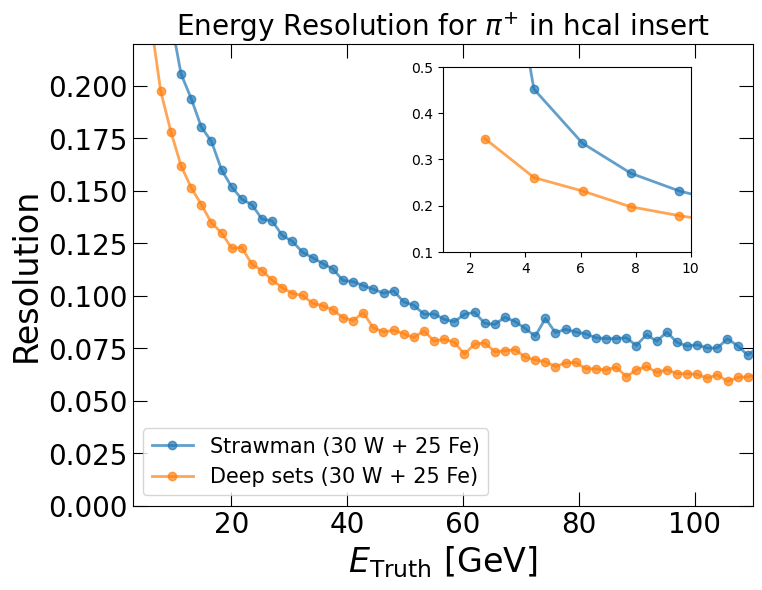

In [10]:
var_X=[straw64_energy_pp_hcal_insert_continuous, ds64_energy_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut]
      #,calice_energy_hcal_insert_pp_uncor, calice_energy_hcal_insert_pp_cor]



labels=["Strawman (30 W + 25 Fe)", 'Deep sets (30 W + 25 Fe)']

var_Y_res=[straw64_res_sigma_pp_hcal_insert_continuous, ds64_res_fit_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut]
           #,calice_res_hcal_insert_pp_uncor, calice_res_hcal_insert_pp_cor]

var_Y_scale=[straw64_scale_median_pp_hcal_insert_continuous, ds64_scale_median_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut]

particle='pi+'
title='resolution'
detector='hcal insert'
xlim_max=[3,110]
ylim_max=[0.0,0.22]
draw_plot_res_scale_withInset(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'lower left')

## Electron hcal insert pion scale

Strawman (30 W + 25 Fe)
Deep sets (30 W + 25 Fe)


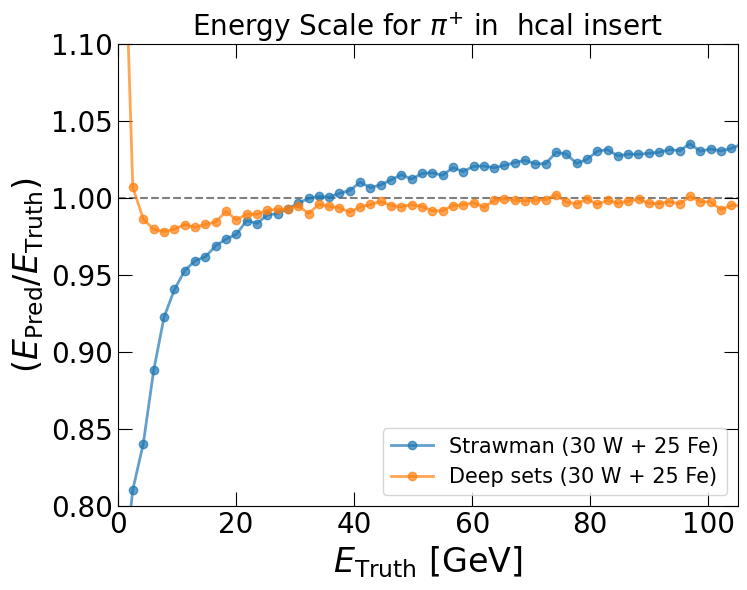

In [11]:
particle='pi+'
title='scale'
xlim_max=[0,105]
ylim_max=[0.8,1.1]
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector, 'lower right')

## This is comparsion between deepset and strawman
## with STD/median

In [ ]:

var_X=[straw64_energy_ele_hcal_continuous, ds64_energy_ele_hcal_continuous_4D_L4_lre3_size64_cut]

labels=["Strawman","Deepset 4D hit (EXYZ)"]

var_Y_res=[ straw64_res_cor_ele_hcal_continuous, ds64_res_cor_ele_hcal_continuous_4D_L4_lre3_size64_cut]# straw_res_sigma_ele_hcal_continuous
      #straw_res_cor_pp_hcal_insert_continuous     
var_Y_scale=[straw64_scale_median_ele_hcal_continuous, ds64_scale_median_ele_hcal_continuous_4D_L4_lre3_size64_cut]

#ds_res_fit_ele_hcal_continuous_4D_L4_lre3_size64_cut




## For Electron STD/Median

In [ ]:
particle='e-'
title='resolution'
xlim_max=[0,110]
ylim_max=[0,0.3]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

In [ ]:
## Scale Electron Median

In [ ]:
particle='e-'
title='scale'
xlim_max=[0,95]
ylim_max=[0.8,1.1]
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')

## std and median hcal insert pp

In [42]:
var_X=[straw_energy_pp_hcal_insert_continuous, ds_energy_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut]

labels=["Strawman","Deepset 4D hit (EXYZ) insert"]

  
var_Y_res=[straw_res_cor_pp_hcal_insert_continuous, ds_res_cor_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut]
           
var_Y_scale=[straw_scale_median_pp_hcal_insert_continuous, ds_scale_median_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut]

In [43]:
particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[10,110]
ylim_max=[0.0,0.52]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector)


TypeError: draw_plot_res_scale() missing 1 required positional argument: 'legend_position'

## Pion compare strawman vs deepset output 
## (STD /median)
## RESOLUTION

In [ ]:

var_X=[straw64_energy_pp_hcal_continuous, ds64_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut]

labels=["Strawman","Deepset 4D hit (EXYZ)"]

var_Y_res=[straw64_res_cor_pp_hcal_continuous, ds64_res_cor_pp_hcal_continuous_4D_L4_lre3_size64_cut]

var_Y_scale=[straw64_scale_median_pp_hcal_continuous, ds64_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut]

particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,110]
ylim_max=[0.0,0.22]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'upper right')


## Pion compare strawman vs deepset output 
## (STD /median)
## SCALE

In [ ]:
particle='pi+'
title='scale'
xlim_max=[0,110]
ylim_max=[0.80,1.10]
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector, 'lower right')

## Compare the ratio of straw/ds for hcal and insert (ratio of resolution )

In [ ]:
##
straw_ds_pp_ratio_hcali= [straw_res_sigma_pp_hcal_insert_continuous[i] / ds_res_fit_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut[i] for i in range(len(ds_res_fit_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut))]

straw_ds_pp_ratio_hcal= [straw_res_sigma_pp_hcal_continuous[i] / ds_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut[i] for i in range(len(ds_res_fit_pp_hcal_insert_continuous_4D_L4_lre3_size64_cut))]
#print(straw_ds_pp_ratio_hcali)

In [ ]:
plt.errorbar(straw_energy_pp_hcal_insert_continuous, straw_ds_pp_ratio_hcali, label='hcal insert',linestyle='None',marker='o')
plt.errorbar(straw_energy_pp_hcal_continuous, straw_ds_pp_ratio_hcal, label='hcal', linestyle='None',marker='o')
plt.ylabel(r'$\frac{Res_{straw}}{Res_{deep set}}$', fontsize=25)
plt.title('Ratio of strawman vs deep set')
#plt.xlim(10,100)
plt.ylim(0.80, 2.0)
plt.xlabel("$E_{Truth}$ (GeV)", fontsize=25)
plt.legend()

## MSE Vs MAE Loss for pi(+) with 4D hits

In [ ]:
var_X=[straw_energy_pp_hcal_continuous, ds_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut,
      ds_mse_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut]

labels=["Strawman","Deepset (MAE)", "Deepset (MSE)"]

var_Y_res=[straw_res_sigma_pp_hcal_continuous, ds_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut, 
          ds_mse_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut] 

var_Y_scale=[straw_scale_median_pp_hcal_continuous, ds_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut,
            ds_mse_scale_median_pp_hcal_continuous_4D_L4_lre3_size64_cut]

In [ ]:
particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[10,110]
ylim_max=[0.0,0.3]
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector,'upper right')


## Compare "1D" "2D", ..."4D" Electron deepset parameters

In [ ]:
var_X=[straw_energy_ele_hcal_continuous, ds_energy_ele_hcal_continuous_1D_L4_lre3_size64,
      ds_energy_ele_hcal_continuous_2D_L4_lre3_size64, ds_energy_ele_hcal_continuous_3D_L4_lre3_size64,
      ds_energy_ele_hcal_continuous_4D_L4_lre3_size64]

labels=["Strawman","1D hit (E)", "2D hit (EZ)","3D hit (EXZ)","4D hit (EXYZ)"]

var_Y_res=[straw_res_std_median_ele_hcal_continuous, 
           ds_res_std_median_ele_hcal_continuous_1D_L4_lre3_size64,
          ds_res_std_median_ele_hcal_continuous_2D_L4_lre3_size64, 
           ds_res_std_median_ele_hcal_continuous_3D_L4_lre3_size64,
          ds_res_std_median_ele_hcal_continuous_4D_L4_lre3_size64]



var_Y_scale=[straw_scale_median_ele_hcal_continuous,
             ds_scale_median_ele_hcal_continuous_1D_L4_lre3_size64,
            ds_scale_median_ele_hcal_continuous_2D_L4_lre3_size64, 
             ds_scale_median_ele_hcal_continuous_3D_L4_lre3_size64,
            ds_scale_median_ele_hcal_continuous_4D_L4_lre3_size64]

In [ ]:
particle='e-'
title='resolution'
xlim_max=110
ylim_max=0.3
draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector)

In [ ]:
title='scale'
xlim_max=95
ylim_max=1.1
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector)


## Pion (+) energy response comparsion

In [ ]:
particle='pp'
#straw_res_sigma_pp_hcal_2M=np. array([0.28, 0.23, 0.21, 0.14, 0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.05])
straw_res_std_median_pp_hcal_2M_50=np. array([0.54, 0.4 , 0.33, 0.21, 0.17, 0.16, 0.13, 0.12, 0.13, 0.12, 0.13])
straw_energy_pp_hcal_2M=np. array([  1.,   2.,   3.,   6.,  10.,  15.,  25.,  39.,  63., 100., 158.])

straw_scale_median_pp_hcal_2M=np. array([0.9 , 0.94, 0.97, 1.  , 1.01, 1.02, 1.02, 1.01, 1.01, 1.  , 0.98])
#straw_scale_median_pp_hcal_2M_50=np. array([0.75, 0.77, 0.77, 0.85, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.91])



title='resolution'
xlim_max=110
ylim_max=0.3
#straw_energy_pp_hcal_continuous
#straw_res_std_median_pp_hcal_continuous
#straw_scale_median_pp_hcal_continuous
var_X=[ straw_energy_pp_hcal_2M, ds_energy_pp_hcal_continuous_1D_L4_lre3_size64,
      ds_energy_pp_hcal_continuous_2D_L4_lre3_size64, ds_energy_pp_hcal_continuous_3D_L4_lre3_size64,
      ds_energy_pp_hcal_continuous_4D_L4_lre3_size64]

labels=["Strawman","1D hit (E)", "2D hit (EZ)","3D hit (EXZ)","4D hit (EXYZ)"]

var_Y_res=[straw_res_std_median_pp_hcal_2M_50, 
           ds_res_std_median_pp_hcal_continuous_1D_L4_lre3_size64,
          ds_res_std_median_pp_hcal_continuous_2D_L4_lre3_size64, 
           ds_res_std_median_pp_hcal_continuous_3D_L4_lre3_size64,
          ds_res_std_median_pp_hcal_continuous_4D_L4_lre3_size64]



var_Y_scale=[straw_scale_median_pp_hcal_2M,
             ds_scale_median_pp_hcal_continuous_1D_L4_lre3_size64,
            ds_scale_median_pp_hcal_continuous_2D_L4_lre3_size64, 
             ds_scale_median_pp_hcal_continuous_3D_L4_lre3_size64,
            ds_scale_median_pp_hcal_continuous_4D_L4_lre3_size64]

'''
var_X=[straw_energy_pp_hcal_2M, ds_energy_pp_hcal_1D, ds_energy_pp_hcal_2D,ds_energy_pp_hcal_3D,ds_energy_pp_hcal_4D]

labels=["Strawman","1D hit (E)", "2D hit (EZ)","3D hit (EXZ)","4D hit (EXYZ)"]

var_Y_res=[straw_res_std_median_pp_hcal_2M_50, ds_res_std_median_pp_hcal_1D , ds_res_std_median_pp_hcal_2D, \
          ds_res_std_median_pp_hcal_3D, ds_res_std_median_pp_hcal_4D]



var_Y_scale=[straw_scale_median_pp_hcal_2M, ds_scale_median_pp_hcal_1D, ds_scale_median_pp_hcal_2D, \
             ds_scale_median_pp_hcal_3D, ds_scale_median_pp_hcal_4D]

'''

draw_plot_res_scale(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector)


In [ ]:
title='scale'
xlim_max=[0,110]
ylim_max=[0.9,1.1
draw_plot_res_scale(var_X, var_Y_scale, labels, title,  xlim_max, ylim_max, particle, detector)


## Compare the energy response for the hcal 

/home/bishnu/miniconda3/envs/use_tensorflow/lib/python3.10/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):
2023-05-08 22:58:38.126716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 22:58:38.709060: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bishnu/Library/root/lib:/usr/local/lib:/usr/local/lib:/usr/local/cuda-11.8/lib64
2023-05-08 22:58:38.70911

I am uniform
64


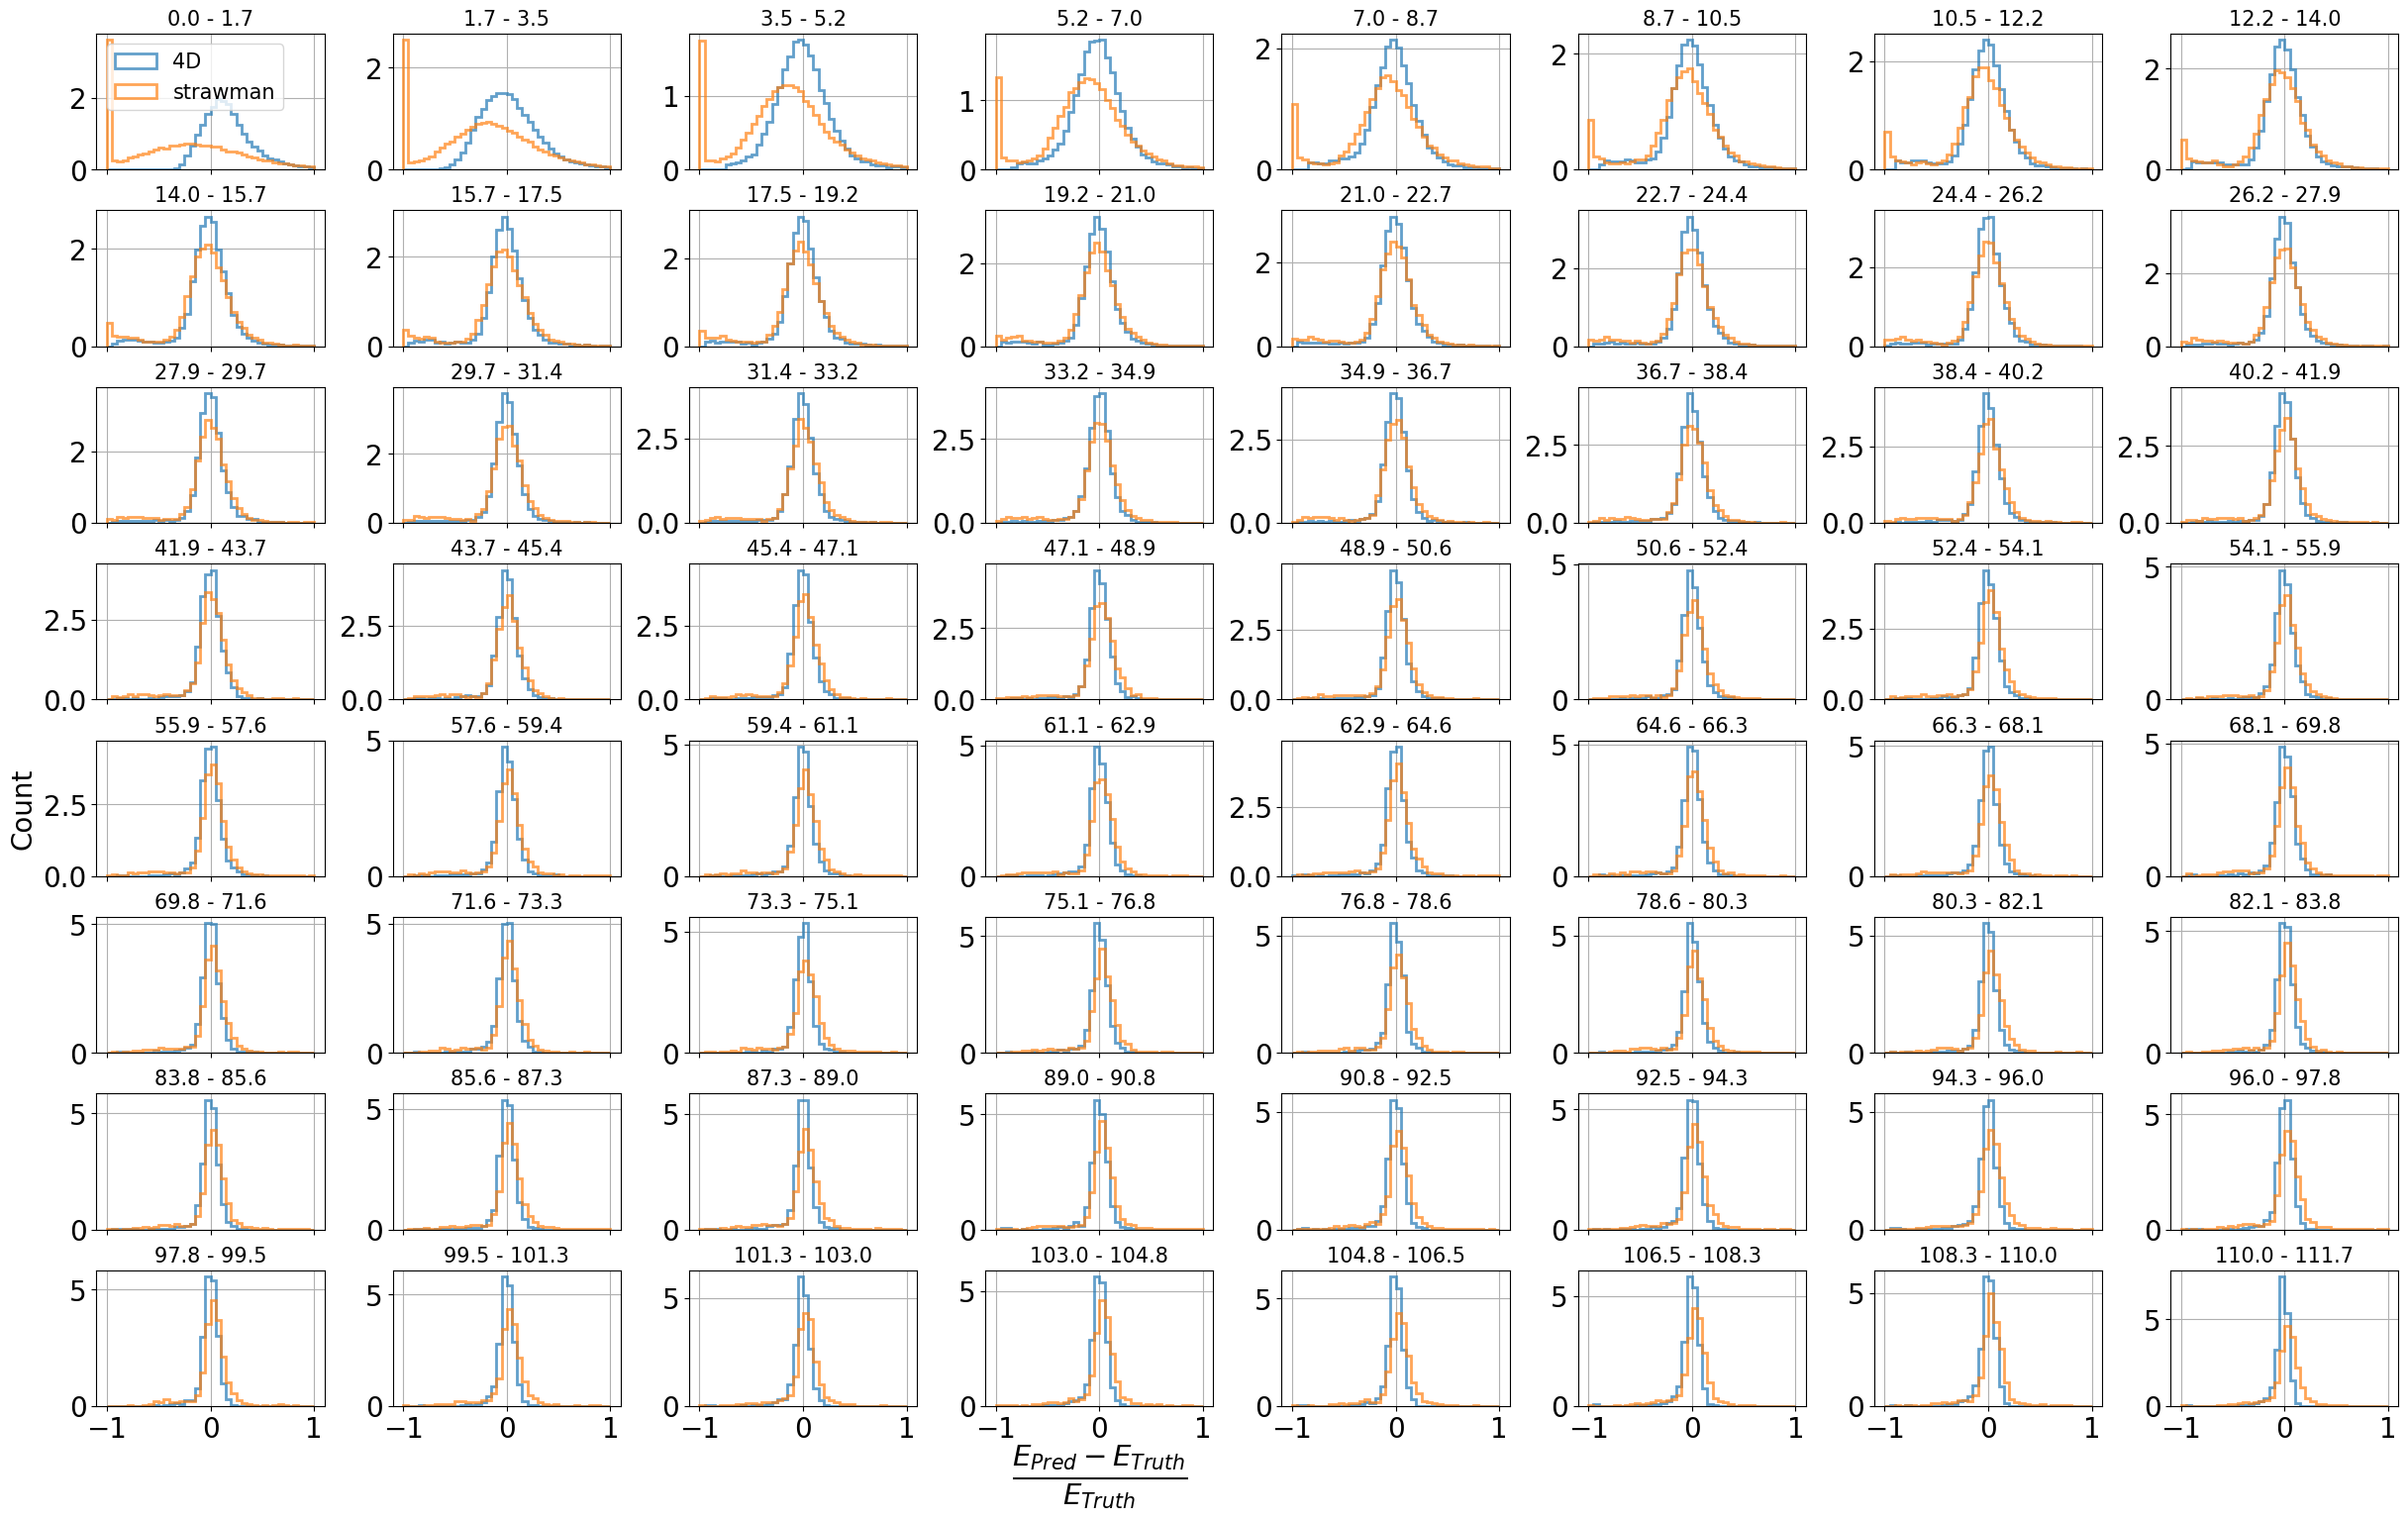

In [1]:
#import plotting*
from plotting import *
output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets'
output_straw='/home/bishnu/EIC/output_reg_dnn_straw/strawman_fit_slices_Final'
#strawman_slices='/home/bishnu/EIC/output_reg_dnn_straw/strawman_fit_slices_Final/pred_straw_e-_hcal_continuous.csv'

#files_truth=[f'{output_path}/true_DeepSets_pi+_hcal_continuous_4D_L4_lre3_size64_cut.csv']
particle='pp'
detector='hcal_insert'
approach=["DeepSets"]*4 #+ ['strawman']*1
labels=['4D' , 'strawman']#, '2D', '3D', '4D', 'strawman']      ## Input features
data_type='continuous'
files_pred_true=[f'{output_path}/pred_true_DeepSets_{particle}_{detector}_continuous_4D_L4_lre3_size64_cut.csv',
                f'{output_straw}/pred_true_strawman_{particle}_{detector}_continuous.csv']


    
nbins=40
min_val=0
max_val=110
Nbins=65
binning=np.linspace(min_val, max_val, Nbins)

compare_energy_response_E_over_pred(files_pred_true, binning, data_type,particle,detector, 
                                    labels,slices_individual=True, ylogscale=False)


## Compare with Strawman and Deesets prediction plots (pions)

In [ ]:
output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets'
strawman_slices='/home/bishnu/EIC/output_reg_dnn_straw/strawman_fit_slices_Final/pred_straw_e-_hcal_continuous.csv'
files=[f'{output_path}/pred_DeepSets_ele_hcal_continuous_1D_L4_lre3_size64.csv',
       f'{output_path}/pred_DeepSets_ele_hcal_continuous_2D_L4_lre3_size64.csv',
       f'{output_path}/pred_DeepSets_ele_hcal_continuous_3D_L4_lre3_size64.csv',
       f'{output_path}/pred_DeepSets_ele_hcal_continuous_4D_L4_lre3_size64.csv',
          strawman_slices]
particle='ele'
detector='hcal'
approach=["DeepSets"]*4 #+ ['strawman']*1
labels=['1D' , '2D', '3D', '4D', 'strawman']      ## Input features
data_type='continuous'



nbins=40

compare_energy_response_lo(files, labels, data_type,particle,detector, slices_individual=True, ylogscale=True)


## Pions

In [ ]:
strawman_slices='/home/bishnu/EIC/output_reg_dnn_straw/strawman_fit_slices_Final/strawman_pred_hcal_pi+_continuous_cut.csv'
files=[f'{output_path}/pred_DeepSets_pi+_hcal_continuous_1D_L4_lre3_size64.csv',
       f'{output_path}/pred_DeepSets_pi+_hcal_continuous_2D_L4_lre3_size64.csv',
       f'{output_path}/pred_DeepSets_pi+_hcal_continuous_3D_L4_lre3_size64.csv',
       f'{output_path}/pred_DeepSets_pi+_hcal_continuous_4D_L4_lre3_size64.csv',
          strawman_slices]
particle='pi+'
detector='hcal'
approach=["DeepSets"]*4 #+ ['strawman']*1
labels=['1D' , '2D', '3D', '4D', 'strawman']      ## Input features
data_type='continuous'



nbins=40

compare_energy_response_lo(files, labels, data_type,particle,detector, slices_individual=True, ylogscale=True)


In [203]:
path="/home/bishnu/EIC/output_reg_dnn_straw/DeepSets"
cluster_sum, genP= read_root_files_chain('hcal', 2)
print(len(cluster_sum),'cccc.   ', len(genP))

min_val=0
max_val=110
Nbins=37
binning=np.linspace(min_val, max_val, Nbins)

nbins=80
particle='pi+'
data_type='continuous'



resolution_fit, pred_over_truth_fit, true_fit,slices_fit,resolution_scale_corr_median, median_scale_fit,slices_pred_truth,\
    res_std_median, res_sigma_median =get_res_scale_fit_log10_log2(genP,cluster_sum, binning, nbins, data_type, particle)


name_tag='straw_'   
particle_detector=f'{particle}_{detector}_{data_type}'

#print_parameter(truth, name_tag +'truth', particle_detector )
#print_parameter(prediction, name_tag +'prediction', particle_detector )


print_parameter(true_fit, name_tag +'energy',particle_detector ) 
print_parameter(resolution_scale_corr_median, name_tag+'res_cor',particle_detector  )
#print_parameter(pred_over_truth_fit, name_tag +'scale_fit', particle_detector ) 
print_parameter(resolution_fit, name_tag +'res_sigma', particle_detector ) 
print_parameter(res_std_median, name_tag +'res_std_median', particle_detector ) 
print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
print_parameter(median_scale_fit, name_tag +'scale_median', particle_detector )
#ClusterSum_vs_GenP(cluster_sums,genP, path, take_log10)
#plt.hist(combined_thetas)

IndentationError: unexpected indent (1141413407.py, line 81)

In [15]:
ath}:events')
#arrays=events.arrays()

"\ntime =ur_tree.array(f'{detector_name}.time',entrystart=entry_start, entrystop=entry_stop)\nmask=(hit_e_raw>MIP_TH)  & (time<time_TH) & (hit_e_raw<1e10)\nhit_e=hit_e_raw[mask]\nmask_theta=(theta> THETA_MIN)  & (theta < THETA_MAX)\n\nroot_cluster_hcali_raw = ak.sum(hit_e, axis=-1)\nroot_cluster_sum_hcali_temp = ak.to_numpy(root_cluster_hcali_raw)\ncluster_sum=np.divide(root_cluster_sum_hcali_temp,sampling_fraction)\n"

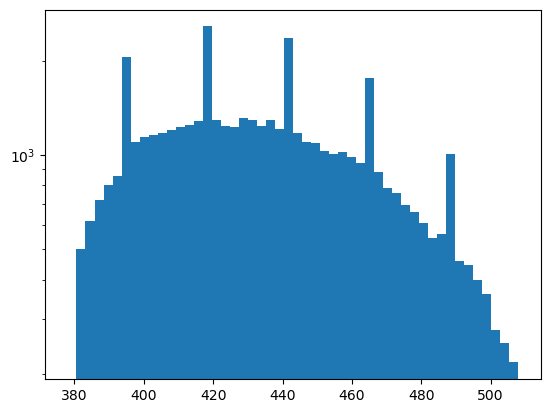

In [28]:
zmin=378
zmax=zmin+ 130
plt.hist(ak.flatten(PosRecoZ), bins=50, range=(zmin,zmax))
plt.yscale('log')

(array([7192., 1763., 1040.,  739.,  602.,  476.,  393.,  375.,  338.,
         286.]),
 array([  1.01050157,  14.09199341,  27.17348526,  40.2549771 ,
         53.33646894,  66.41796078,  79.49945262,  92.58094446,
        105.6624363 , 118.74392815, 131.82541999]),
 <BarContainer object of 10 artists>)

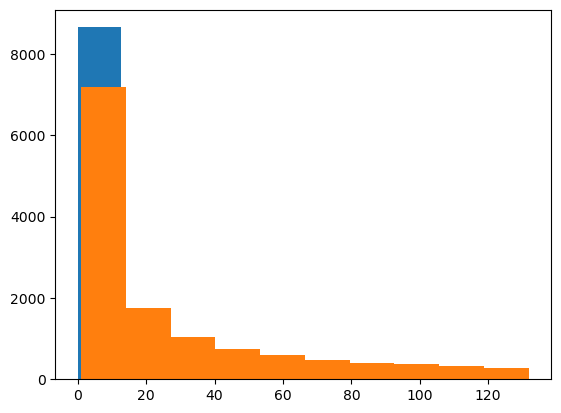

In [2]:
name_tag=f'straw{glob_Nbin}_'   
    particle_detector=f'{particle}_{detector}_{data_type}'
    
    #print_parameter(truth, name_tag +'truth', particle_detector )
    #print_parameter(prediction, name_tag +'prediction', particle_detector )
    
    
    print_parameter(true_fit, name_tag +'energy',particle_detector ) 
    print_parameter(resolution_scale_corr_median, name_tag+'res_cor',particle_detector  )
    #print_parameter(pred_over_truth_fit, name_tag +'scale_fit', particle_detector ) 
    print_parameter(resolution_fit, name_tag +'res_sigma', particle_detector ) 
    print_parameter(res_std_median, name_tag +'res_std_median', particle_detector ) 
    print_parameter(res_sigma_median, name_tag +'res_sigma_median', particle_detector )
    print_parameter(median_scale_fit, name_tag +'scale_median', particle_detector )
    
    
 
    

    df = pd.DataFrame(slices_fit)
    df.to_csv(f'{output_path}/pred_strawman_{particle_detector}.csv', index=False)         
    
    
    df_straw_truth = pd.DataFrame(slices_pred_truth)
    df_straw_truth.to_csv(f'{output_path}/pred_true_strawman_{particle_detector}.csv', index=False)
plt.hist(cluster_sum)
plt.hist(gen_energy)

ValueError: axis out of range for flatten

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.2/src/libawkward/array/NumpyArray.cpp#L1674)

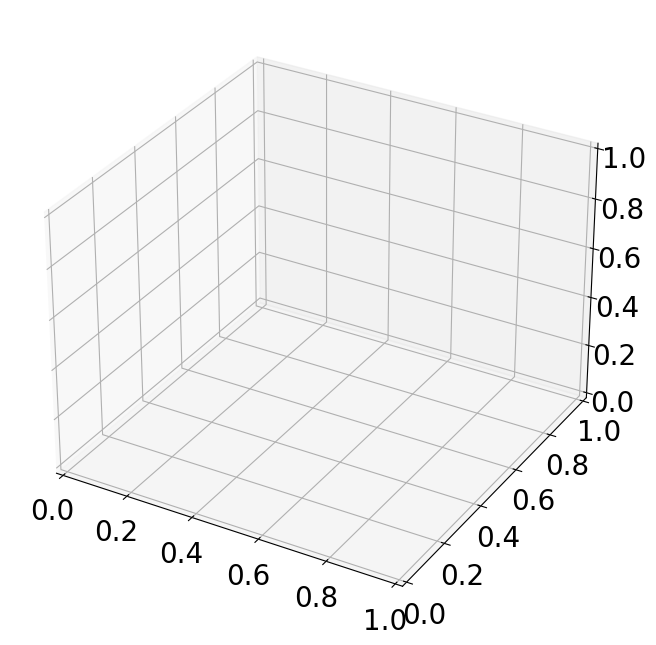

In [39]:

#fig,ax = plt.subplots(figsize=(30, 18))#,sharex=True, sharey=False)
my_cmap = plt.get_cmap('viridis')
inferno =  plt.get_cmap('inferno')
#hit_e_raw, PosRecoY

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
#scat=ax.scatter3D(ak.flatten(PosRecoX),ak.flatten(PosRecoZ), ak.flatten(PosRecoY),  c=ak.flatten(hit_e_raw), 
#             cmap='viridis', norm=LogNorm())#, vmin = 0.1,marker ='H')

hit_e=ak.flatten(hit_e_raw)
'''
sctt = ax.scatter3D(PosRecoZ,  PosRecoX, PosRecoY,
                    alpha = 0.8,
                    c = hit_e/MIP,
                    s=4*hit_e,
                    cmap = my_cmap,
                    norm= matplotlib.colors.LogNorm(vmin=0.08, vmax=200),
                    marker ='H')
'''
sctt = ax.scatter3D(ak.flatten(PosRecoZ),  ak.flatten(PosRecoX), ak.flatten(PosRecoY),
                    alpha = 0.8,
                    c = ak.flatten(hit_e)/MIP,
                    s=4*hit_e,
                    cmap = my_cmap,
                    norm= matplotlib.colors.LogNorm(vmin=0.08, vmax=200),
                    marker ='H')

cb = fig.colorbar(sctt, ax = ax, shrink = .7, aspect = 14)
cb.set_label("Hit energy [MIP]")
plt.tight_layout()
fig.savefig('plots/shower_3d_view%i.pdf'%(event))
plt.show()
 

## Hits on ECAL and HCAL 

In [8]:
path='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_10k_17deg_ECAL_1/'
#log10_pi+_100_10k_2.83deg_ECAL_1/'
#path='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_Uniform_0-140Gev_17deg_1/'
nbins=40
detector='hcal'
data_type='continuous'
particle='pi+'
min_val=0
max_val=110
Nbins=37
particle='pp'
data_type='continuous'
fit_dist=False
binning=np.linspace(min_val, max_val, Nbins)

def get_cluster_sum_from_hits(data_dir, detector, start, total_files):
    
    cluster_sums=[]
    if detector=="hcal":
        detector_name = "HcalEndcapPHitsReco"
        sampling_fraction=0.0224 

    elif detector=="hcal_insert":
        detector_name= "HcalEndcapPInsertHitsReco"
        sampling_fraction=0.0089

    elif detector =='ecal':
        detector_name= "EcalEndcapPHitsReco"
        sampling_fraction=1.
    else:
        print("Please make sure you have picked right detector name")     
        print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")
        
    root_files_total = np.sort(glob.glob(data_dir+'*root'))
    file_list=root_files_total[start:total_files]
    
    ur_tree=ur.open(file_num)['events']
    num_entries=ur_tree.numentries    
    hit_raw =ur_tree.array(f'{detector_name}.energy')
    time =ur_tree.array(f'{detector_name}.time')
    mask=(hit_raw>MIP_TH)  & (time<time_TH) & (hit_raw<1e10)
    hit_e=hit_raw[mask]
    hit_e=ak.flatten(hit_e)
    return hit_e
hit_e_hcal= get_cluster_sum_from_hits(path, 'hcal',  0, 1)
hit_e_ecal= get_cluster_sum_from_hits(path, 'ecal',  0, 1)

plt.hist(ak.flatten(hit_e_hcal), bins=50, label='Hcal', alpha=0.99, histtype='step', range=(0,1))
plt.hist(ak.flatten(hit_e_ecal), bins=50, label='Ecal',  histtype='step', alpha=0.99, range=(0,1))
plt.yscale('log')
plt.xlabel('Cell Energy [GeV]')
plt.legend()

NameError: name 'file_num' is not defined

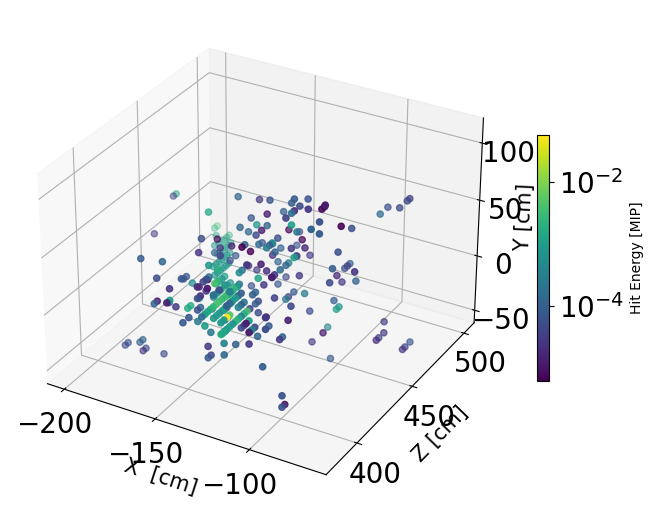

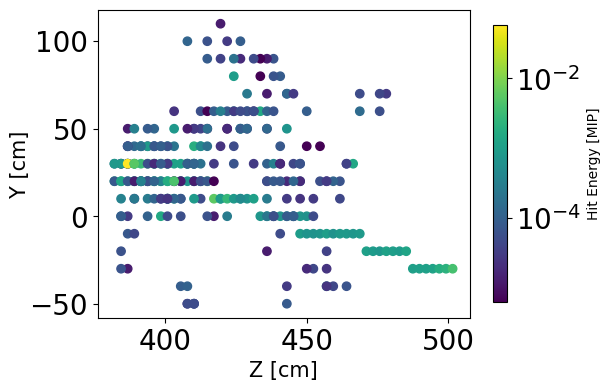

In [18]:
import numpy as np


# Create a 3D scatter plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
scat=ax.scatter3D(ak.flatten(PosRecoX),ak.flatten(PosRecoZ), ak.flatten(PosRecoY),  c=ak.flatten(hit_e_raw), 
             cmap='viridis', norm=LogNorm())#, vmin = 0.1,marker ='H')
#ax.scatter(ak.flatten(PosRecoX), ak.flatten(PosRecoY))
ax.set_xlabel('X  [cm]',fontsize=15)
ax.set_ylabel('Z [cm]',fontsize=15)
ax.set_zlabel('Y [cm]', fontsize=15,labelpad=-0.5)
#cbar.ax.set_ylabel('Energy')
# add a colorbar
cbar = plt.colorbar(scat, shrink=0.4)
cbar.set_label('Hit Energy [MIP]')

#fig.colorbar(scat, shrink=0.4)
plt.show()




# Create a 3D scatter plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
scat=ax.scatter(ak.flatten(PosRecoZ), ak.flatten(PosRecoY),  c=ak.flatten(hit_e_raw), 
             cmap='viridis', norm=LogNorm())#, vmin = 0.1,marker ='H')
#ax.scatter(ak.flatten(PosRecoX), ak.flatten(PosRecoY))
#ax.set_xlabel('X Position (cm)')
ax.set_xlabel('Z [cm]', fontsize=15)
ax.set_ylabel('Y [cm]',fontsize=15, labelpad=-0.5)
#cbar.ax.set_ylabel('Energy')
# add a colorbar
cbar = plt.colorbar(scat, shrink=0.9)
cbar.set_label('Hit Energy [MIP]')

#fig.colorbar(scat, shrink=0.4)
plt.show()

In [ ]:
plt.hist2d(theta, cluster_sum)

In [ ]:


straw_truth_ele_hcal_continuous=np. array([ 2.36,  6.64, 11.35, 15.98, 20.63, 25.25, 29.83, 34.46, 39.08,
       43.71, 48.25, 52.85, 57.49, 62.05, 66.61, 71.27, 75.88, 80.47, 85.04, 89.65])
straw_prediction_ele_hcal_continuous=np. array([ 2.04,  6.45, 11.27, 15.93, 20.65, 25.26, 29.92, 34.58, 39.23,
       43.93, 48.53, 53.11, 57.71, 62.15, 66.42, 70.58, 74.49, 78.06, 81.25, 84.3 ])



straw_truth_pp_hcal_continuous=np. array([  2.37,   6.63,  11.35,  15.99,  20.61,  25.22,  29.83,  34.45,
        39.04,  43.68,  48.28,  52.88,  57.5 ,  62.11,  66.65,  71.27, 75.87,  80.51,  85.1 ,  89.67])
straw_prediction_pp_hcal_continuous=np. array([ 1.47,  5.28,  9.46, 13.53, 17.64, 21.79, 25.97, 30.14, 34.27,
       38.46, 42.55, 46.68, 51.16, 55.48, 59.71, 63.66, 68.08, 72.62,
       76.76, 80.68])
'''

straw_truth_pp_hcal_continuous=np. array([  2.37,   6.63,  11.35,  15.99,  20.61,  25.22,  29.83,  34.45,
        39.04,  43.68,  48.28,  52.88,  57.5 ,  62.11,  66.65,  71.27, 75.87,  80.51,  85.1 ,  89.67])

straw_prediction_pp_hcal_continuous=np. array([ 1.47,  5.28,  9.46, 13.53, 17.64, 21.79, 25.97, 30.14, 34.27,
       38.46, 42.55, 46.68, 51.16, 55.48, 59.71, 63.66, 68.08, 72.62, 76.76])
'''
ratio_eh=np.divide(straw_prediction_ele_hcal_continuous, straw_prediction_pp_hcal_continuous)
print(ratio_eh)
print(straw_truth_ele_hcal_continuous.size, '   ', straw_prediction_ele_hcal_continuous.size)
print(straw_truth_pp_hcal_continuous.size, '   ', straw_prediction_pp_hcal_continuous.size)


## Linearity of HCAL

In [ ]:
def linear_fit(xl,slope,intercept):
    return (slope*xl)+intercept
size_xlabels=40
xlim_min=5
xlim_max=82
params = {'legend.fontsize': '20',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':size_xlabels,
         'ytick.labelsize':size_xlabels,
         'axes.labelsize': size_xlabels,
         'axes.titlesize': size_xlabels}
#plt.rc_params[axis='y', which='both')
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update(params)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 2


plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 2


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#fig,(ax,ax1) = plt.subplots(2,1,figsize=(16, 12),gridspec_kw={'height_ratios': [2.5, 1.5]},sharex=True)
fig,(ax,ax1) = plt.subplots(2,1,figsize=(15, 12),gridspec_kw={'height_ratios': [3, 1]},sharex=True)
ax.errorbar(straw_truth_pp_hcal_continuous, straw_prediction_pp_hcal_continuous,color="red",alpha=0.5,marker='o',
            linestyle='None',markersize=15,label='$\pi^{-}$')

ax.errorbar(straw_truth_ele_hcal_continuous,straw_prediction_ele_hcal_continuous ,color="blue",alpha=0.5,
            marker='o',linestyle='None',markersize=15,label='$e^{-}$')
ax.set_ylabel('Energy [GeV]', fontsize=30)
ax.set_xlabel('Energy (GeV) ', fontsize=30)


#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.set_ylim(0,3500)
ax.set_xlim(xlim_min,xlim_max)
#ax.set_title("Fe-AHCAL ($\pi^-$)")

ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(2))   
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)
#ax.set_title(thickness_description)



popt_pi,_popcov=curve_fit(linear_fit,straw_truth_pp_hcal_continuous , straw_prediction_pp_hcal_continuous ,
                          p0=[0,25],bounds=(0,101))

popt_e,_popcov=curve_fit(linear_fit,straw_truth_ele_hcal_continuous,straw_prediction_ele_hcal_continuous,p0=[0,10],bounds=(0,101))
c1=popt_pi[1]


ax.plot(straw_truth_pp_hcal_continuous,linear_fit(straw_truth_pp_hcal_continuous,*popt_pi),color='r',linewidth='4',\
        linestyle=(0,(1,1)))


ax.plot(straw_truth_ele_hcal_continuous, linear_fit(straw_truth_ele_hcal_continuous,*popt_e),color='b',linewidth='4',\
        linestyle='dashed')

ax1.plot(straw_truth_pp_hcal_continuous,ratio_eh,marker='s',markersize='15',color='r',linestyle='None')
ax1.set_ylim(0.9,1.4)
ax.set_xlim(xlim_min,xlim_max)

#ax1.yaxis.set_major_locator(MultipleLocator(0.1))   
ax1.set_xlabel('Energy (GeV) ')
ax1.set_ylabel('e/h',  va='center')
ax1.axhline(1.0,color='blue',linewidth=3, linestyle='dashed')


plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
ax.legend(loc='upper left', fontsize=40)


In [124]:
var_X=[straw_new_energy_pp_hcal_continuous, ds_new_energy_pp_hcal_continuous_4D_L4_lre3_size64_cut]
#straw_energy_pp_hcal_continuous, straw_res_sigma_pp_hcal_continuous, 
#straw_scale_median_pp_hcal_continuous, # ds_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut,
labels=["Strawman","Deepset 4D hit"]

#labels=["with Precision (2)","no precision"]

var_Y_res=[straw_new_res_sigma_pp_hcal_continuous , 
          ds_new_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut]

var_Y_scale=[straw_new_scale_median_pp_hcal_continuous ,
            ds_new_res_fit_pp_hcal_continuous_4D_L4_lre3_size64_cut]

Strawman
Deepset 4D hit


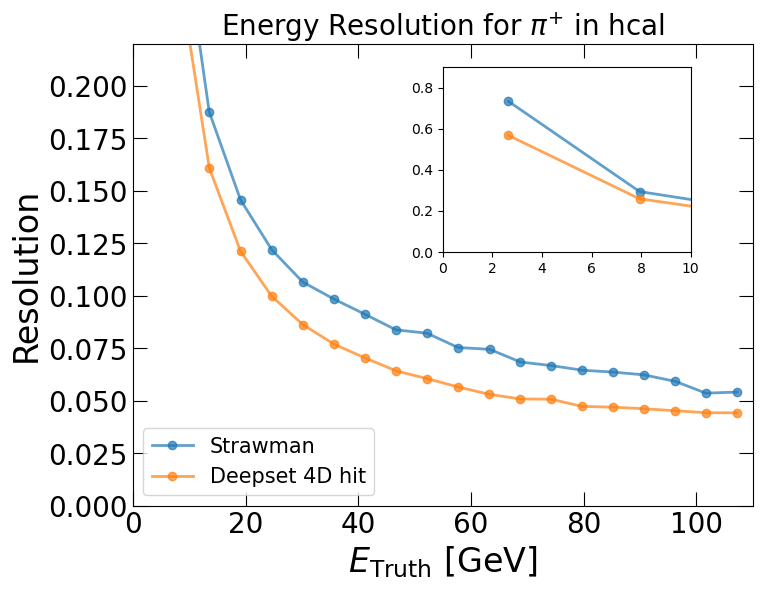

In [127]:
particle='pi+'
title='resolution'
detector='hcal'
xlim_max=[0,110]
ylim_max=[0.0,0.22]
draw_plot_res_scale_withInset(var_X, var_Y_res, labels, title,  xlim_max, ylim_max, particle, detector, 'lower left')

## Test ECAL + HCAL. training
## Pick one trained model and test it

In [7]:
from plotting import *
import compress_pickle as pickle  
take_log10 = False
path_to_result_dir='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/DeepSets_output'
#block='results_ecal_hcal/Block_20230511_1656_concatTrue'
block='results_hcal_ecal_with_label/Block_20230513_1315_concatTrue' 
block_64_4='results_ecal_hcal_all/Block_20230511_2334_concatTrue' ## L4 and Size 64

block_128_8='results_ecal_hcal_all_size128_L8/Block_20230512_0738_concatTrue'

block_2_128_8='results_ecal_hcal_all_size128_L8_block2/Block_20230512_1147_concatTrue'

#block = block_2_128_8
npz_unpacked = np.load(path_to_result_dir + "/" + block + "/test_predictions.npz")

predictions = npz_unpacked['outputs']
targets = npz_unpacked['targets']

### 
#mean_std_data='preprocessed_data_ecal_hcal_all'
mean_std_data='preprocessed_data'
means = pickle.load(open(f"{path_to_result_dir}/{mean_std_data}/test/means.p", 'rb'), compression='gzip')
stdvs = pickle.load(open(f"{path_to_result_dir}/{mean_std_data}/test/stdvs.p", 'rb'), compression='gzip')



means.keys()
#Undo log: Exponentiate
#Averages and STdevs taken AFTER log10 taken. So undo scalar, then exp.
#scalar = (x-mean)/stdev
#undo_scalar = x'*stdev + mean

predictions = predictions*stdvs['genP'] + means['genP']
targets = targets*stdvs['genP'] + means['genP']

predictions = 10**predictions
targets = 10**targets


ClusterSum = predictions
GenP = targets


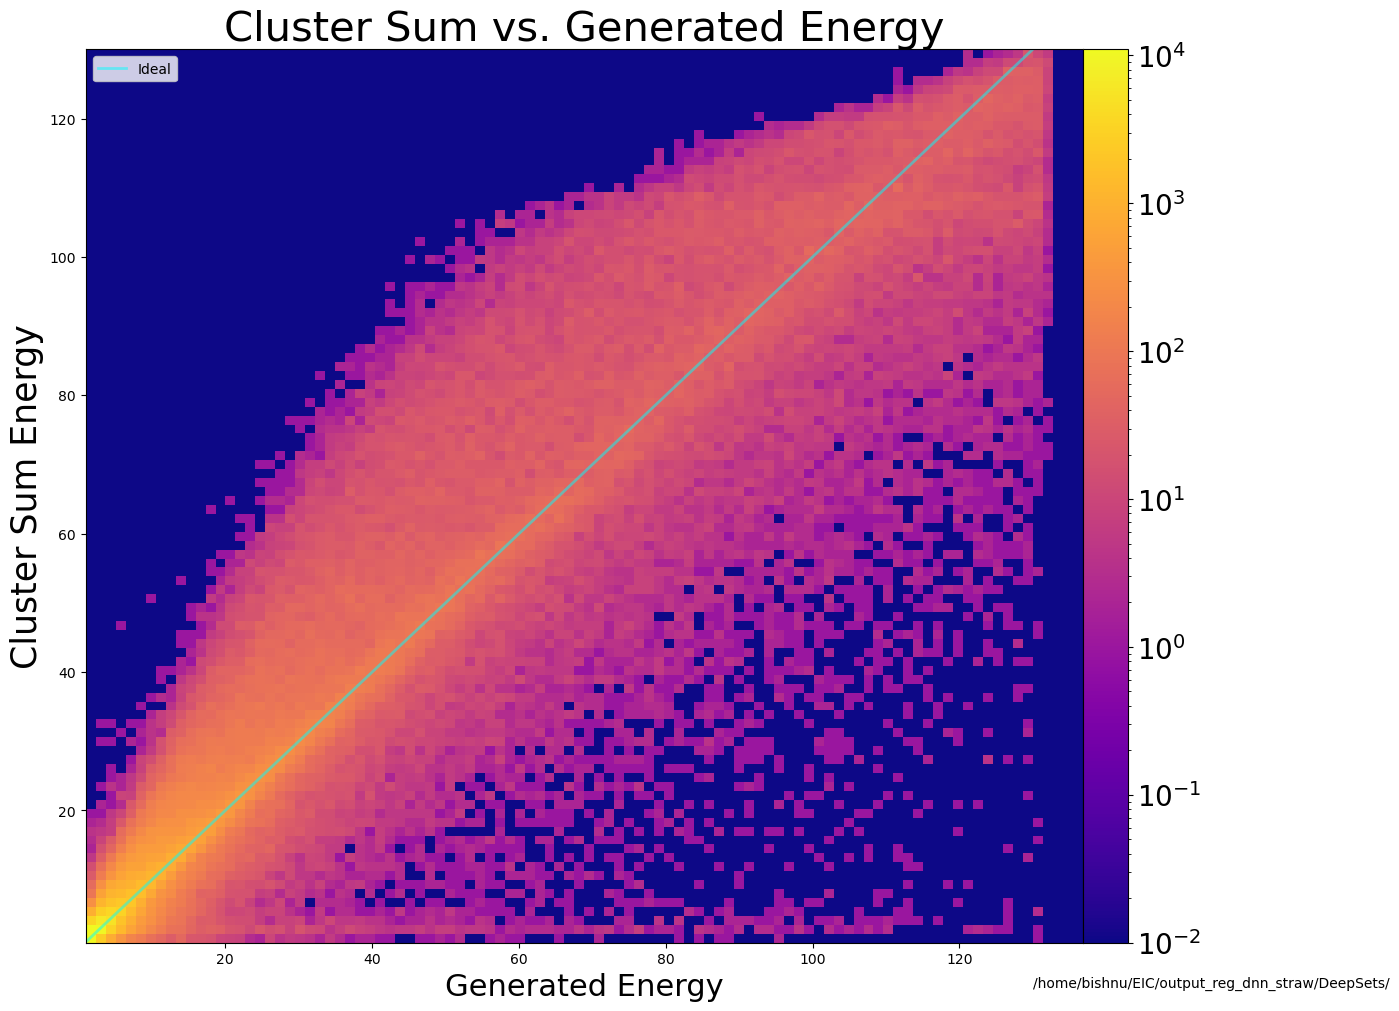

In [2]:
output_path='/home/bishnu/EIC/output_reg_dnn_straw/DeepSets/'
ClusterSum_vs_GenP(ClusterSum, GenP, output_path, take_log10)



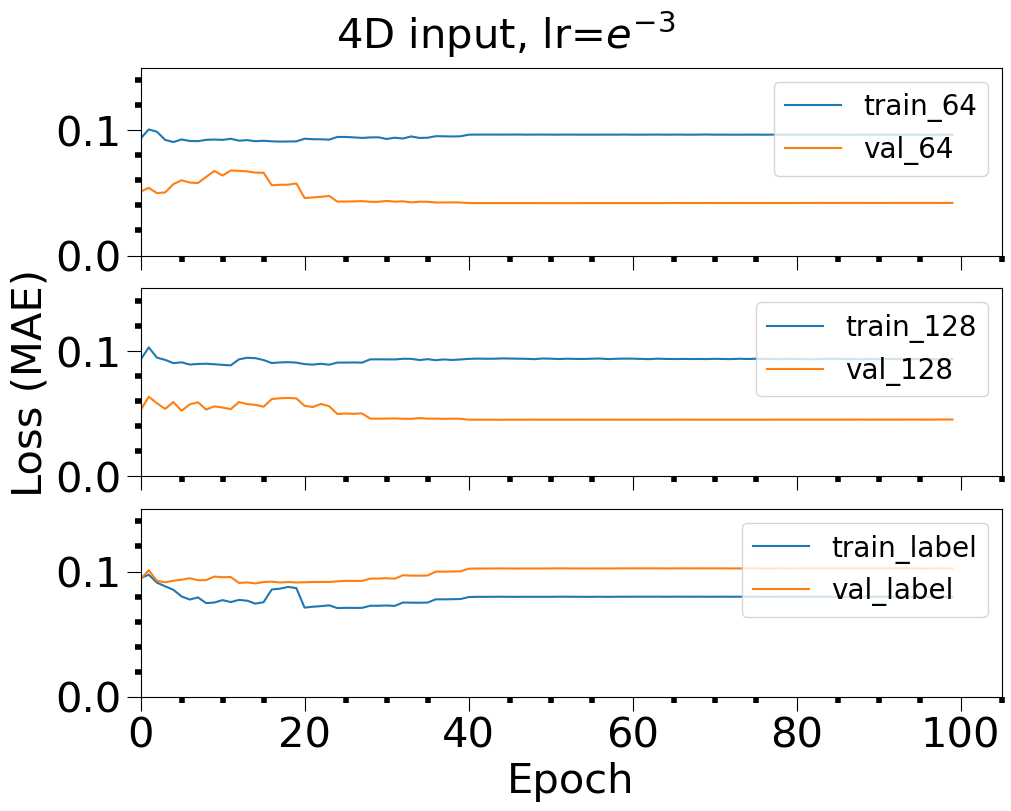

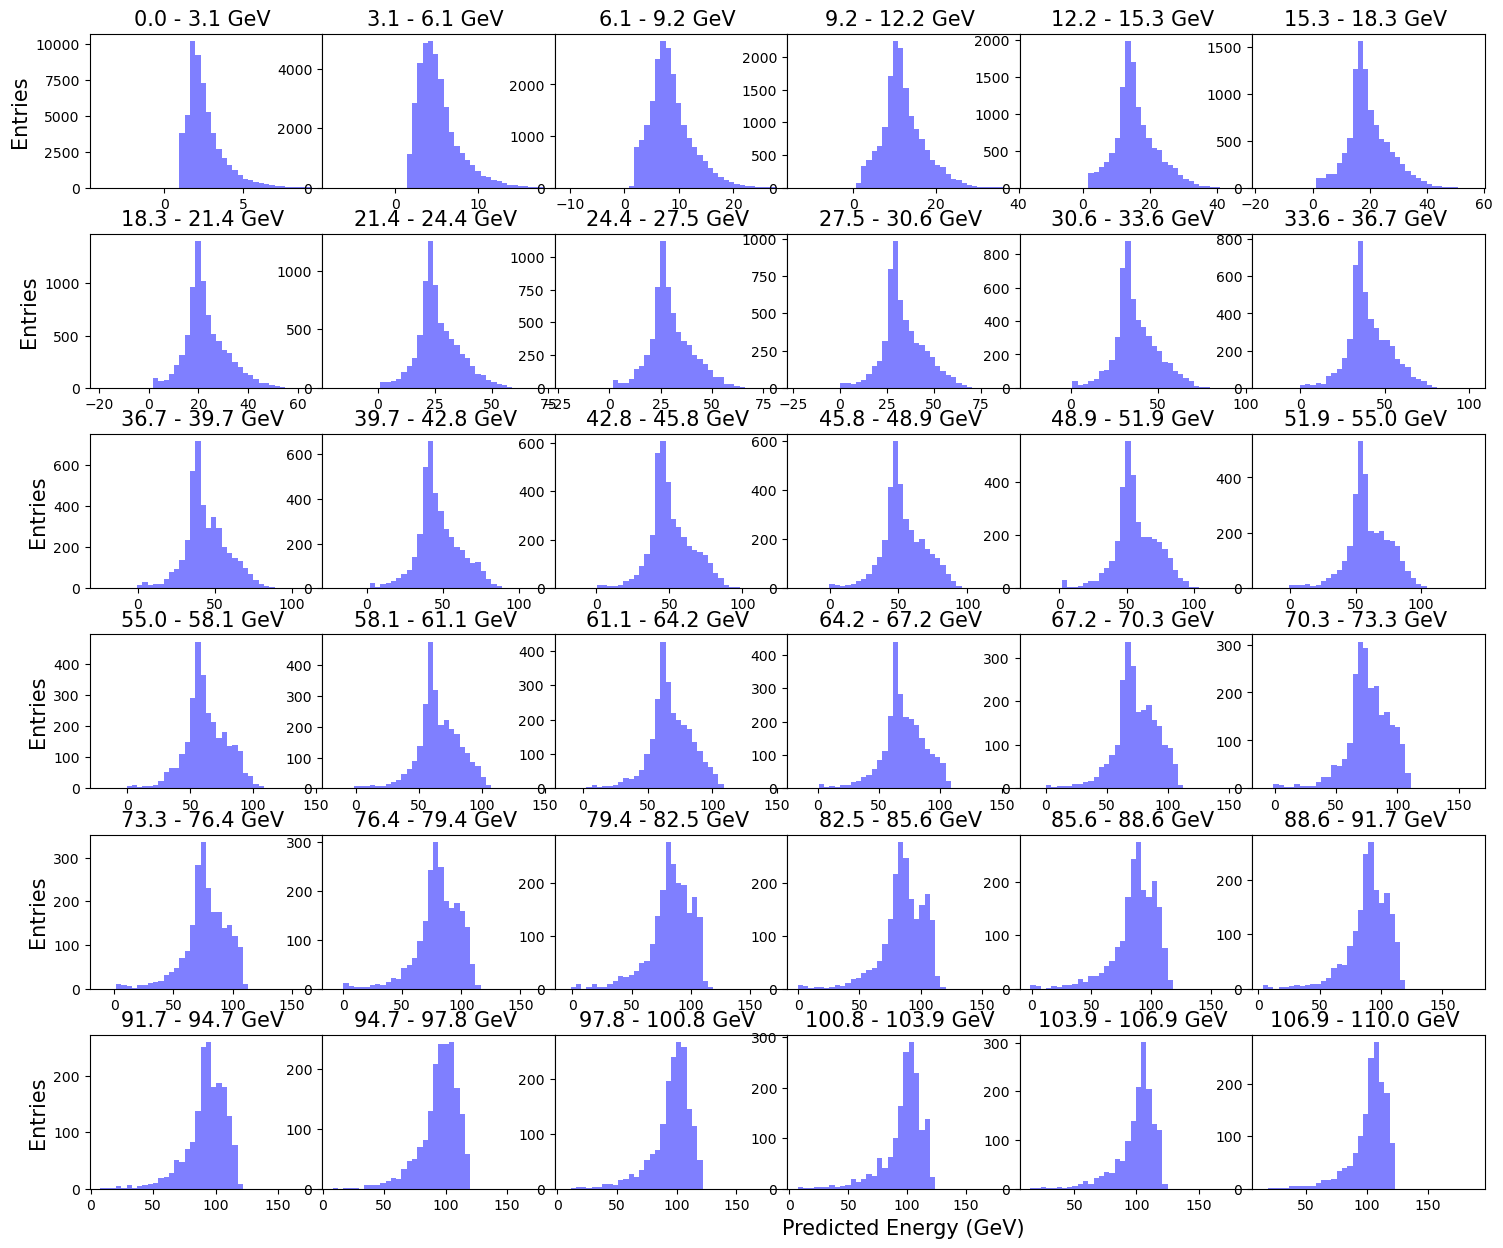

/home/bishnu/miniconda3/envs/use_tensorflow/lib/python3.10/site-packages/awkward0/array/base.py:622: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(where, (cls.numpy.ndarray, AwkwardArray)) and issubclass(where.dtype.type, (numpy.str, numpy.str_)):
/home/bishnu/miniconda3/envs/use_tensorflow/lib/python3.10/site-packages/awkward0/array/base.py:624: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif is

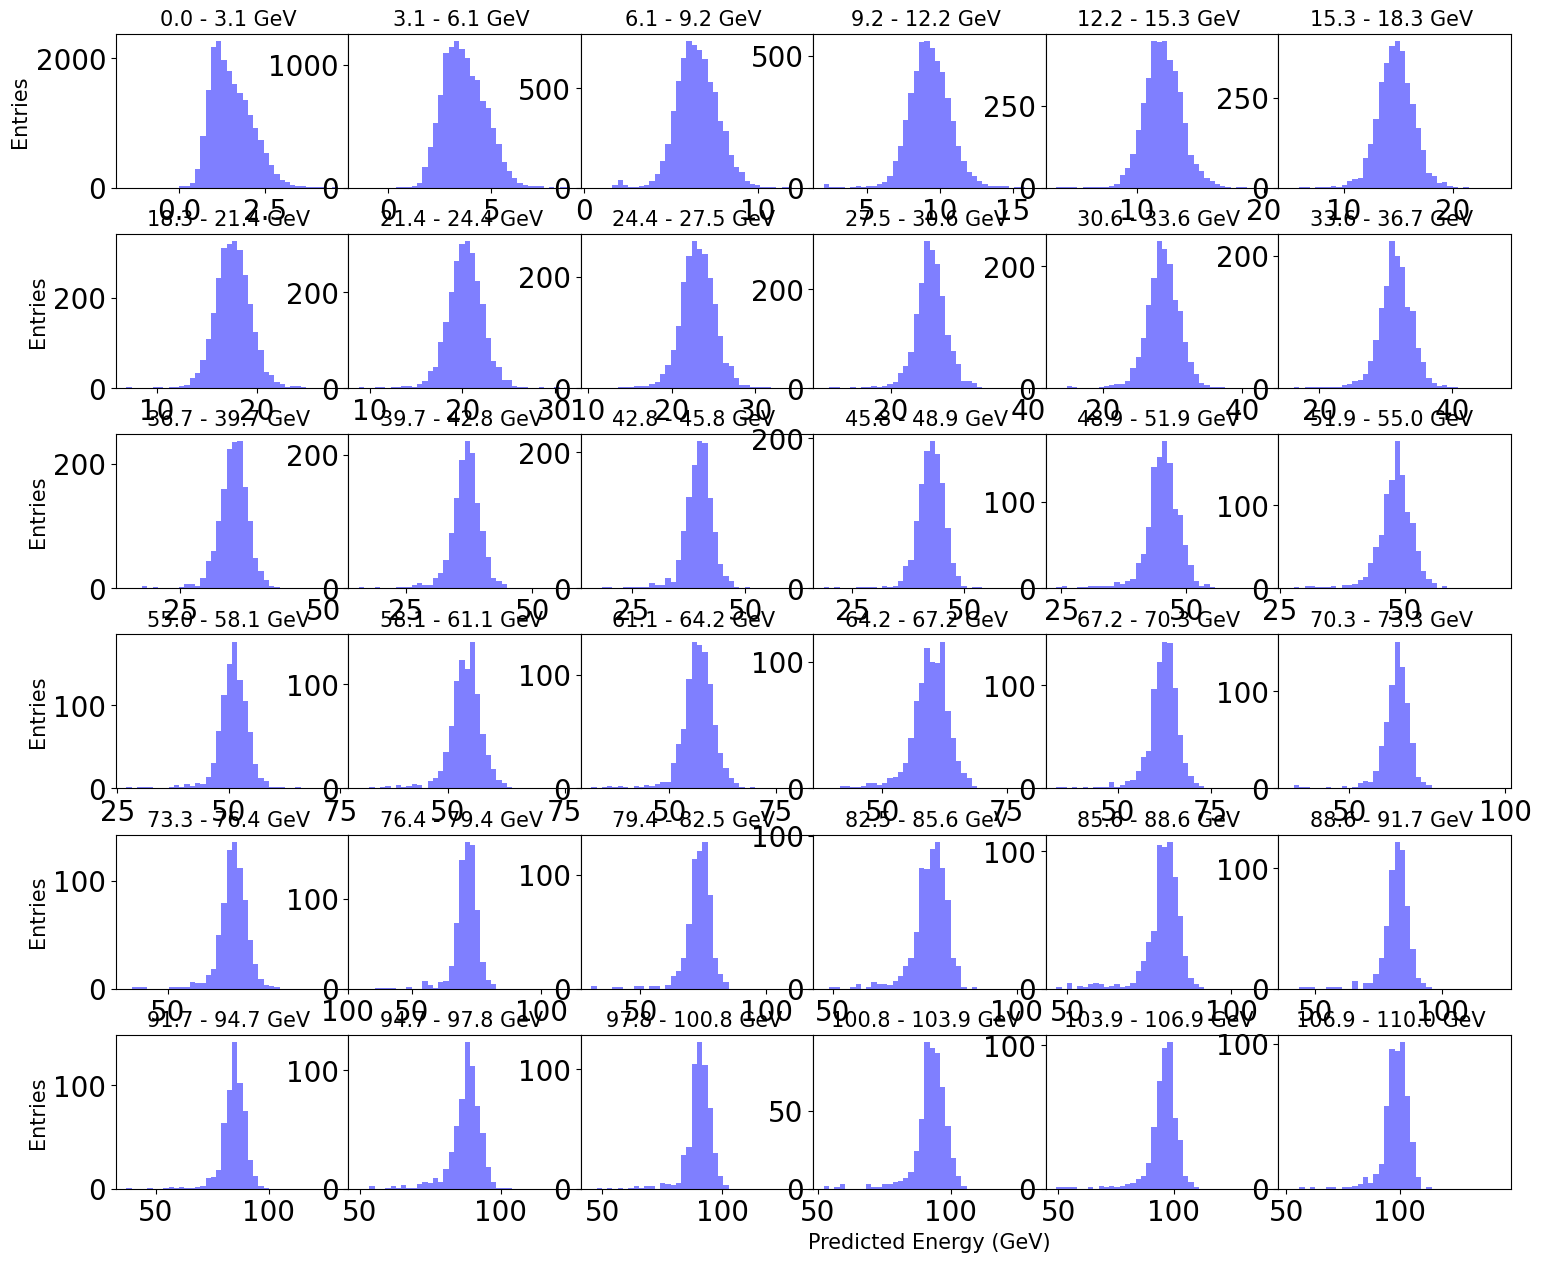

In [13]:
range=[0,5]
nbins=200
plt.hist(total_sum, histtype='step', label='total sum', bins=nbins, range=range)
plt.hist(hcal_sum, histtype='step', label='hcal sum',bins=nbins, range=range)
plt.hist(ecal_sum, histtype='step', label='ecal sum', bins=nbins, range=range)
plt.yscale('log')
plt.legend()


NameError: name 'total_sum' is not defined

<class 'numpy.ndarray'>


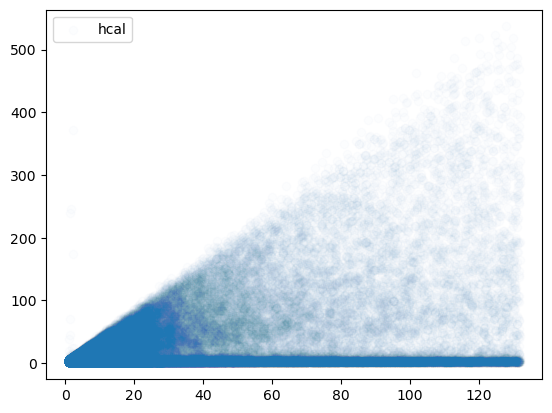

In [36]:
ecal_TH=0.00001
set_to=1
ecal_sum = np.where(ecal_sum< ecal_TH, set_to, ecal_sum)
hcal_sum = np.where(ecal_sum< ecal_TH, set_to, ecal_sum)

frac_hcal=np.divide(gen_energy,hcal_sum)
frac_ecal=np.divide(gen_energy,ecal_sum)

frac_hcal = np.where(np.isnan(frac_hcal), 0, frac_hcal)
frac_hcal = np.where(np.isnan(frac_ecal), 0, frac_ecal)


ratio=np.divide(hcal_sum,ecal_sum)

result = np.where(np.isnan(ratio), 0, ratio) # Replace nan with 0

result=result[result>0]
#plt.scatter(gen_energy, result, alpha=0.1)
print(type(hcal_sum))
plt.scatter(gen_energy, frac_hcal, label='hcal', alpha=0.01)
#plt.plot(gen_energy, frac_ecal, label='ecal')
plt.legend()

In [7]:
particle_detector=f'{particle}_{detector}'
df = pd.DataFrame(slices_fit)
df.to_csv(f'{output_path}Ecal_hcal_pred_strawman_{particle_detector}.csv', index=False)  
#df_straw_truth = pd.DataFrame(slices_truth)
#df.to_csv(f'{output_path}/true_{approach}_{particle_detector}.csv', index=False)

## Pred over Truth
df_straw_truth = pd.DataFrame(slices_pred_truth)
df_straw_truth.to_csv(f'{output_path}Ecal_hcal_pred_true_strawman_{particle_detector}.csv', index=False)


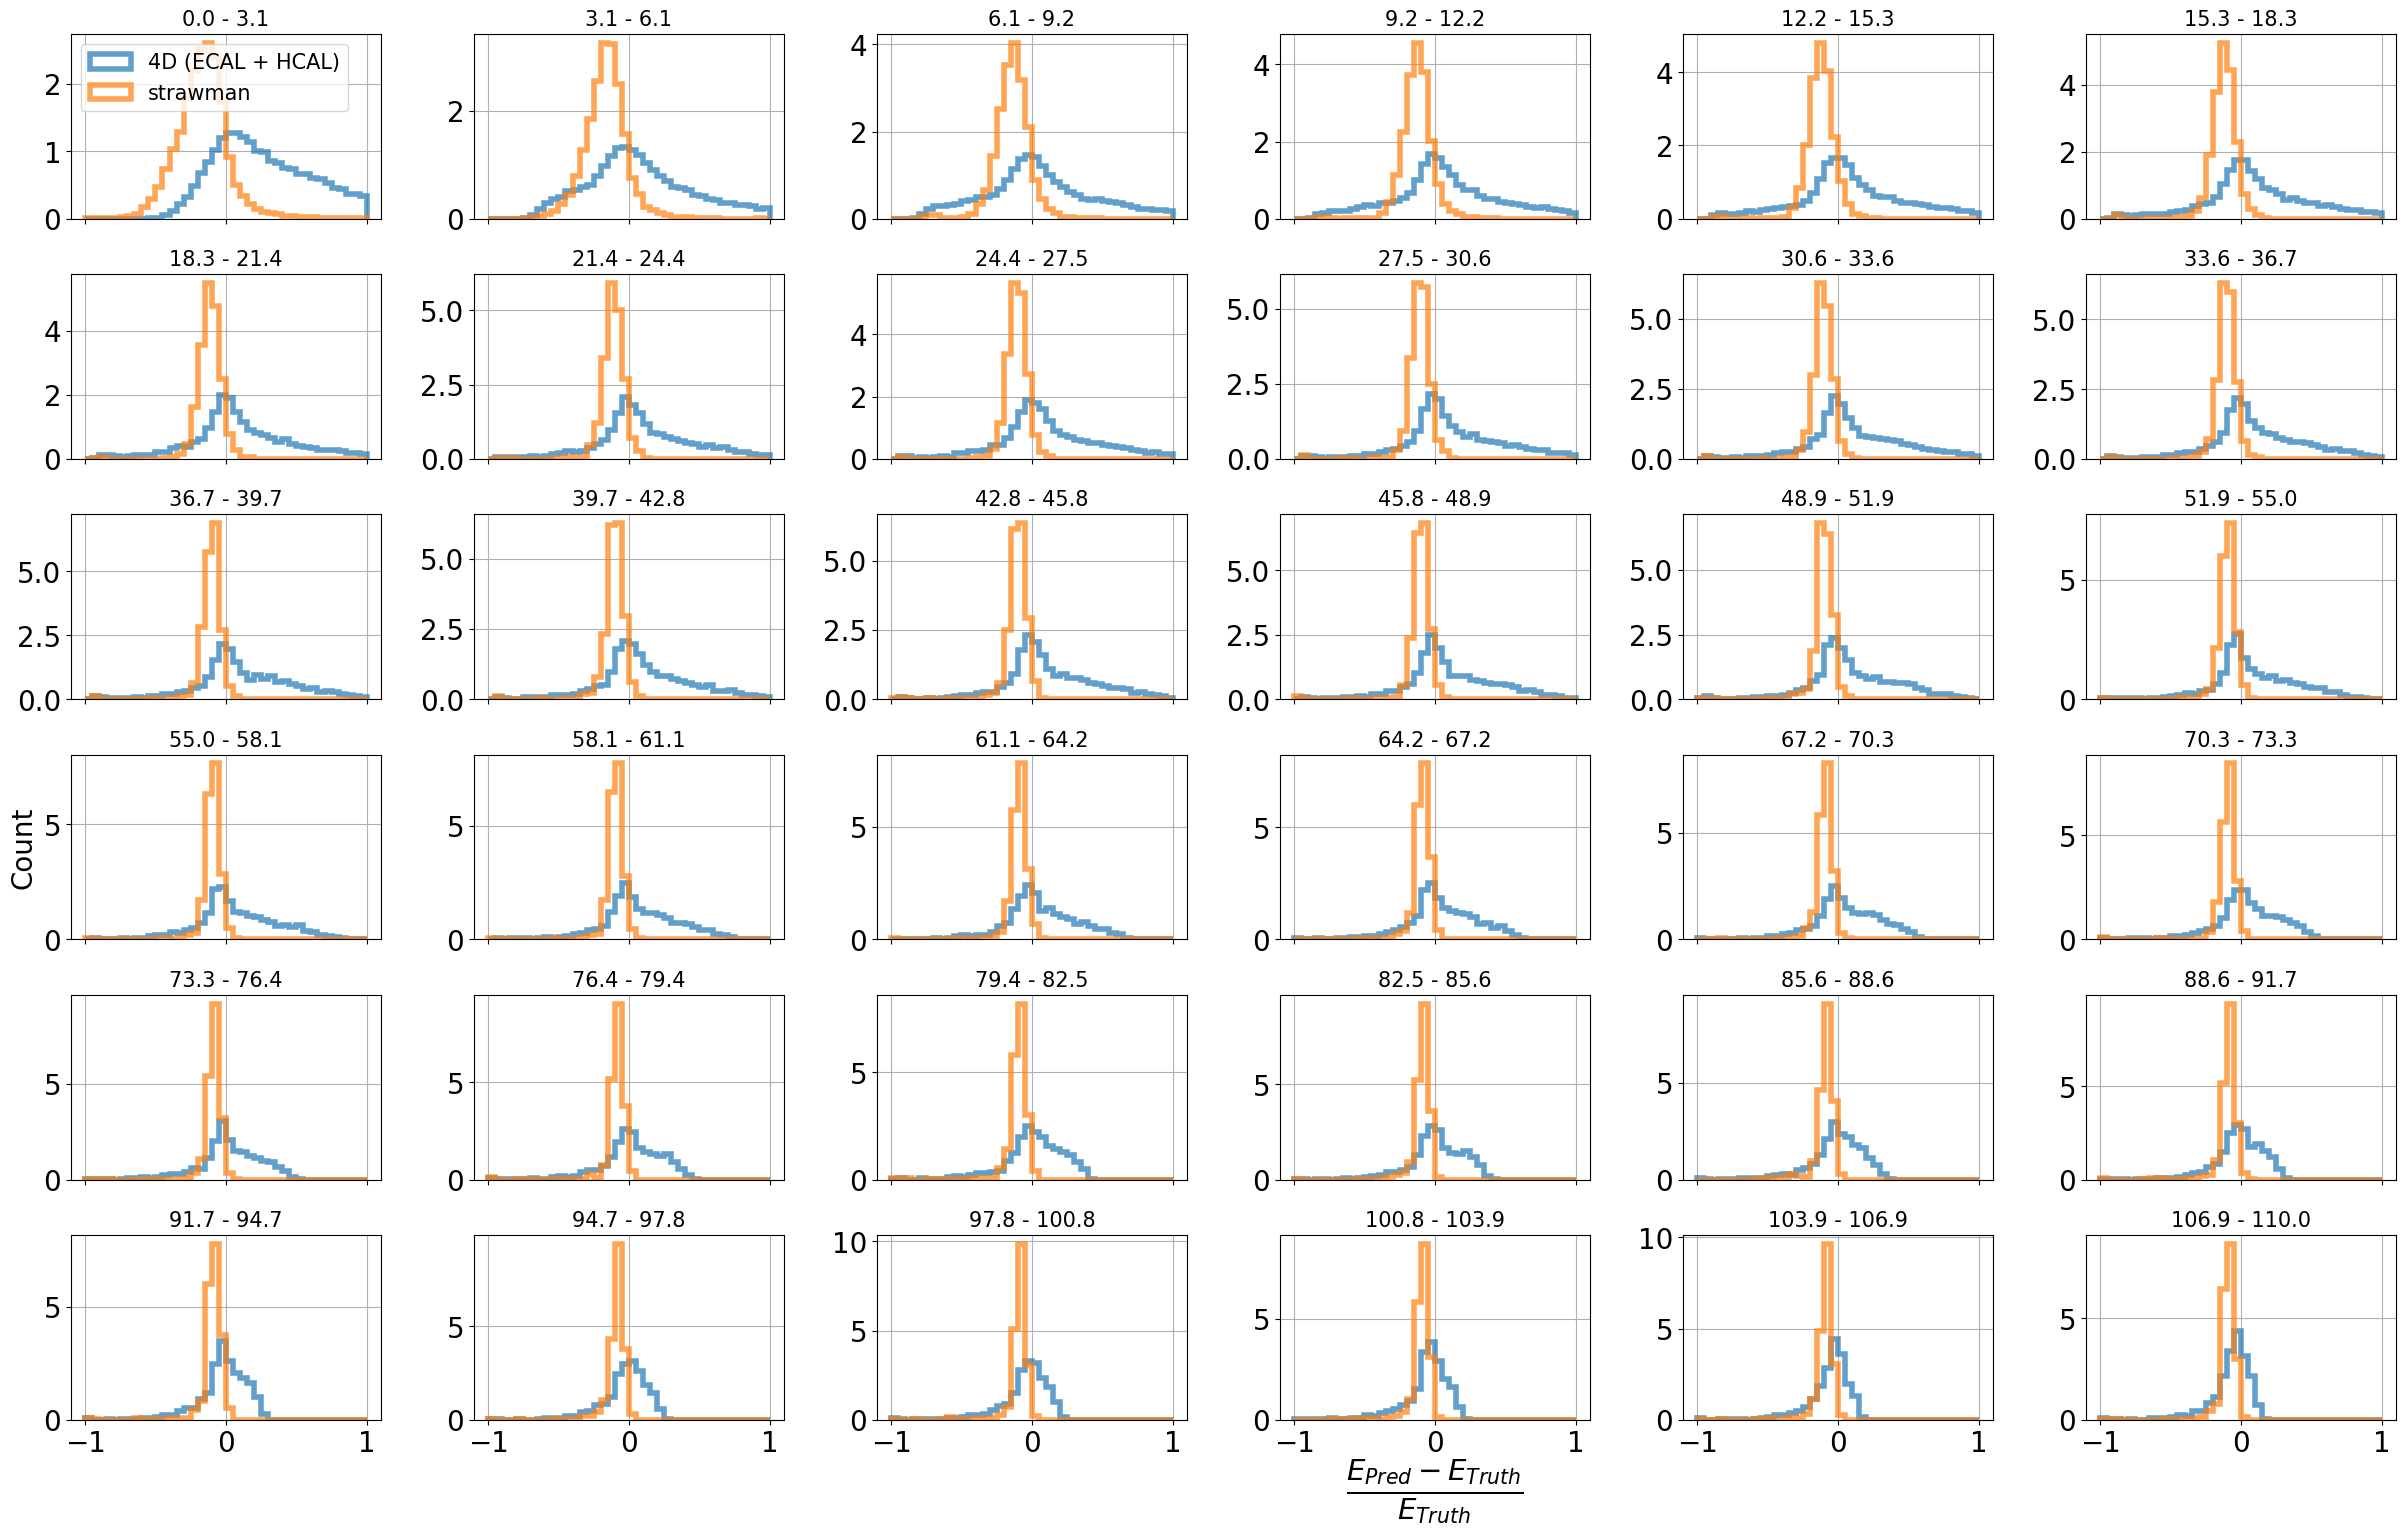

['/home/bishnu/EIC/output_reg_dnn_straw/DeepSets/Ecal_hcal_pred_true_DeepSets_pp_hcal.csv', '/home/bishnu/EIC/output_reg_dnn_straw/DeepSets/Ecal_hcal_pred_true_strawman_pp_hcal.csv']
/home/bishnu/EIC/output_reg_dnn_straw/DeepSets/Ecal_hcal_pred_true_strawman_pp_hcal.csv


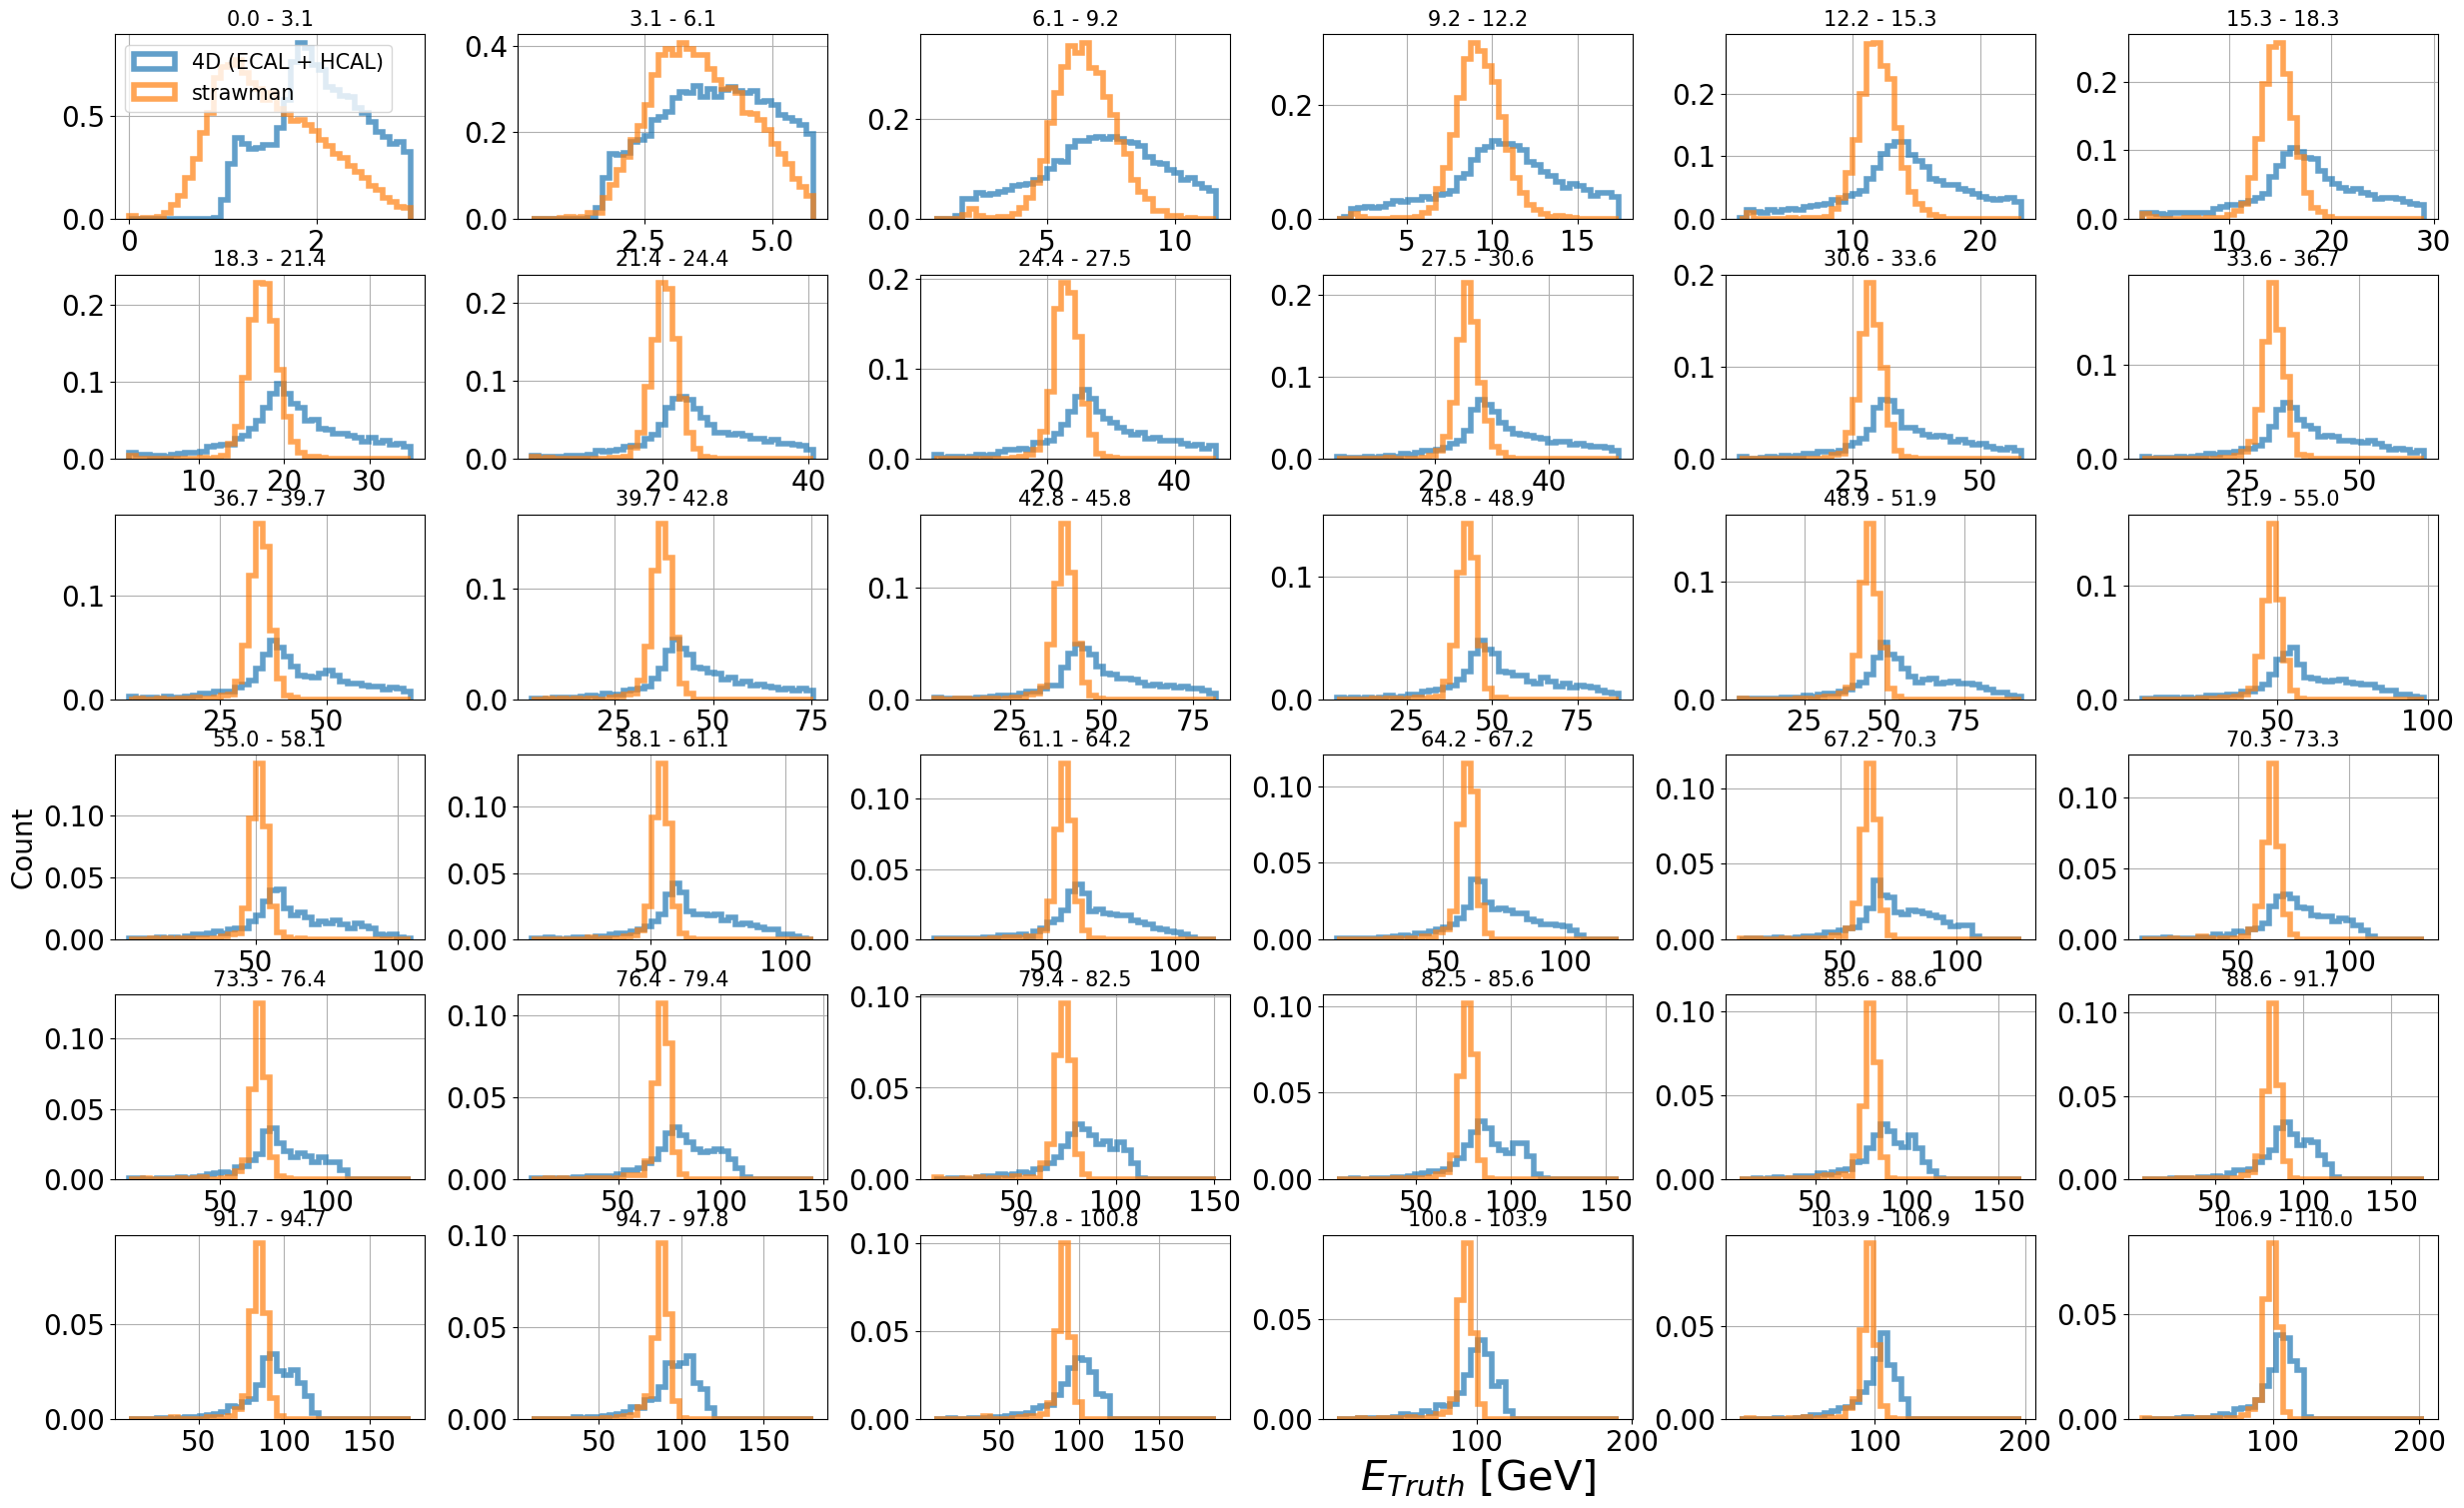

In [ ]:
print(files_pred_true)

## Test if the root files are good especially for ECAL + HCAL. data at 17 deg

In [57]:
from plotting import *
import compress_pickle as pickle  
path='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_100_10k_17deg_ECAL_updated_3/'
#log10_pi+_100_10k_2.83deg_ECAL_1/'
#path='/media/miguel/Elements/Data_hcali/Data1/log10_Uniform_03-23/log10_pi+_Uniform_0-140Gev_17deg_1/'
nbins=40
detector='hcal'
data_type='continuous'
particle='pi+'
min_val=0
max_val=110
Nbins=37
particle='pp'
data_type='continuous'
fit_dist=False
binning=np.linspace(min_val, max_val, Nbins)
#gen_energy,cluster_sum=read_root_files_chain(path, detector, 0, 200)
